In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfTh_finale=pd.read_excel("thrombolyse finale 16_05H.xlsx")
dfTh_mo=pd.read_excel("thrombolyse modifiée 10_06_21.xlsx")

In [3]:
dfTh_finale

ndossier  Age  sexe  latéralité  Tabac  alcool  Neffa  sedentarité  HTA  \
0    626/2018   48     1           1      1       0      0            0    0   
1    123/2019   66     1           1      0       0      0            0    0   
2    161/2019   37     1           1      1       0      0            0    0   
3    288/2019   53     2           1      0       0      0            0    1   
4    281/2019   68     2           1      0       0      0            0    0   
..        ...  ...   ...         ...    ...     ...    ...          ...  ...   
190       196   65     1           1      0       0      0            1    1   
191       197   92     2           1      0       0      0            1    0   
192       198   63     1           1      1       0      0            1    1   
193       199   52     2           1      0       0      0            1    1   
194       200   49     2           1      0       0      0            1    0   

     Diabète  ...  décompensationdediabète  hypernatrémie  tbhémostase  \
0          0  ...                        0              0            0   
1          0  ...                        0              0            0   
2          0  ...                        0              0            0   
3          1  ...                        1              0            0   
4          0  ...                        0              0            0   
..       ...  ...                      ...            ...          ...   
190        0  ...                        0              0            0   
191        0  ...                        0              0            0   
192        1  ...                        0              0            0   
193        0  ...                        0              0            0   
194        0  ...                        0              0            0   

     escarre  phlébite  EP  Mortalité  mannitol  RANKINmodifiéà3mois  \
0          0         0   0          0         1                    5   
1          0         0   0          0         0                    3   
2          0         0   0          0         0                    1   
3          0         0   0          0         0                    2   
4          0         0   0          0         0                    3   
..       ...       ...  ..        ...       ...                  ...   
190        0         0   0          0         0                    0   
191        0         0   0          0         0                    0   
192        0         0   0          0         0                    5   
193        1         0   0          0         0                    5   
194        0         0   0          0         0                    5   

     thrombolyse  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
190            0  
191            0  
192            0  
193            1  
194            0  

[195 rows x 62 columns]

In [4]:
dfTh_mo

ndossier  Age  age>=18  sexe  latéralité  Tabac  alcool  Neffa  \
0    626/2018   48        1     1           1      1       0      0   
1    123/2019   66        1     1           1      0       0      0   
2    161/2019   37        1     1           1      1       0      0   
3    288/2019   53        1     2           1      0       0      0   
4    281/2019   68        1     2           1      0       0      0   
..        ...  ...      ...   ...         ...    ...     ...    ...   
190       196   65        1     1           1      0       0      0   
191       197   92        1     2           1      0       0      0   
192       198   63        1     1           1      1       0      0   
193       199   52        1     2           1      0       0      0   
194       200   49        1     2           1      0       0      0   

     sedentarité  HTA  ...  décompensationdediabète  hypernatrémie  \
0              0    0  ...                        0              0   
1              0    0  ...                        0              0   
2              0    0  ...                        0              0   
3              0    1  ...                        1              0   
4              0    0  ...                        0              0   
..           ...  ...  ...                      ...            ...   
190            1    1  ...                        0              0   
191            1    0  ...                        0              0   
192            1    1  ...                        0              0   
193            1    1  ...                        0              0   
194            1    0  ...                        0              0   

     tbhémostase  escarre  phlébite  EP  Mortalité  mannitol  \
0              0        0         0   0          0         1   
1              0        0         0   0          0         0   
2              0        0         0   0          0         0   
3              0        0         0   0          0         0   
4              0        0         0   0          0         0   
..           ...      ...       ...  ..        ...       ...   
190            0        0         0   0          0         0   
191            0        0         0   0          0         0   
192            0        0         0   0          0         0   
193            0        1         0   0          0         0   
194            0        0         0   0          0         0   

     RANKINmodifiéà3mois  thrombolyse  
0                      5            2  
1                      3            1  
2                      1            2  
3                      2            1  
4                      3            1  
..                   ...          ...  
190                    0            0  
191                    0            0  
192                    5            0  
193                    5            1  
194                    5            0  

[195 rows x 82 columns]

In [5]:
dfTh_finale.isna().sum().sum()

0

In [6]:
dfTh_mo.isna().sum().sum()

0

In [7]:
dfTh_mo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 82 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ndossier                                                                            195 non-null    object 
 1   Age                                                                                 195 non-null    int64  
 2   age>=18                                                                             195 non-null    int64  
 3   sexe                                                                                195 non-null    int64  
 4   latéralité                                                                          195 non-null    int64  
 5   Tabac                                                                               195 non-null   

In [8]:
dfTh_finale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ndossier                                195 non-null    object 
 1   Age                                     195 non-null    int64  
 2   sexe                                    195 non-null    int64  
 3   latéralité                              195 non-null    int64  
 4   Tabac                                   195 non-null    int64  
 5   alcool                                  195 non-null    int64  
 6   Neffa                                   195 non-null    int64  
 7   sedentarité                             195 non-null    int64  
 8   HTA                                     195 non-null    int64  
 9   Diabète                                 195 non-null    int64  
 10  Dyslipidémie                            195 non-null    int64 

### Le dataset no contient pas de valeurs manquantes
### Pour le dataset modifié on remarque qu'il y a 20 variables de plus par rapport au dataset initial, et par un simple coup d'oeil je suppose que la plupart de ces nouvelles variables représentent des seuils des autres variables numériques
### Passant maintenant a l'analyse exploratoire

# Exploratory Data Analysis

GAD :
[2.     1.2    1.3    3.2    1.5    3.15   2.8    1.1    1.46   1.26
 0.97   3.8    1.44   1.01   1.19   1.     1.24   1.17   1.23   2.5
 1.27   1.4    1.06   0.93   1.026  1.35   1.494  3.546  1.008  2.682
 2.376  1.116  1.278  0.828  2.25   1.062  2.196  0.918  3.402  0.972
 1.566  0.684  1.872  0.846  1.62   0.99   0.702  2.88   4.482  0.81
 0.738  0.954  0.666  1.548  0.576  1.296  2.934  2.286  2.16   2.016
 3.834  1.476  1.512  1.368  0.882  1.404  1.08   1.53   1.3644 2.268
 2.178  1.044  2.232  0.756  1.71   1.98   1.152  1.764  1.332  0.864
 1.89   4.05   2.07   1.188  1.746  3.276  4.662  2.34   1.224  1.908
 1.692  1.242  1.944  2.502  0.936  1.674  0.774  2.97   2.862  0.792
 1.386  1.098  4.5   ]


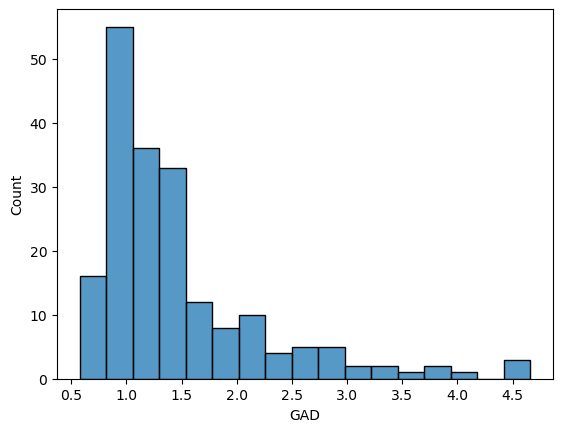

****************************************
INR :
[1.   1.18 1.06 1.26 1.23 1.01 1.14 1.5  1.38 1.16 1.3  1.35 1.08 1.31
 1.2  1.63 1.29 1.04 1.68 1.24 1.4  1.19 2.17 1.72]


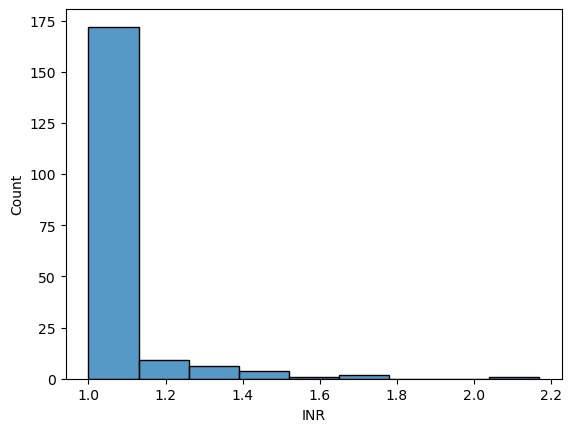

****************************************


In [9]:
for col in dfTh_finale.select_dtypes('float64').columns:
    print(col+" :")
    print(dfTh_finale[col].unique())
    sns.histplot(dfTh_finale[col])
    plt.show()
    print("*"*40)

##### vu que je ne suis pas un expert du domaine, il m'a fallu une petite recherche sur google pour savoir ces 2 variables de type float a quoi  correspondent exactement
##### INR : l'efficacité du traitement ,Plus la valeur est haute, plus le sang est «fluide»
##### GAD : une enzyme présente dans les neurones et les îlots de Langerhans

Age :
[48 66 37 53 68 60 50 34 55 88 44 56 61 51 84 63 64 86 78 85 70 77 65 62
 91 67 73 43 83 57 69 80 71 82 75 81 24 59 45 32 92 87 29 40 72 76 41 47
 35 74 46 94 49 96 52 90 54]


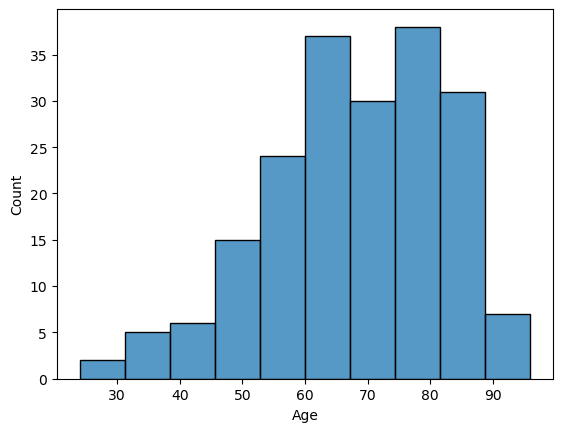

****************************************
sexe :
[1 2]


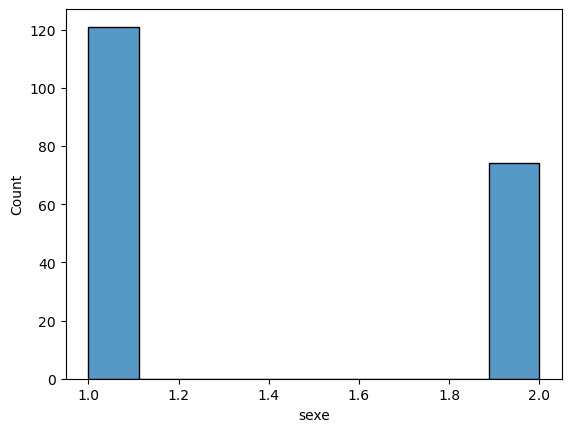

****************************************
latéralité :
[1 2]


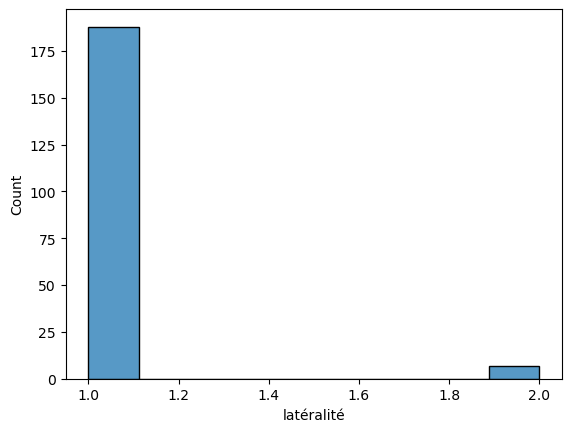

****************************************
Tabac :
[1 0]


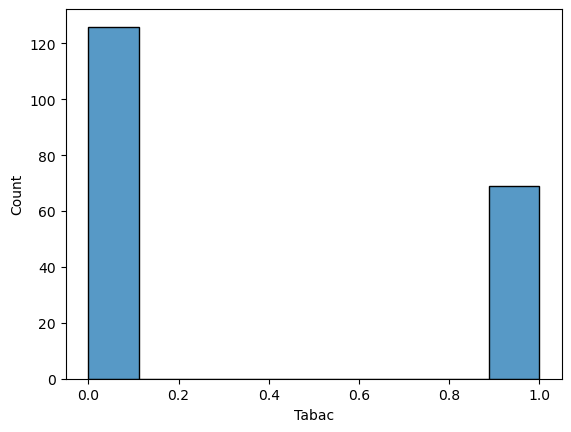

****************************************
alcool :
[0 1]


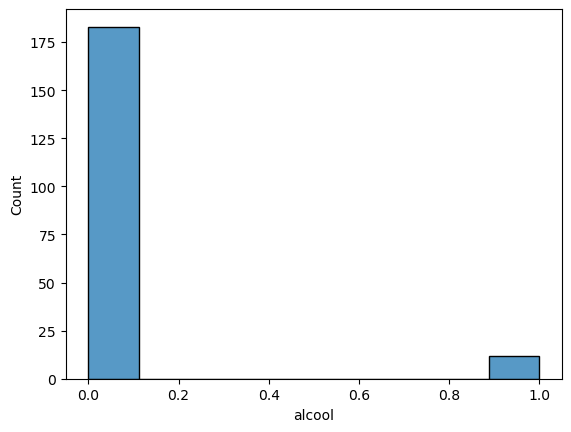

****************************************
Neffa :
[0 1]


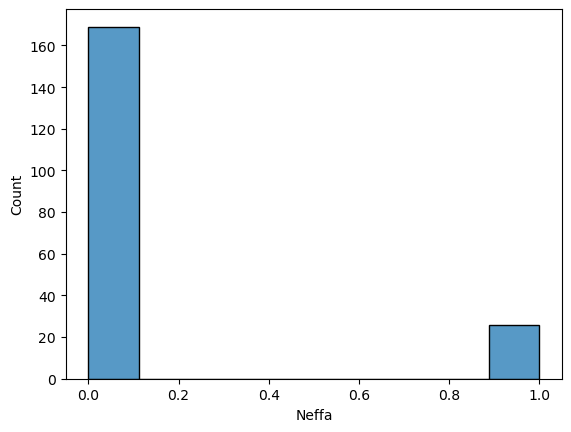

****************************************
sedentarité :
[0 1]


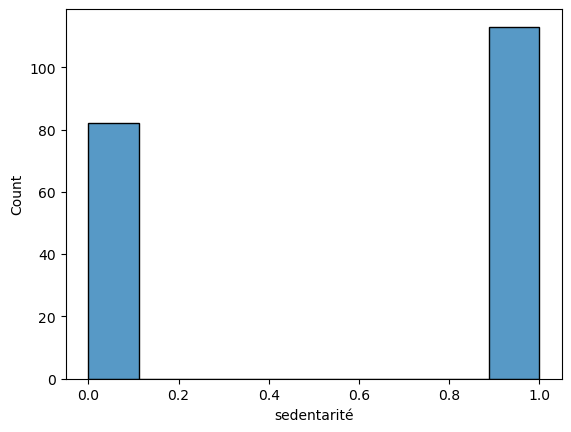

****************************************
HTA :
[0 1]


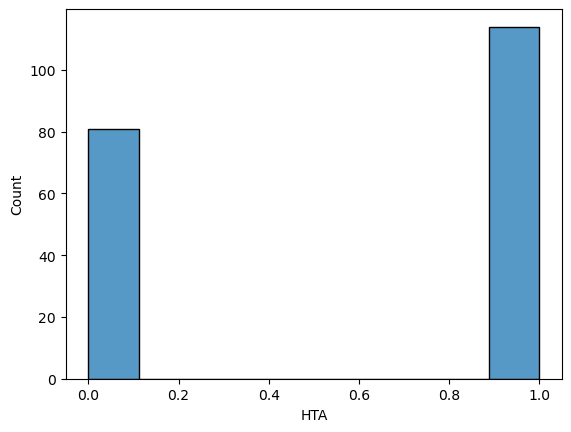

****************************************
Diabète :
[0 1]


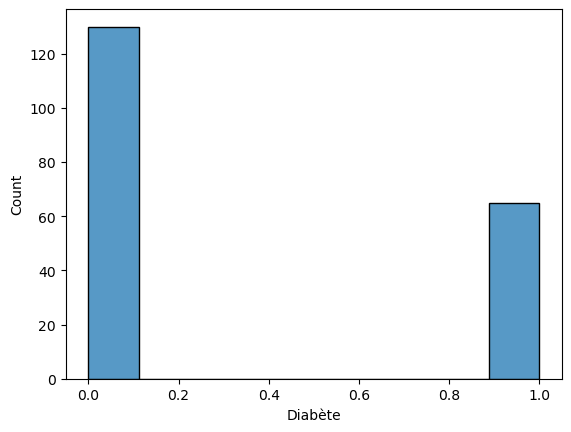

****************************************
Dyslipidémie :
[1 0]


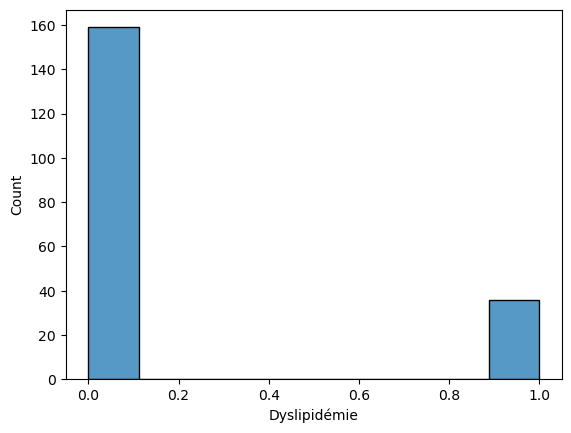

****************************************
ACFA :
[0 1]


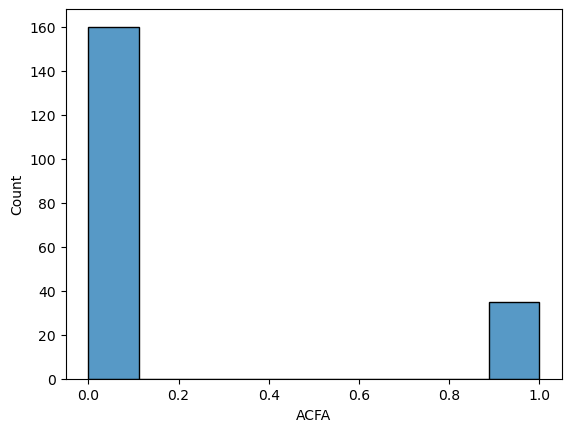

****************************************
insuffisancecoronaire :
[0 1]


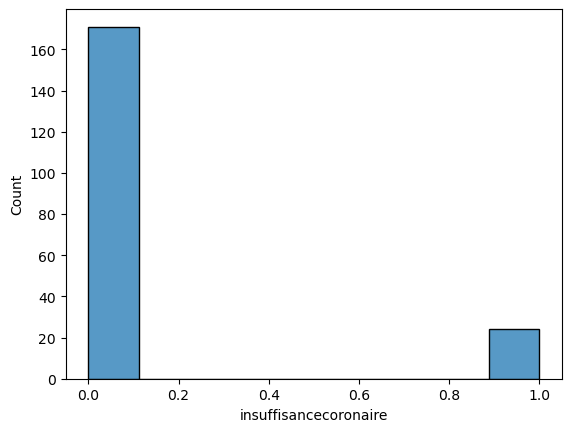

****************************************
valvulopathie :
[0 1]


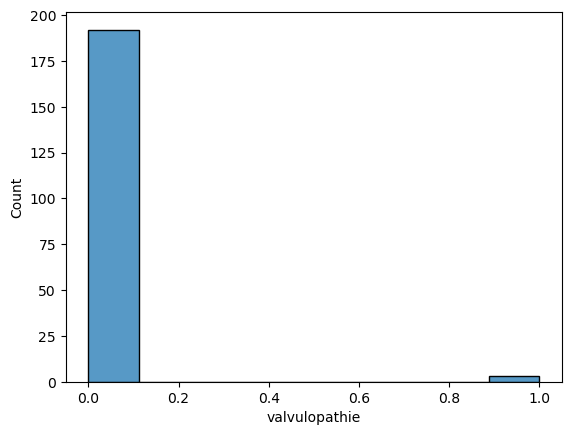

****************************************
AVC :
[0 1]


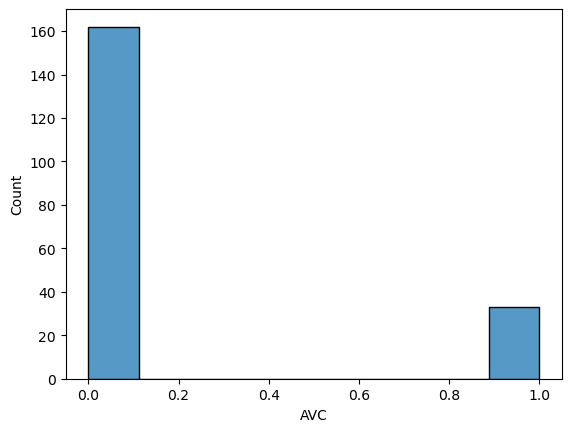

****************************************
AIT :
[0 1]


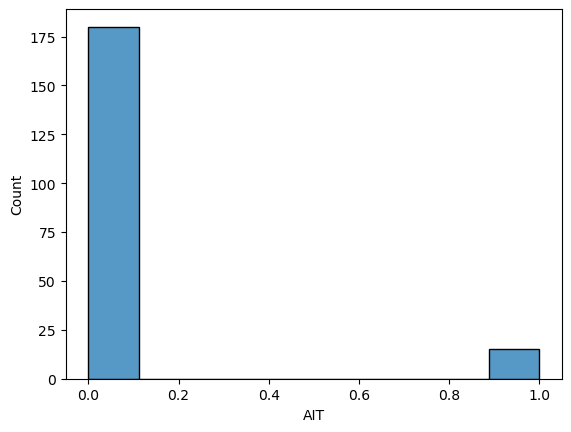

****************************************
AOMI :
[0 1]


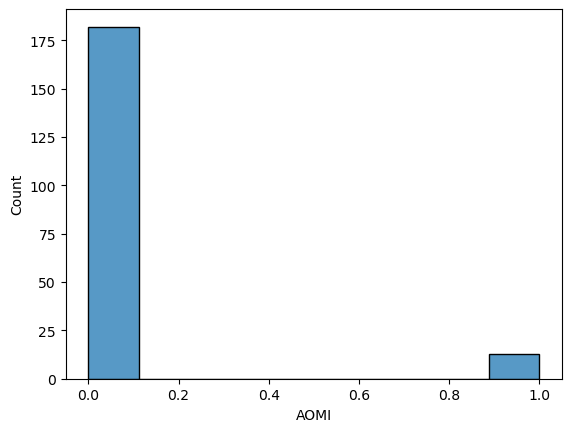

****************************************
démence :
[0 1]


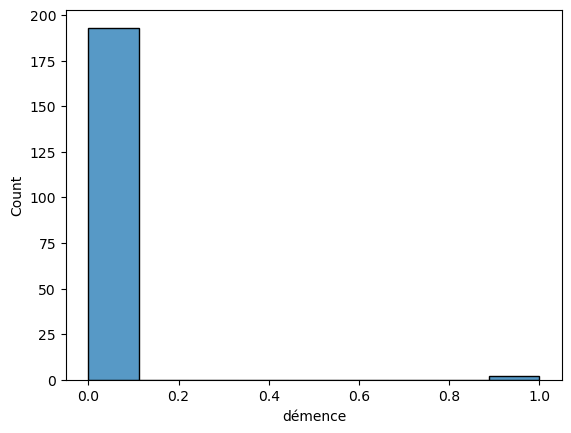

****************************************
Délai_début_symtomatologie_arrivée_URG :
[  60  120  150   30   90   45  200  180  160    0  135  140  165   15
   65   40  240  720  540 1080  750  360 1320  270  300 3000   75 4200
  210 1860  330 2520 4080 2040 1560 4170 4140  690  480 3180 3600  780
 4260 1440  600 1530 1650 1680  960 1260 1020 2640 1770 2490 2910  810
  840  870 1380 1410 1740]


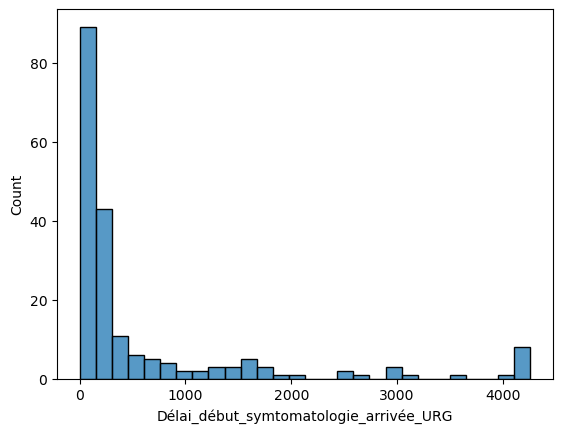

****************************************
délai_début_avis_neuro :
[ 120   60   80   90  165   45  100   40  160  205  105  185  180   10
  150   75   85   30  195   65  170  125  155    0  130  140   15  115
  200  420  990  570  240 1260  330 1050  480 1620  510  360 3060 1200
 4320  300  600 3360 2040  630  540 2640 4260 2220 4080 4200 1860  270
  900  660   55 3300  870  450  810  390 3720 1680  615 2010 1800 1320
 1380  210 1440 1140 2700  750 1920 2790 1020 3270 1110 1830 1650  720]


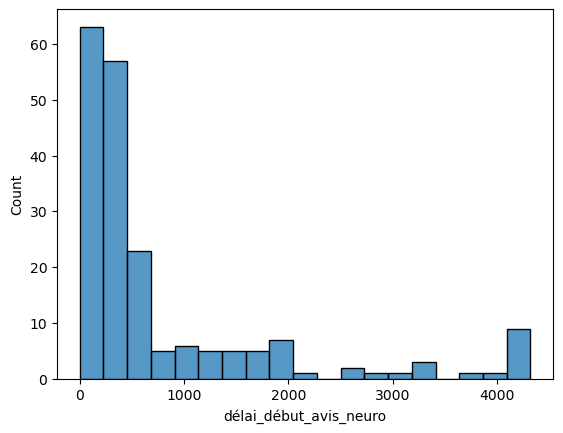

****************************************
délai_début_imagerie :
[   90    60   120   150   210   145    55   240   180   195    30    35
   105   175   140   160    45   220   630  1320   360  1380  1530  1290
   600  1260   300   450   570   480  4680 10200   390   465  1680   960
   720  3450  2220   810   330   540  2400  4500   615  2310   510  1755
  4740  4524  1965   525   990   915   930  3390   900   870  1005   660
   735  4320  1140  5010   225   690   855  1440  2100   420  2130  1110
  1920   555   270  1620  2280  2910  2460   840   495  2925   405  3510
  1395  1950  1980  2250  2040  4560  1080]


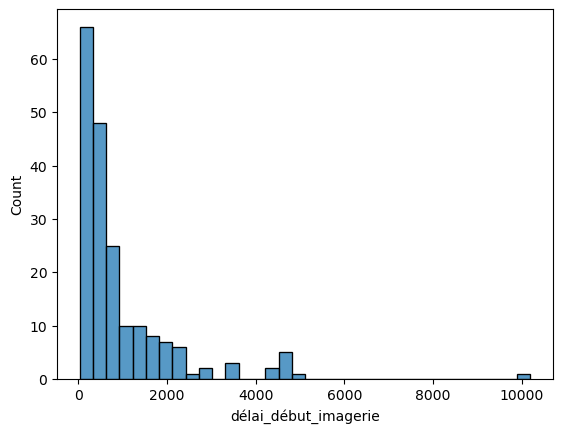

****************************************
scoredeglasgow :
[15 10 14  8 13 11  6  7  5]


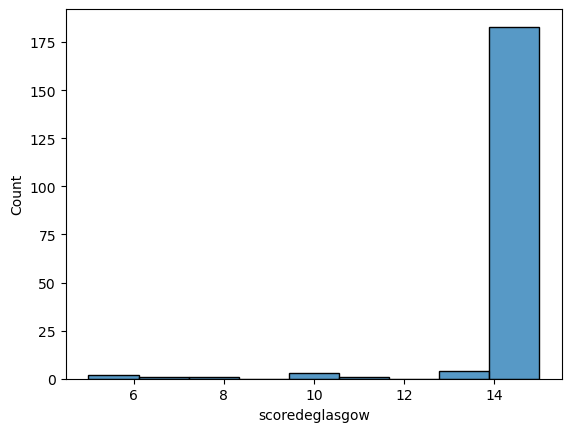

****************************************
NIHSS initial :
[20  6  3 14 10 15 12  7 11 18 16 13 21  1  9 17  5  2 19  4 26  0 25 24
 22 30  8 23]


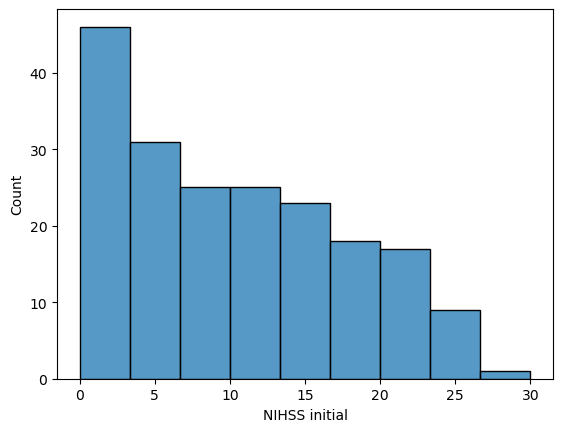

****************************************
TAS :
[180 120 150 145 130 140 160 170 100 190 250 110 200 125 165 115 155 175
 158 135 139 105]


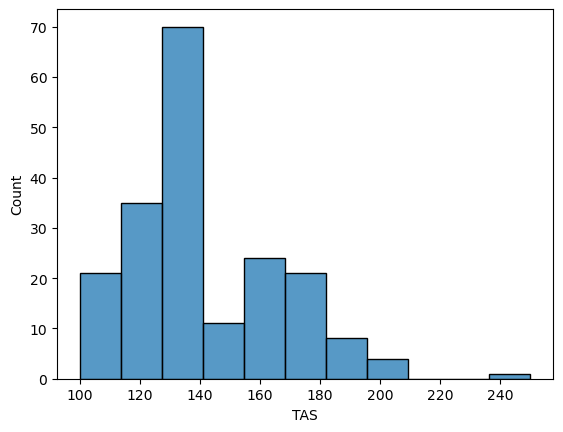

****************************************
TAD :
[ 70 100  80  90  60 130  75 115  95  87  85 110  50  76  64 120  65  67
  55]


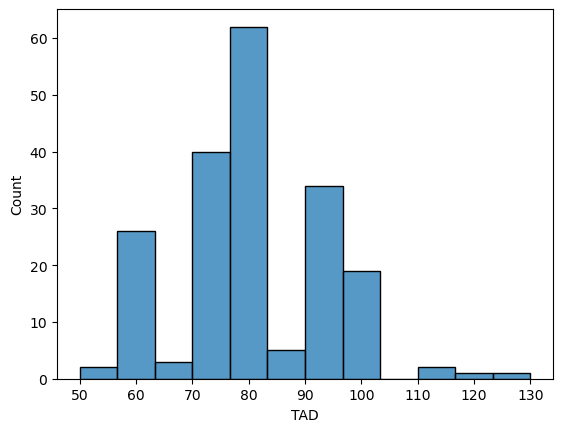

****************************************
tdmnormale :
[0 1]


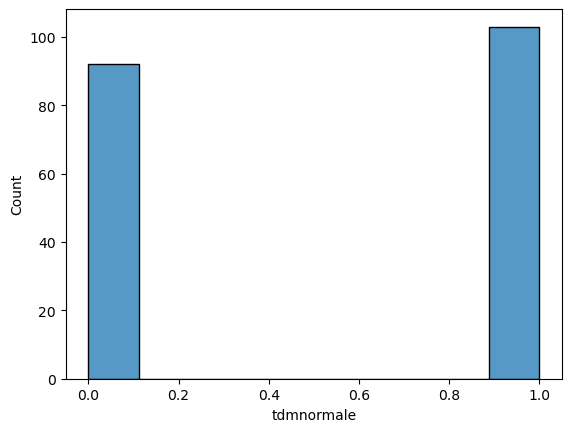

****************************************
signesprécocestdm :
[1 0]


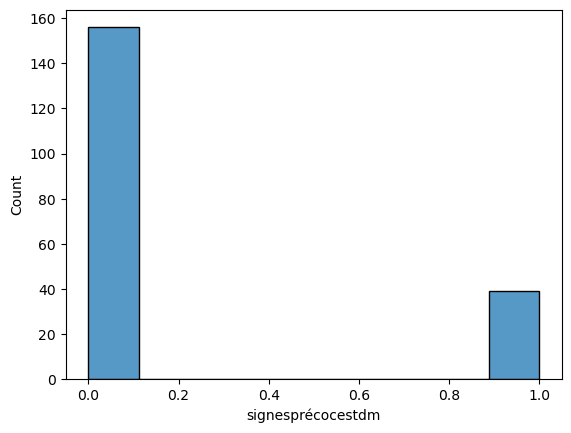

****************************************
hypodensité franche :
[0 1]


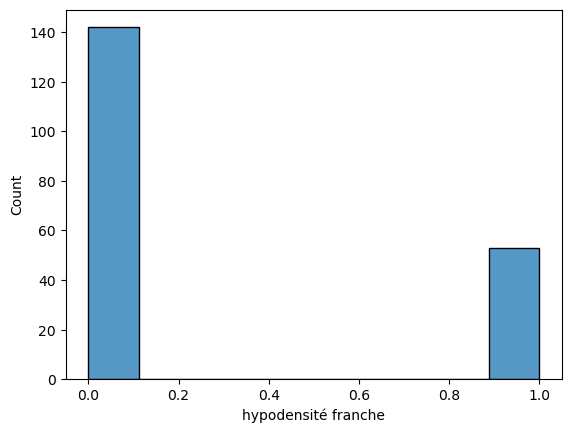

****************************************
Plaquettes :
[197000 176000 180000 200000 148000 117000 212000 225000 220000 205000
 194000 177000 231000 293000 248000 166000 284000 232000 216000 263000
 159000 236000 174000 224000 186000 309000 394000 195000 353000 110000
 235000 258000 151000 308000 328000 190000 240000 337000 162000 252000
 246000 230000 222000 463000 193000 301000 348000 297000 274000 158000
 185000 189000 210000 202000 279000 226000 215000 413000 228000 335000
 341000 419000 257000 262000 376000 156000 171000 204000 155000 350000
 275000 211000 733000 196000 302000 198000 233000 139000 136000 256000
 276000 157000 395000 140000 239000 161000 182000 270000 123000 250000
  11000 203000 188000 179000 172000 366000 389000 374000 170000 133000
 245000 146000 319000 326000 100000 229000 183000 167000 379000 111000
 360000 192000  20800]


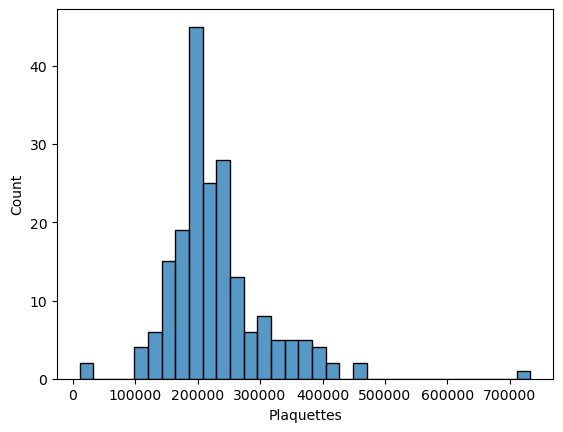

****************************************
TP :
[100  80  98  77  79  82  64  61  81  70  67  68  73  93  90  83  69  86
  75  18  63  60  72  66  76  92  87  58  57  74  88  85  65  97  96  54
  89  78  62  94  71  84  40  45]


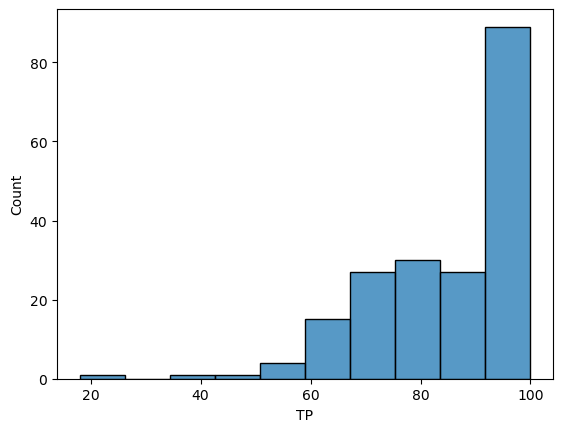

****************************************
NIHSSàlasortie :
[11  6  1  3 18  0 12 10  5  7  4  8 15 29 20 14 16 23 25 22 19 32 17  2
 26 24  9 13]


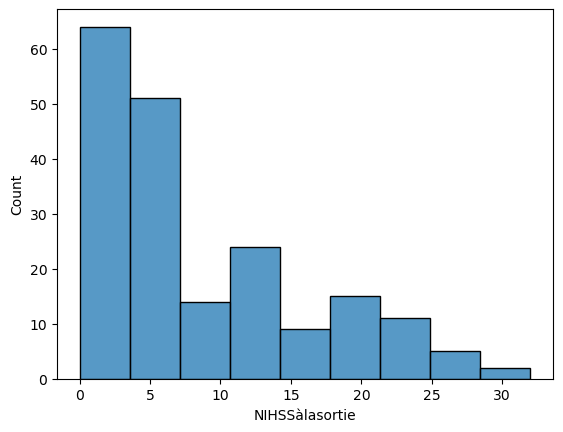

****************************************
TDMcàH24 :
[1 0]


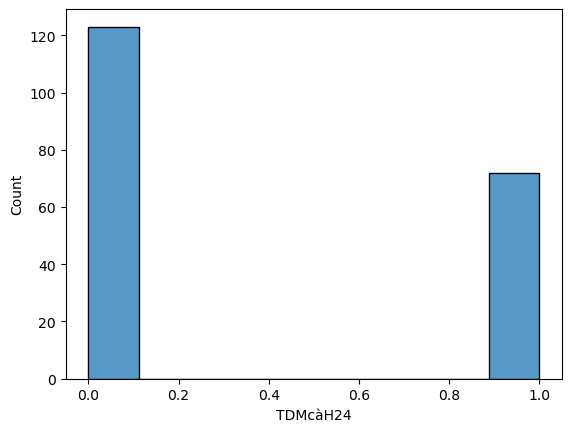

****************************************
sylviensuperf :
[0 1]


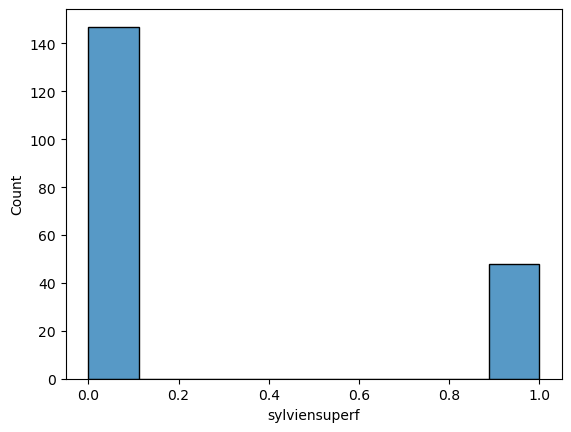

****************************************
sylvientotal :
[1 0]


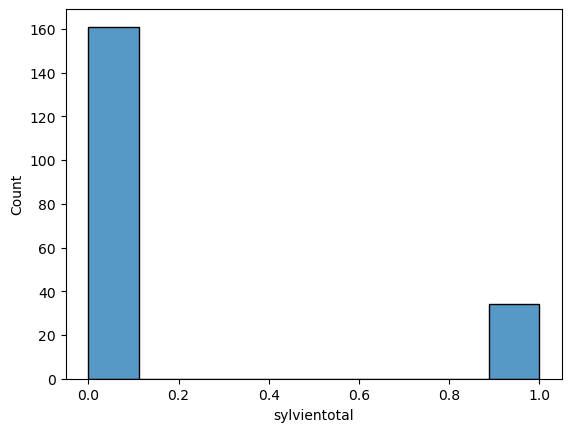

****************************************
sylvienprof :
[0 1]


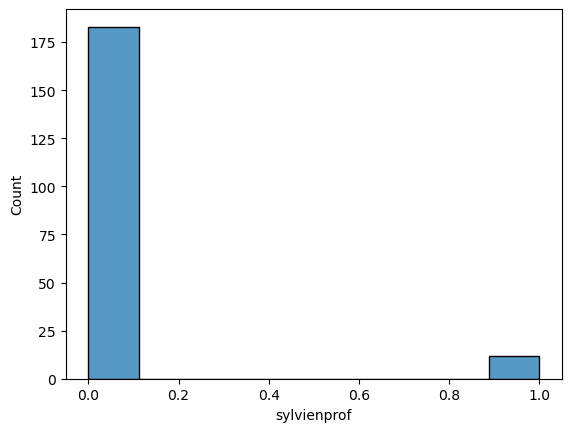

****************************************
cérébraleant :
[0 1]


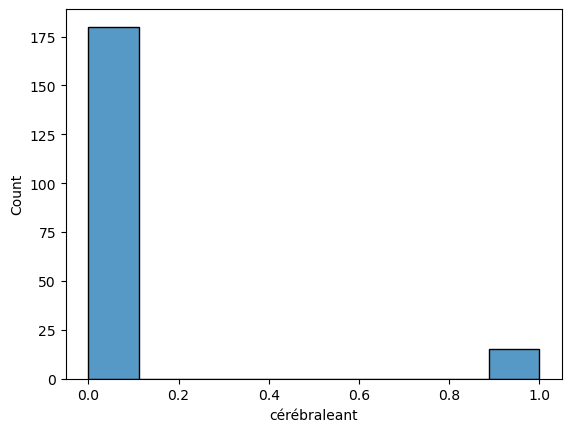

****************************************
cérebralpost :
[0 1]


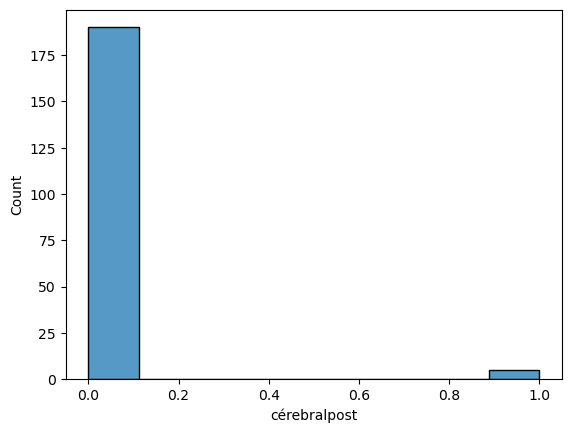

****************************************
jonctionnelant :
[0 1]


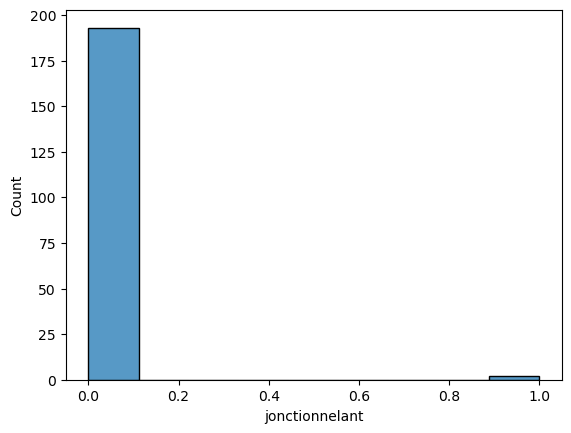

****************************************
jonctionnelpost :
[0]


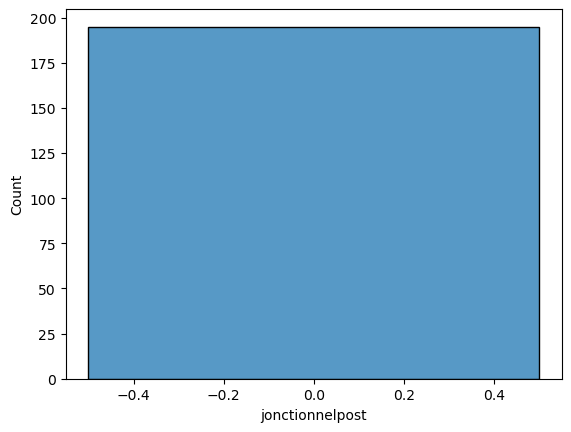

****************************************
tronccérebral :
[0 1]


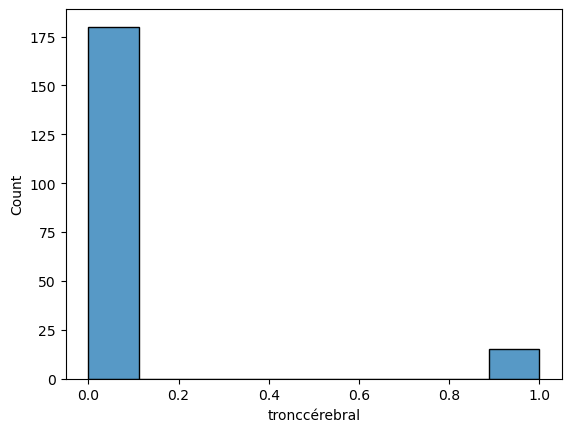

****************************************
cervelet :
[0 1]


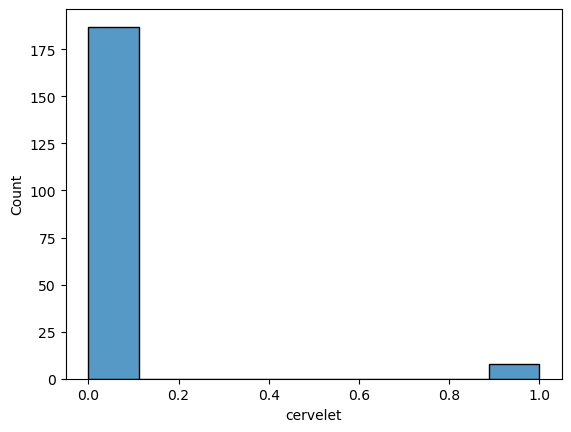

****************************************
lacunes :
[0 1]


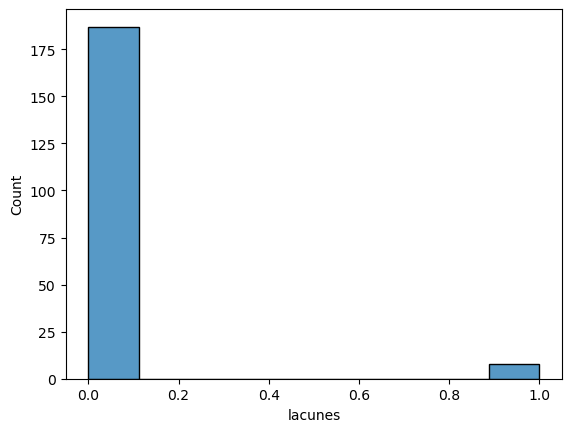

****************************************
CE :
[0 1]


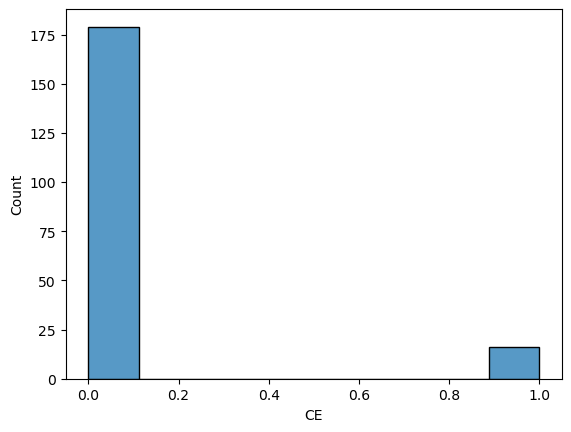

****************************************
oedeme :
[1 0]


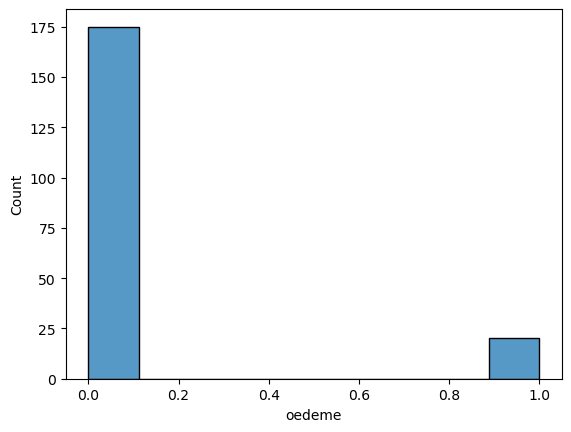

****************************************
effetdemasse :
[1 0]


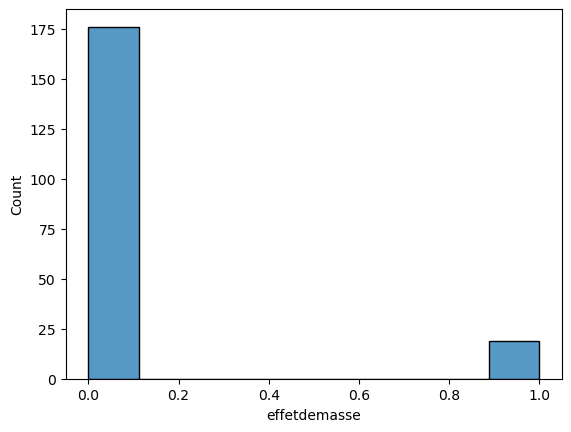

****************************************
engagement :
[0 1]


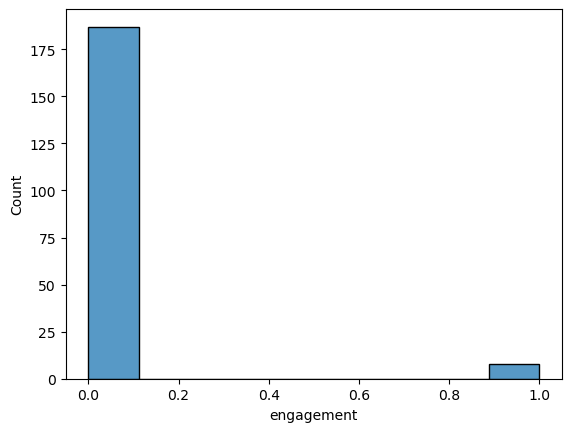

****************************************
hydrocéphalie :
[0]


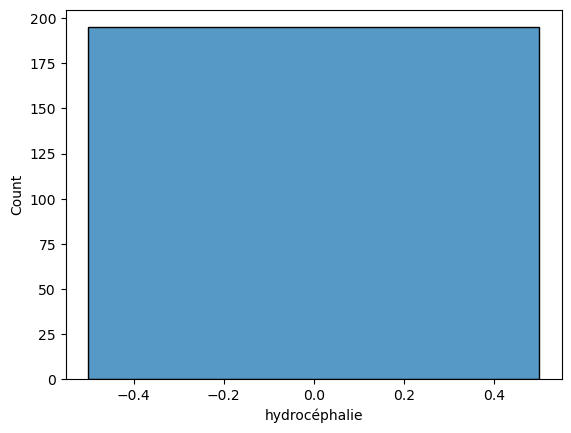

****************************************
transformation_hémorragique :
[1 0]


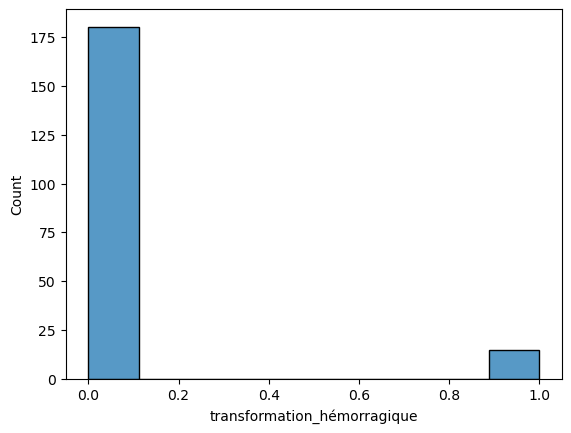

****************************************
infectionurinaire :
[0 1]


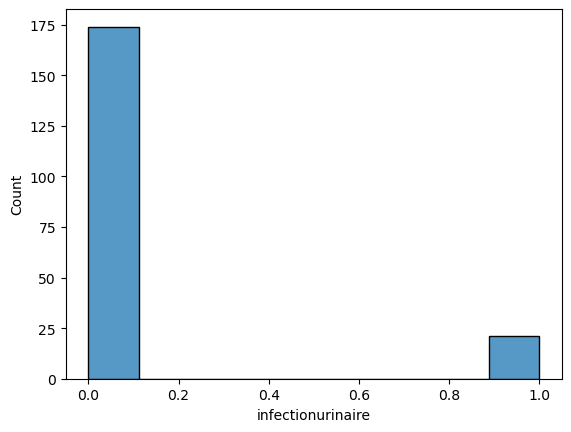

****************************************
infectionpulmonaire :
[0 1]


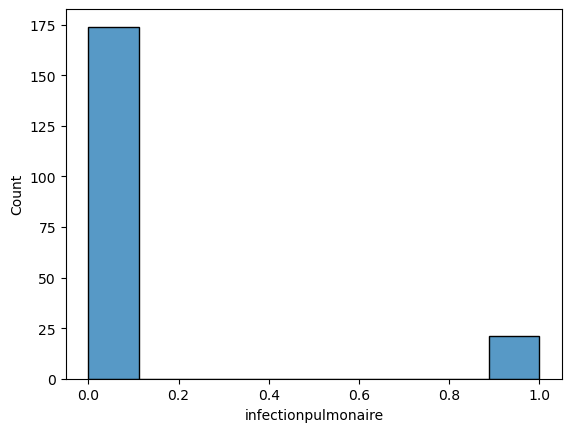

****************************************
décompensationdediabète :
[0 1]


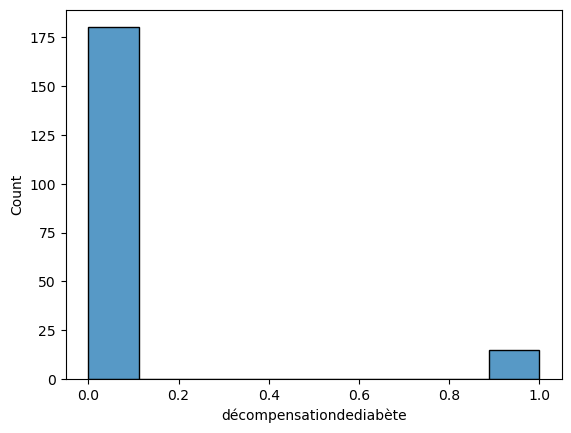

****************************************
hypernatrémie :
[0 1]


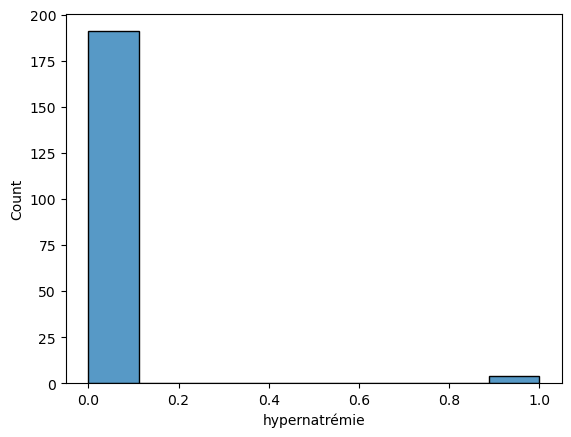

****************************************
tbhémostase :
[0 1]


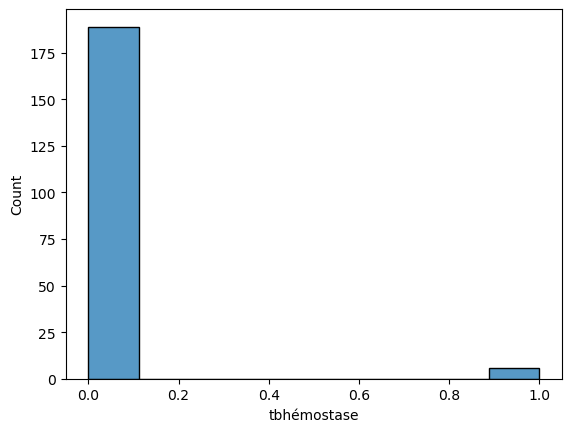

****************************************
escarre :
[0 1]


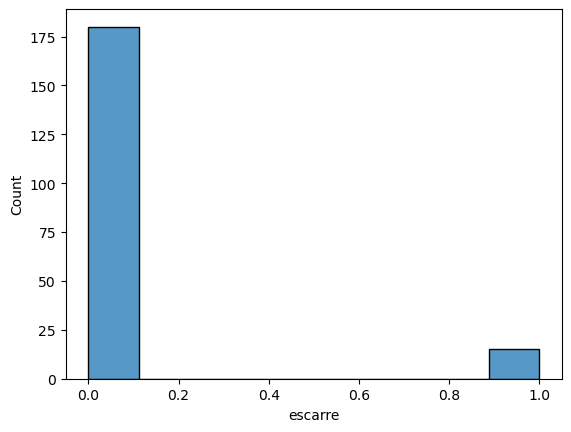

****************************************
phlébite :
[0 1]


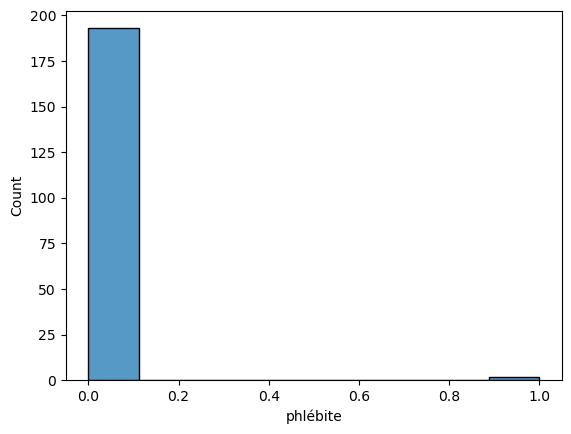

****************************************
EP :
[0 1]


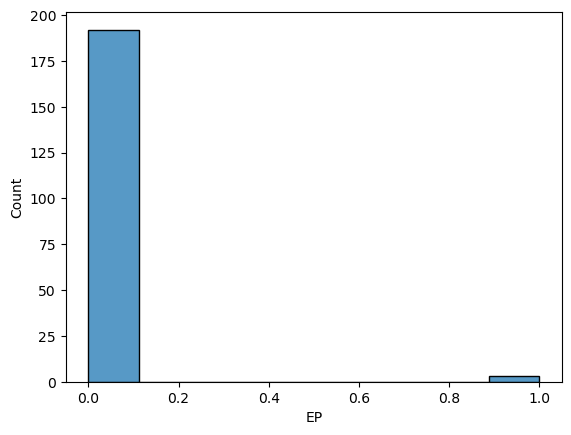

****************************************
Mortalité :
[0 1]


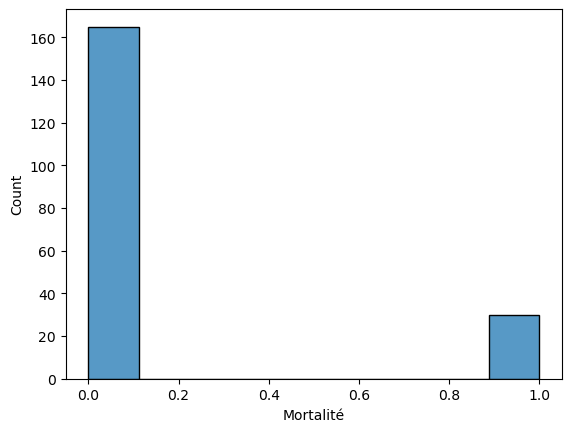

****************************************
mannitol :
[1 0]


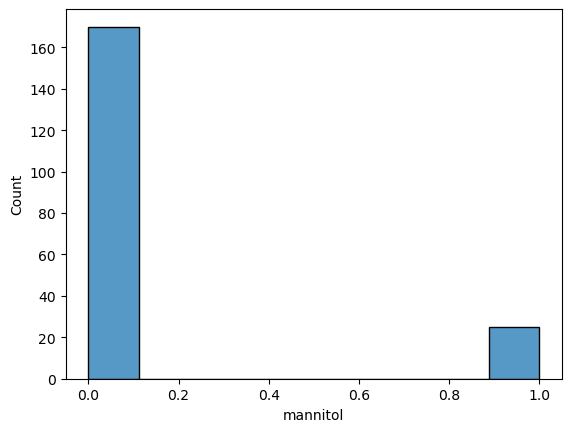

****************************************
RANKINmodifiéà3mois :
[5 3 1 2 6 4 0]


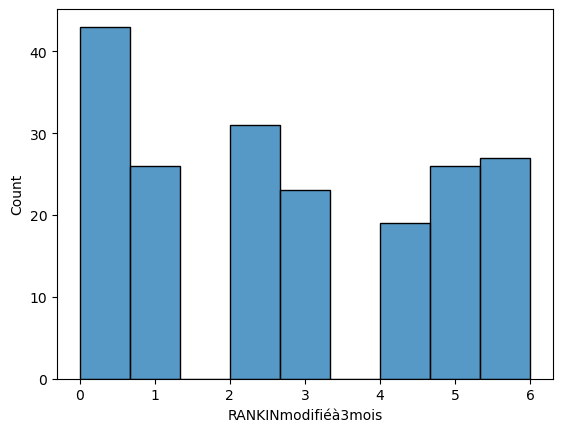

****************************************
thrombolyse :
[1 0]


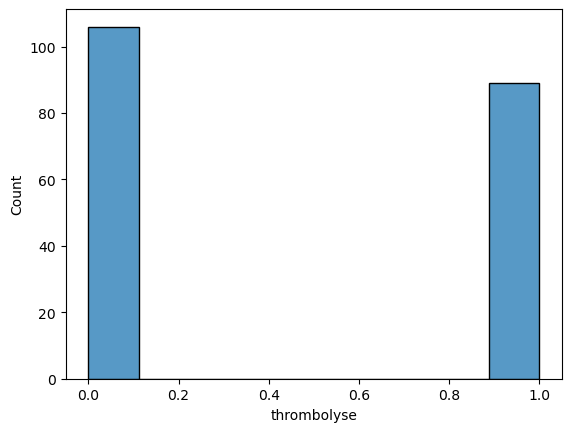

****************************************


In [10]:
for col in dfTh_finale.select_dtypes('int64').columns:
    print(col+" :")
    print(dfTh_finale[col].unique())
    sns.histplot(dfTh_finale[col])
    plt.show()
    print("*"*40)

##### distinguer les colonnes entre catégorique et numérique

In [11]:
numCol=[]
catCol=[]
for col in dfTh_finale.select_dtypes('int64').columns:
    if(dfTh_finale[col].nunique()>10):
        numCol.append(col)
    else:
        if dfTh_finale[col].nunique()!=1:
            catCol.append(col)
numCol.append("GAD")
numCol.append("INR")

### Visualisation des valeurs numérique

Age :
[48 66 37 53 68 60 50 34 55 88 44 56 61 51 84 63 64 86 78 85 70 77 65 62
 91 67 73 43 83 57 69 80 71 82 75 81 24 59 45 32 92 87 29 40 72 76 41 47
 35 74 46 94 49 96 52 90 54]


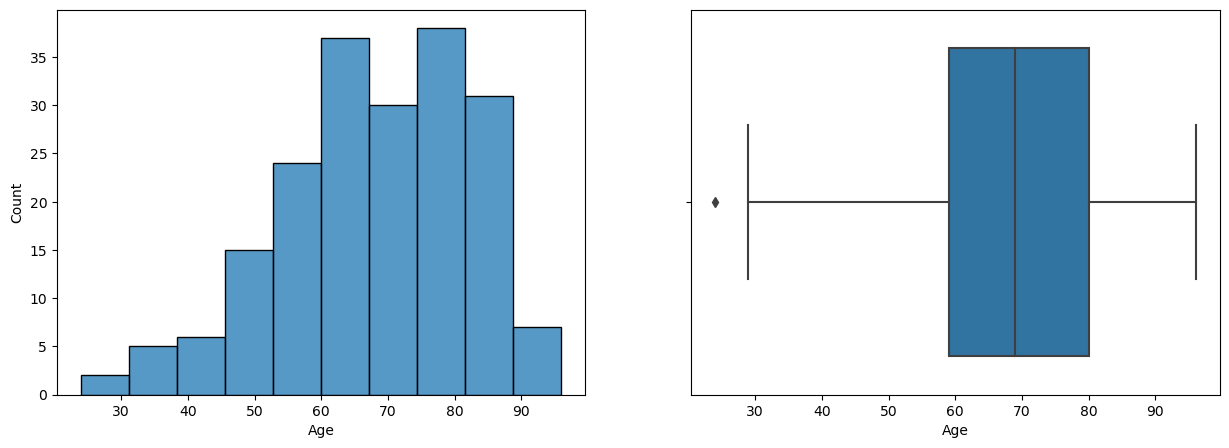

****************************************
Délai_début_symtomatologie_arrivée_URG :
[  60  120  150   30   90   45  200  180  160    0  135  140  165   15
   65   40  240  720  540 1080  750  360 1320  270  300 3000   75 4200
  210 1860  330 2520 4080 2040 1560 4170 4140  690  480 3180 3600  780
 4260 1440  600 1530 1650 1680  960 1260 1020 2640 1770 2490 2910  810
  840  870 1380 1410 1740]


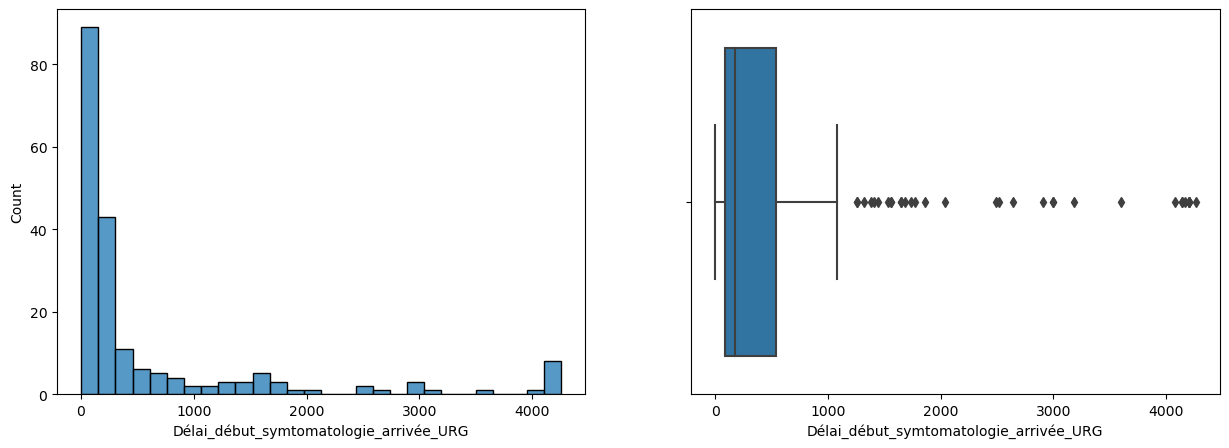

****************************************
délai_début_avis_neuro :
[ 120   60   80   90  165   45  100   40  160  205  105  185  180   10
  150   75   85   30  195   65  170  125  155    0  130  140   15  115
  200  420  990  570  240 1260  330 1050  480 1620  510  360 3060 1200
 4320  300  600 3360 2040  630  540 2640 4260 2220 4080 4200 1860  270
  900  660   55 3300  870  450  810  390 3720 1680  615 2010 1800 1320
 1380  210 1440 1140 2700  750 1920 2790 1020 3270 1110 1830 1650  720]


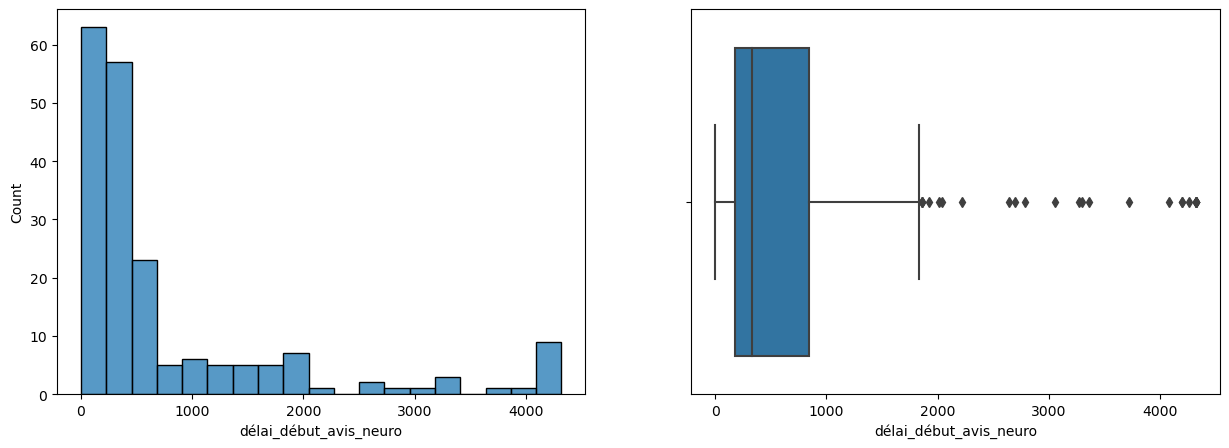

****************************************
délai_début_imagerie :
[   90    60   120   150   210   145    55   240   180   195    30    35
   105   175   140   160    45   220   630  1320   360  1380  1530  1290
   600  1260   300   450   570   480  4680 10200   390   465  1680   960
   720  3450  2220   810   330   540  2400  4500   615  2310   510  1755
  4740  4524  1965   525   990   915   930  3390   900   870  1005   660
   735  4320  1140  5010   225   690   855  1440  2100   420  2130  1110
  1920   555   270  1620  2280  2910  2460   840   495  2925   405  3510
  1395  1950  1980  2250  2040  4560  1080]


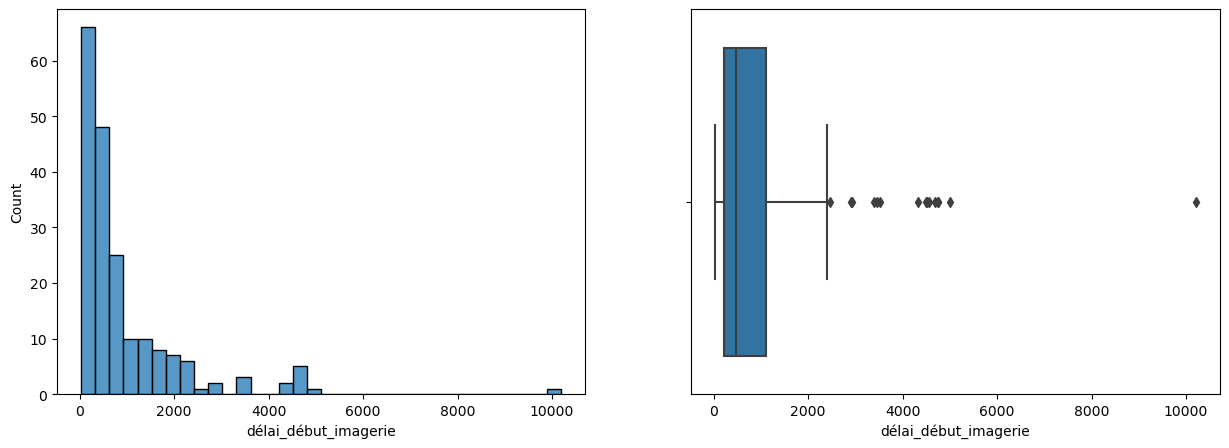

****************************************
NIHSS initial :
[20  6  3 14 10 15 12  7 11 18 16 13 21  1  9 17  5  2 19  4 26  0 25 24
 22 30  8 23]


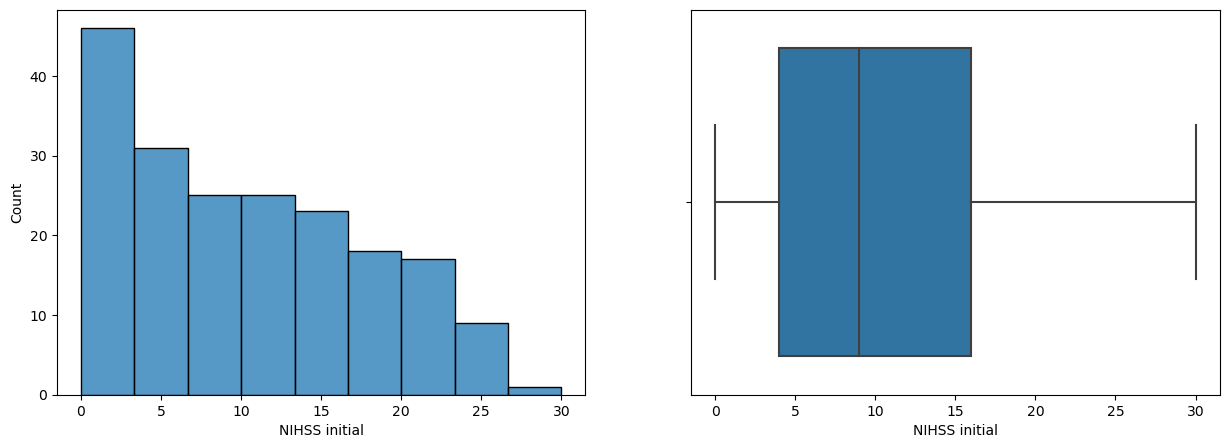

****************************************
TAS :
[180 120 150 145 130 140 160 170 100 190 250 110 200 125 165 115 155 175
 158 135 139 105]


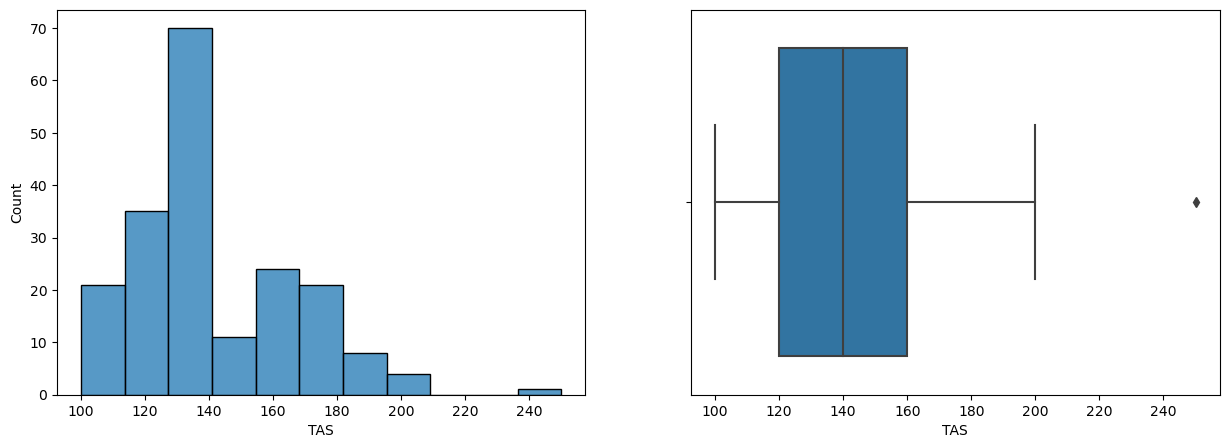

****************************************
TAD :
[ 70 100  80  90  60 130  75 115  95  87  85 110  50  76  64 120  65  67
  55]


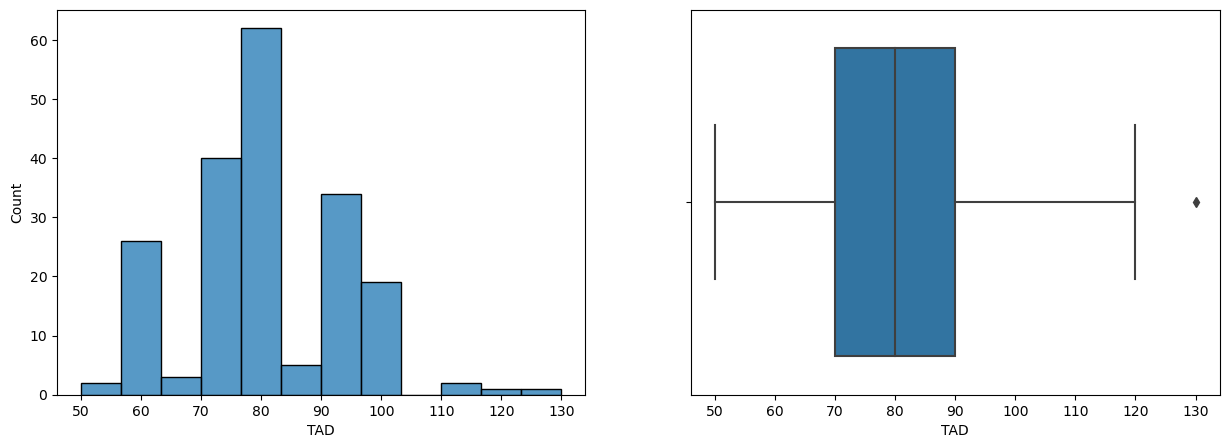

****************************************
Plaquettes :
[197000 176000 180000 200000 148000 117000 212000 225000 220000 205000
 194000 177000 231000 293000 248000 166000 284000 232000 216000 263000
 159000 236000 174000 224000 186000 309000 394000 195000 353000 110000
 235000 258000 151000 308000 328000 190000 240000 337000 162000 252000
 246000 230000 222000 463000 193000 301000 348000 297000 274000 158000
 185000 189000 210000 202000 279000 226000 215000 413000 228000 335000
 341000 419000 257000 262000 376000 156000 171000 204000 155000 350000
 275000 211000 733000 196000 302000 198000 233000 139000 136000 256000
 276000 157000 395000 140000 239000 161000 182000 270000 123000 250000
  11000 203000 188000 179000 172000 366000 389000 374000 170000 133000
 245000 146000 319000 326000 100000 229000 183000 167000 379000 111000
 360000 192000  20800]


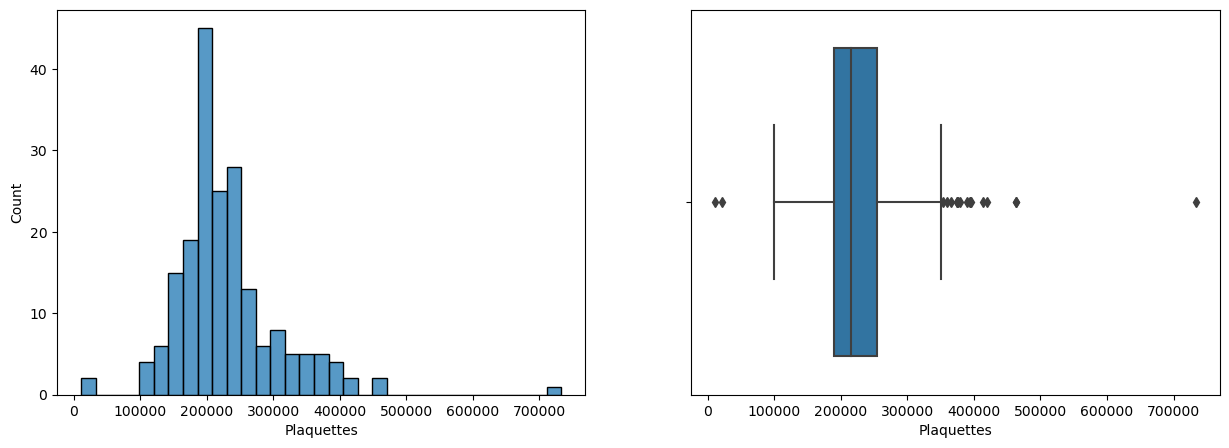

****************************************
TP :
[100  80  98  77  79  82  64  61  81  70  67  68  73  93  90  83  69  86
  75  18  63  60  72  66  76  92  87  58  57  74  88  85  65  97  96  54
  89  78  62  94  71  84  40  45]


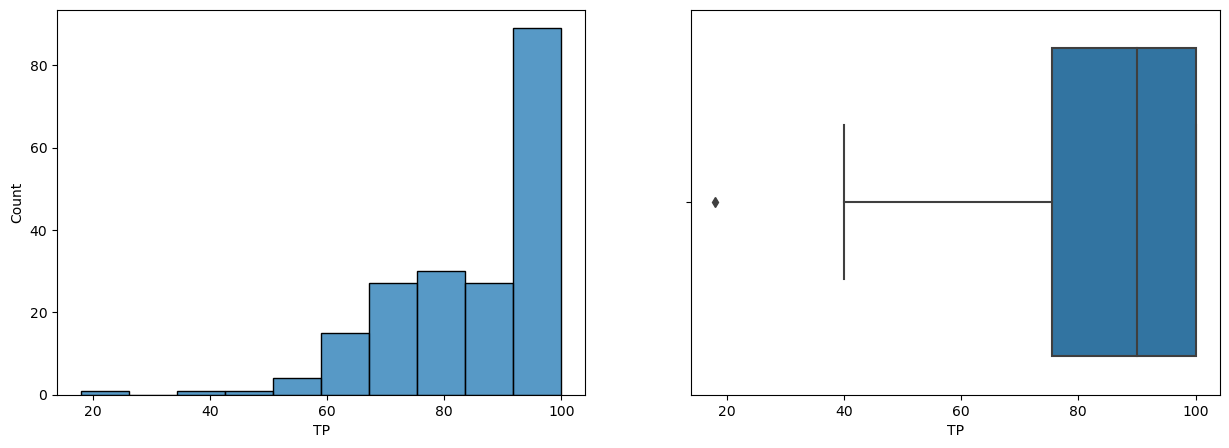

****************************************
NIHSSàlasortie :
[11  6  1  3 18  0 12 10  5  7  4  8 15 29 20 14 16 23 25 22 19 32 17  2
 26 24  9 13]


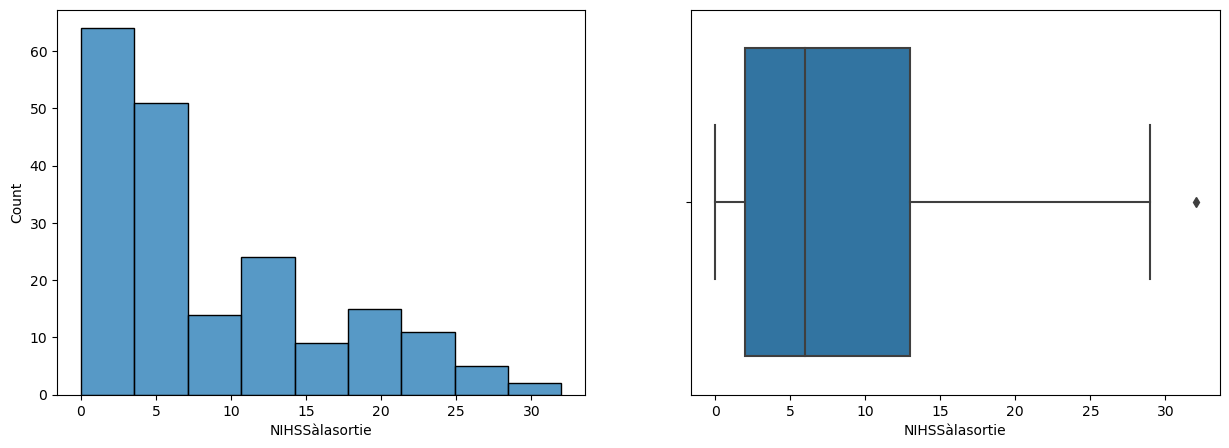

****************************************
GAD :
[2.     1.2    1.3    3.2    1.5    3.15   2.8    1.1    1.46   1.26
 0.97   3.8    1.44   1.01   1.19   1.     1.24   1.17   1.23   2.5
 1.27   1.4    1.06   0.93   1.026  1.35   1.494  3.546  1.008  2.682
 2.376  1.116  1.278  0.828  2.25   1.062  2.196  0.918  3.402  0.972
 1.566  0.684  1.872  0.846  1.62   0.99   0.702  2.88   4.482  0.81
 0.738  0.954  0.666  1.548  0.576  1.296  2.934  2.286  2.16   2.016
 3.834  1.476  1.512  1.368  0.882  1.404  1.08   1.53   1.3644 2.268
 2.178  1.044  2.232  0.756  1.71   1.98   1.152  1.764  1.332  0.864
 1.89   4.05   2.07   1.188  1.746  3.276  4.662  2.34   1.224  1.908
 1.692  1.242  1.944  2.502  0.936  1.674  0.774  2.97   2.862  0.792
 1.386  1.098  4.5   ]


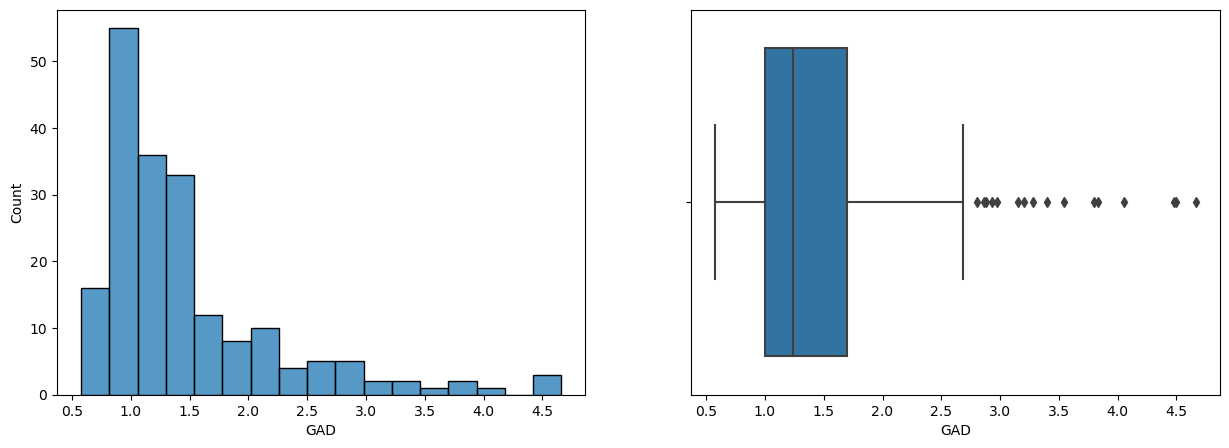

****************************************
INR :
[1.   1.18 1.06 1.26 1.23 1.01 1.14 1.5  1.38 1.16 1.3  1.35 1.08 1.31
 1.2  1.63 1.29 1.04 1.68 1.24 1.4  1.19 2.17 1.72]


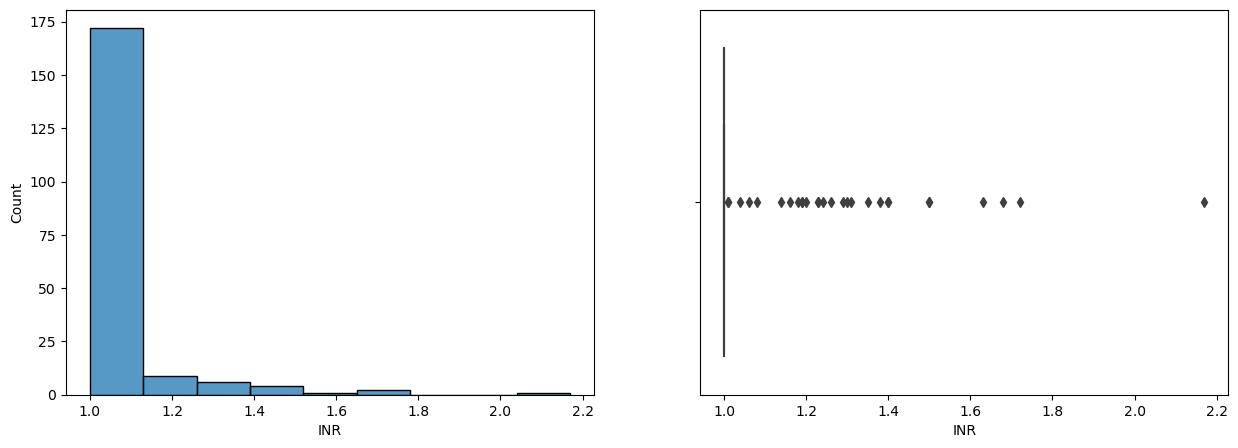

****************************************


In [12]:
for col in numCol:
    print(col+" :")
    print(dfTh_finale[col].unique())
    fig, axes = plt.subplots(1, 2,figsize=(15, 5))
    sns.histplot(dfTh_finale[col],ax=axes[0])
    sns.boxplot(dfTh_finale[col],ax=axes[1])
    plt.show()
    print("*"*40)

### Visualisation des valeurs catégorique

sexe :
[1 2]


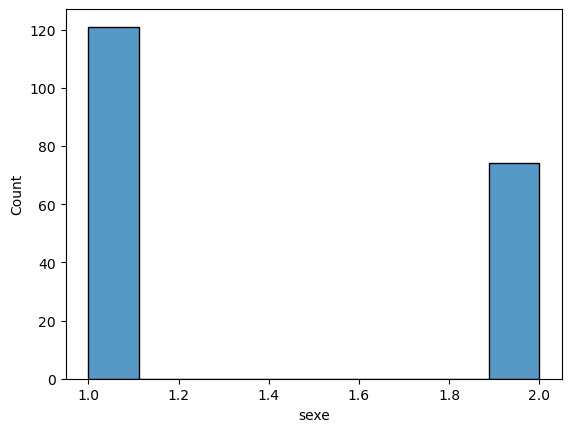

****************************************
latéralité :
[1 2]


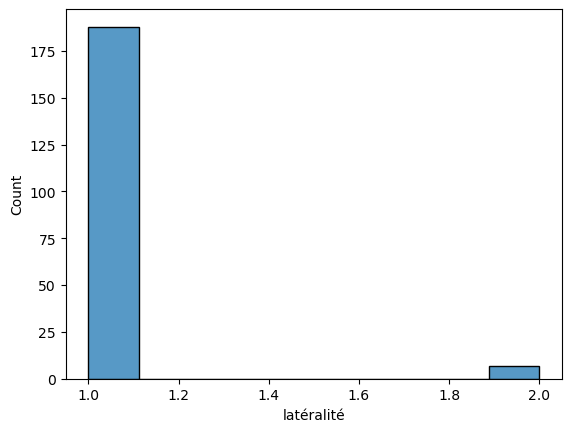

****************************************
Tabac :
[1 0]


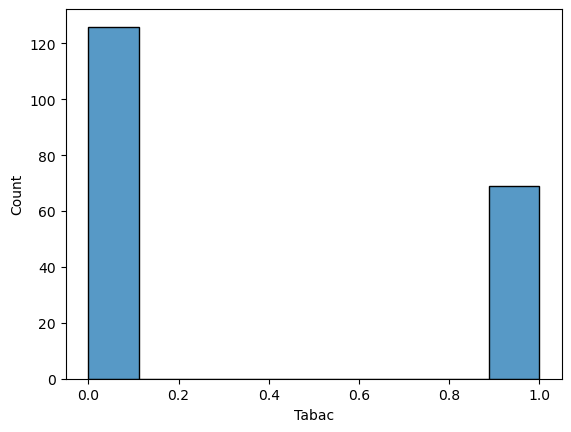

****************************************
alcool :
[0 1]


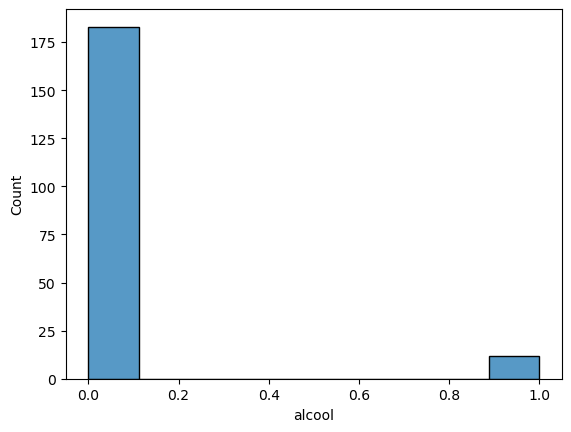

****************************************
Neffa :
[0 1]


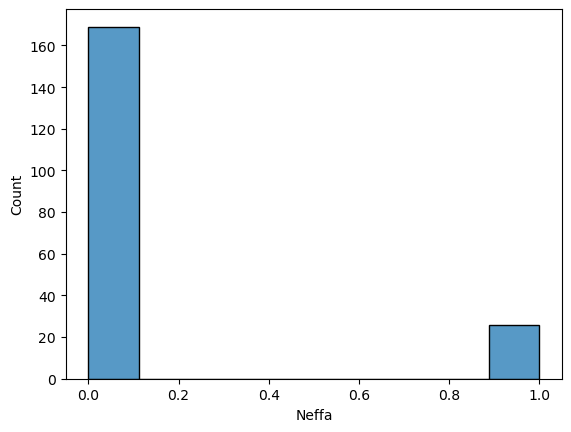

****************************************
sedentarité :
[0 1]


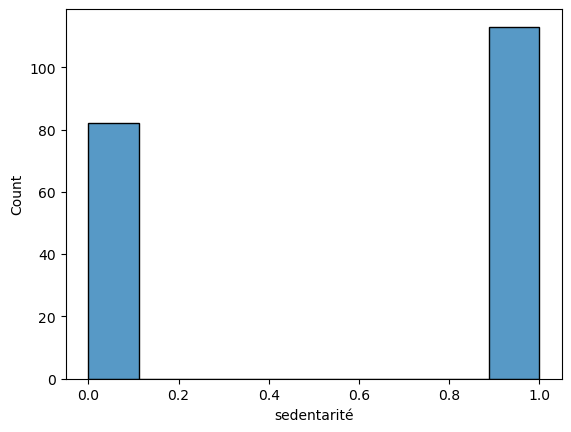

****************************************
HTA :
[0 1]


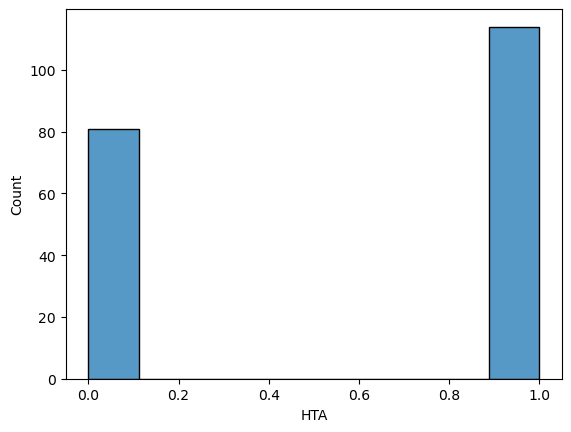

****************************************
Diabète :
[0 1]


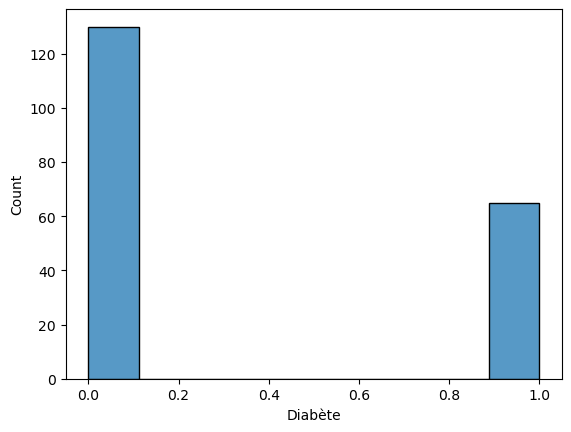

****************************************
Dyslipidémie :
[1 0]


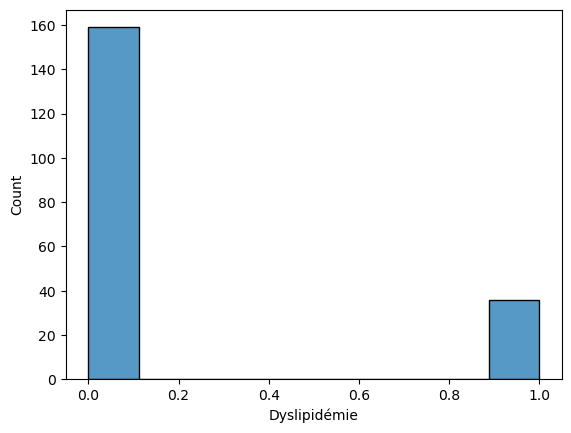

****************************************
ACFA :
[0 1]


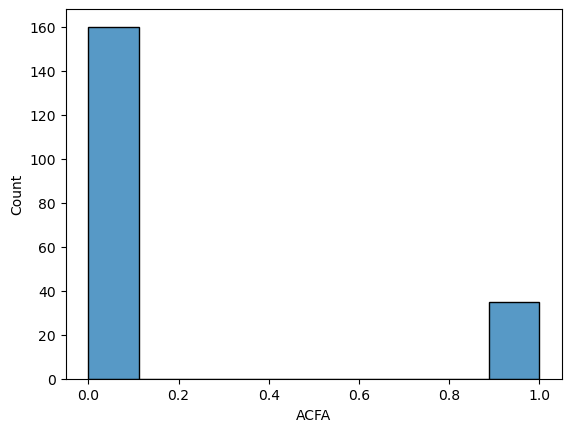

****************************************
insuffisancecoronaire :
[0 1]


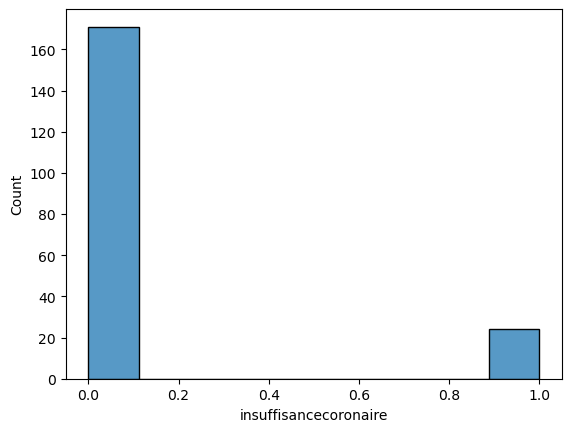

****************************************
valvulopathie :
[0 1]


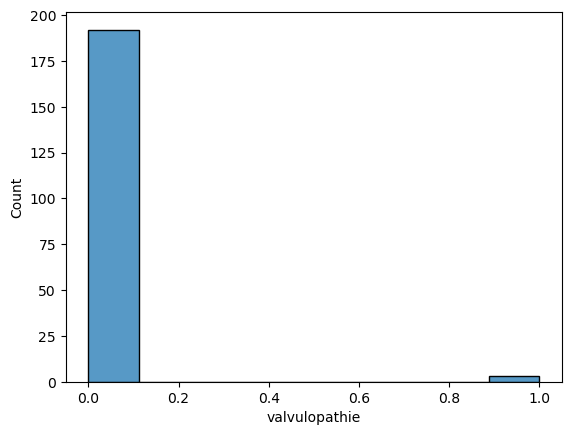

****************************************
AVC :
[0 1]


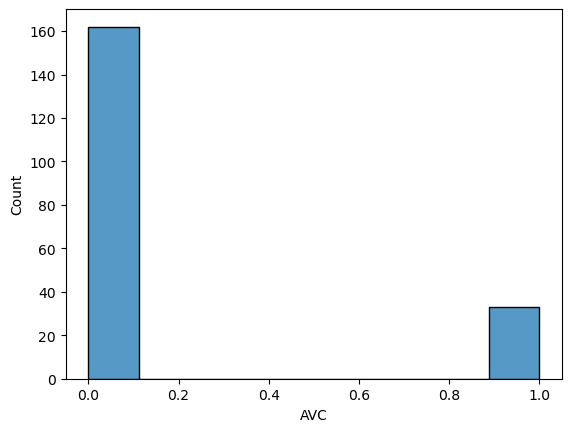

****************************************
AIT :
[0 1]


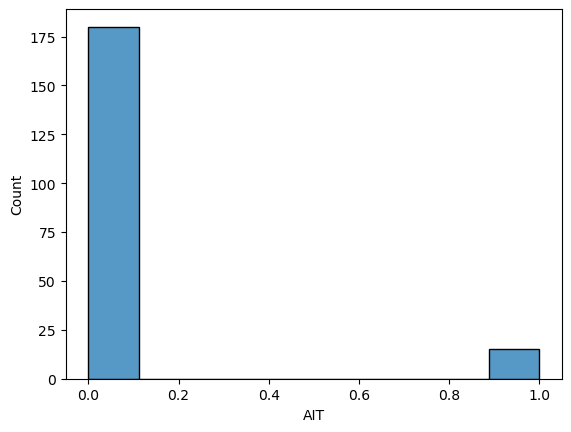

****************************************
AOMI :
[0 1]


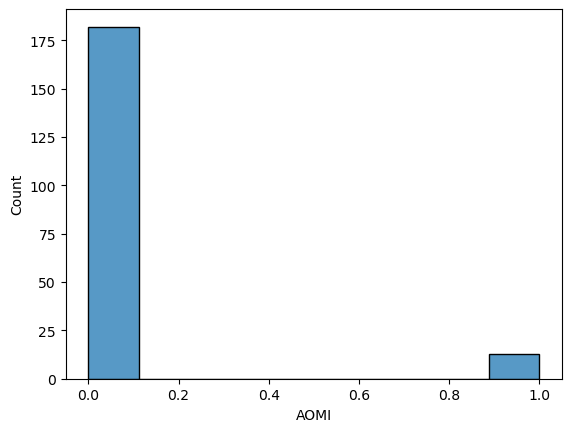

****************************************
démence :
[0 1]


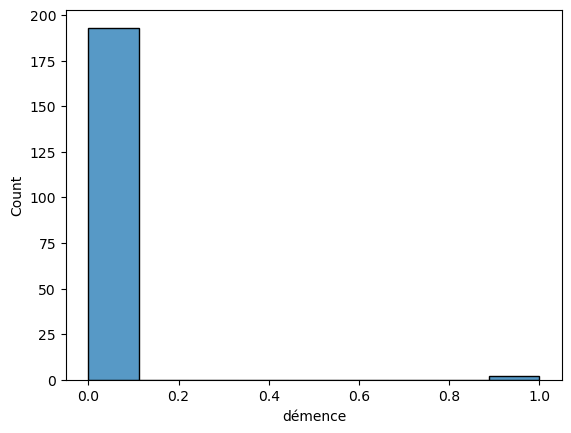

****************************************
scoredeglasgow :
[15 10 14  8 13 11  6  7  5]


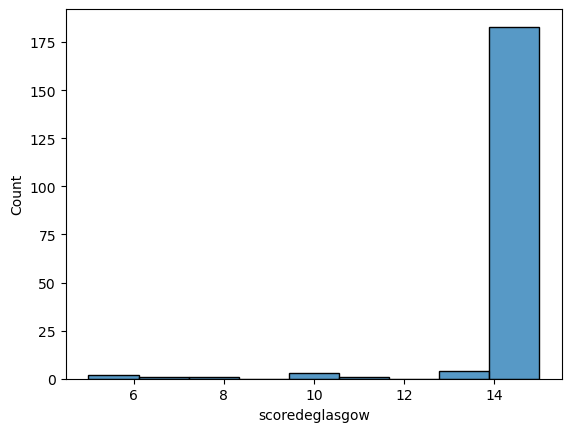

****************************************
tdmnormale :
[0 1]


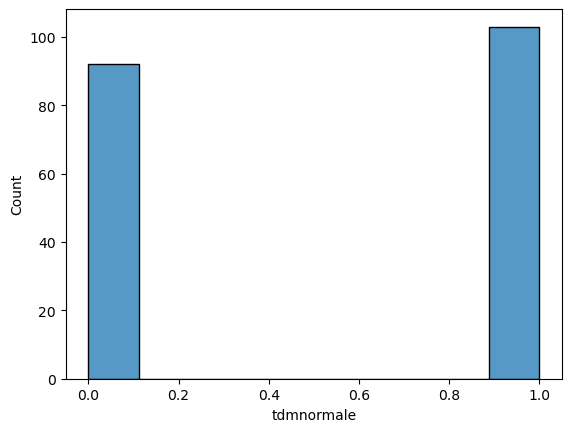

****************************************
signesprécocestdm :
[1 0]


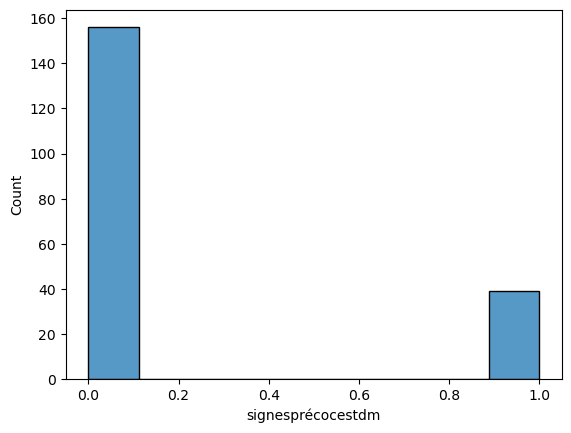

****************************************
hypodensité franche :
[0 1]


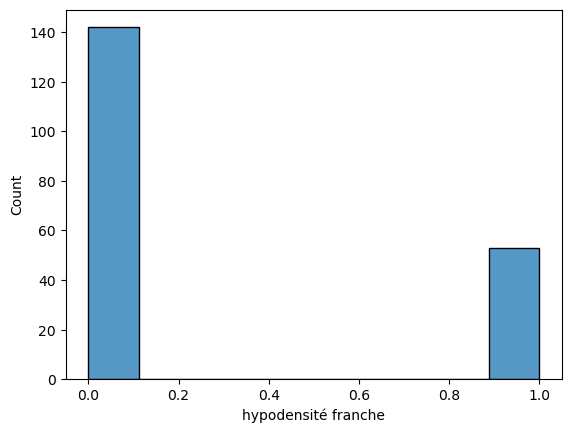

****************************************
TDMcàH24 :
[1 0]


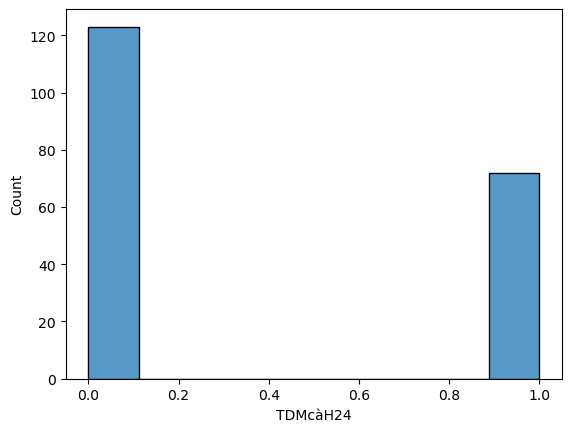

****************************************
sylviensuperf :
[0 1]


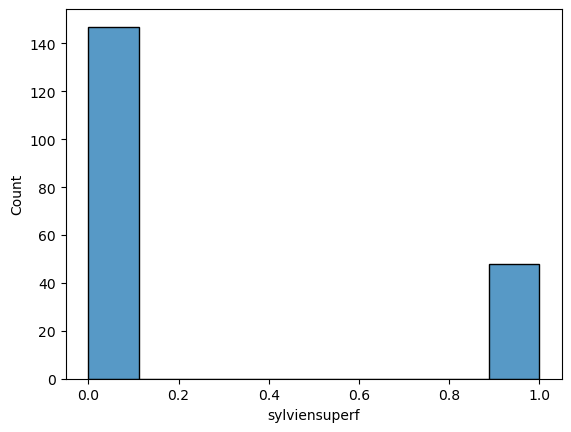

****************************************
sylvientotal :
[1 0]


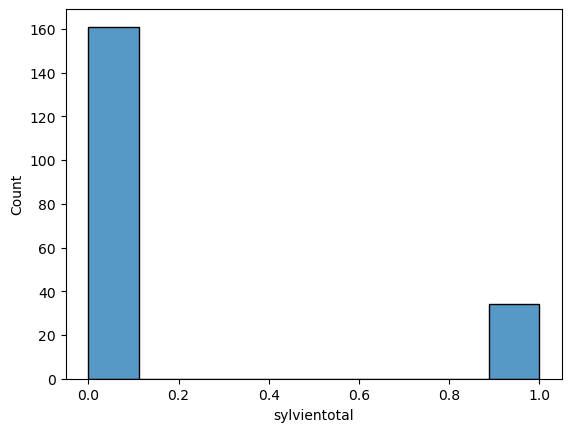

****************************************
sylvienprof :
[0 1]


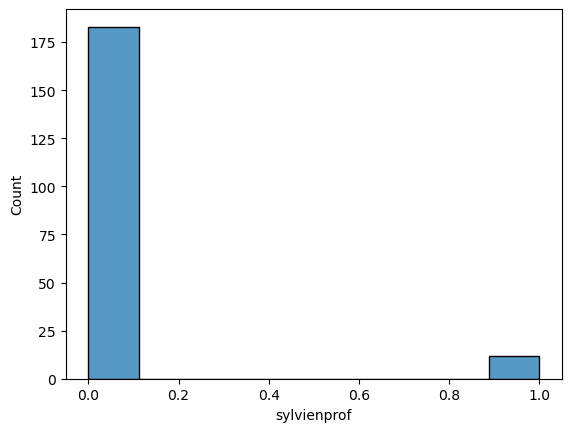

****************************************
cérébraleant :
[0 1]


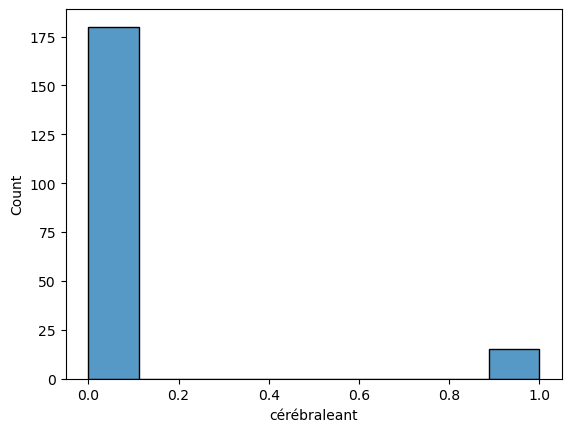

****************************************
cérebralpost :
[0 1]


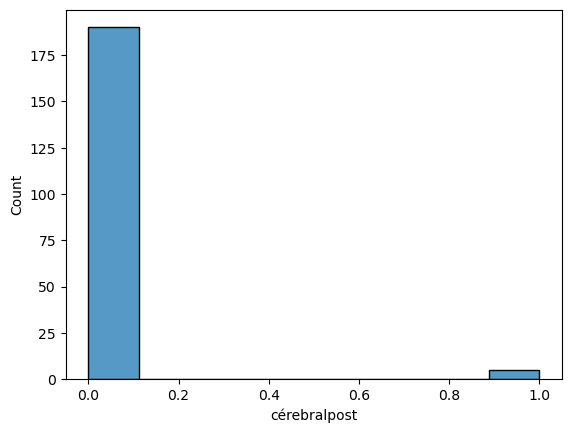

****************************************
jonctionnelant :
[0 1]


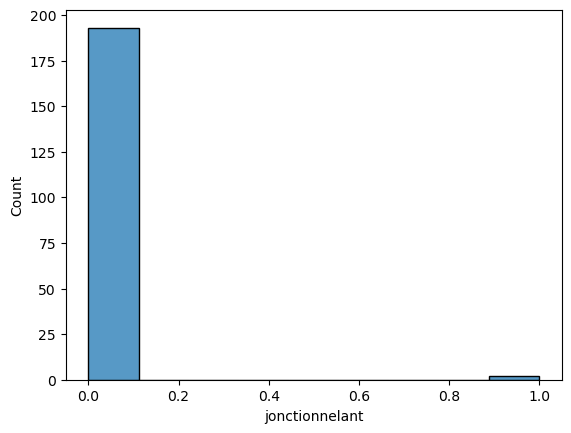

****************************************
tronccérebral :
[0 1]


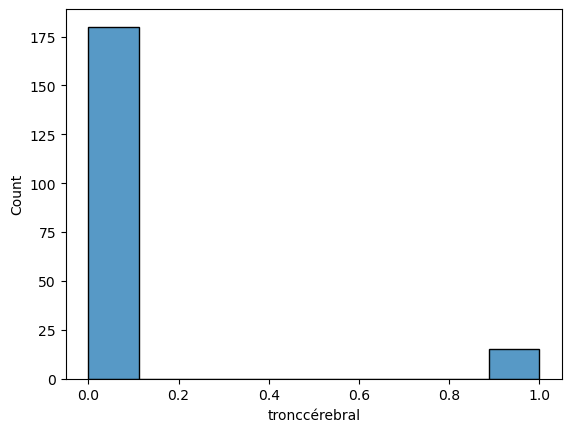

****************************************
cervelet :
[0 1]


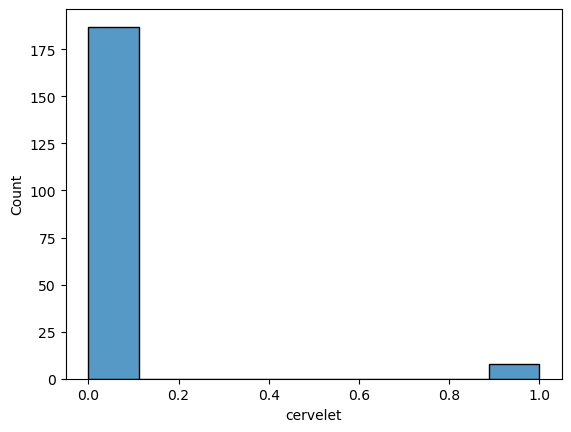

****************************************
lacunes :
[0 1]


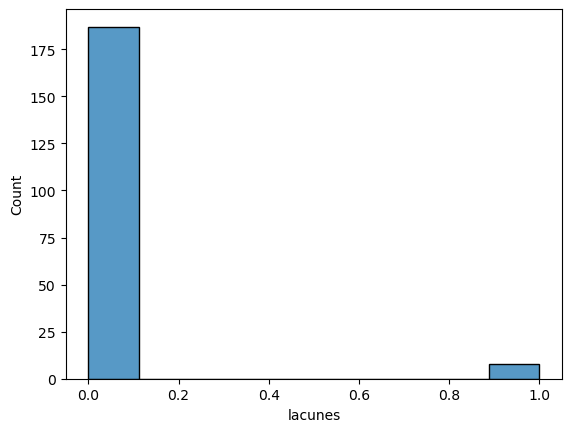

****************************************
CE :
[0 1]


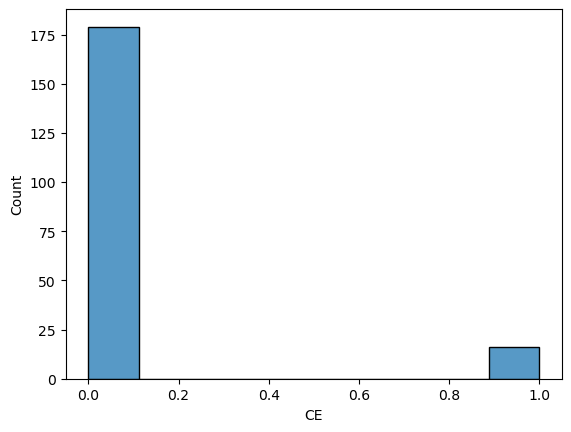

****************************************
oedeme :
[1 0]


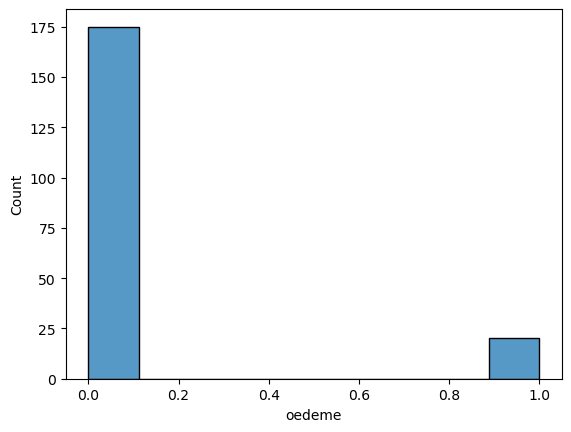

****************************************
effetdemasse :
[1 0]


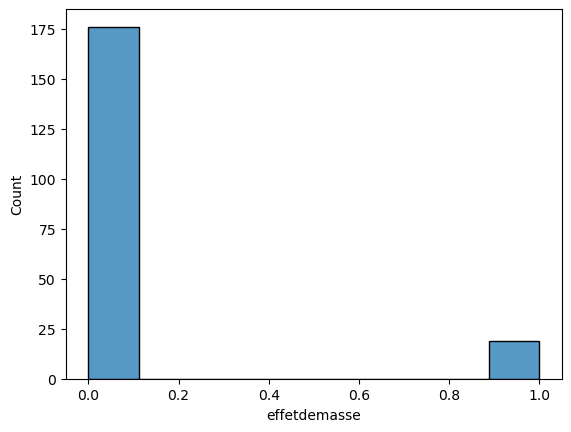

****************************************
engagement :
[0 1]


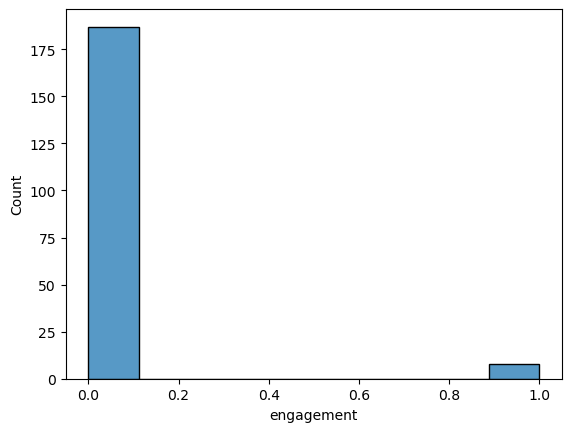

****************************************
transformation_hémorragique :
[1 0]


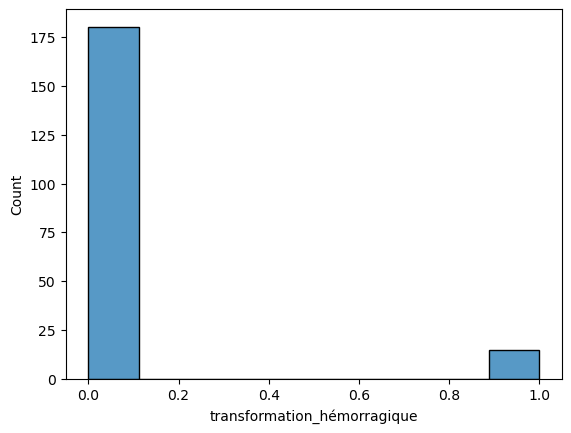

****************************************
infectionurinaire :
[0 1]


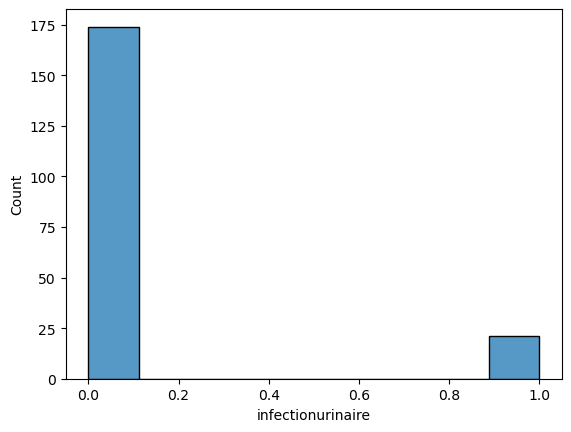

****************************************
infectionpulmonaire :
[0 1]


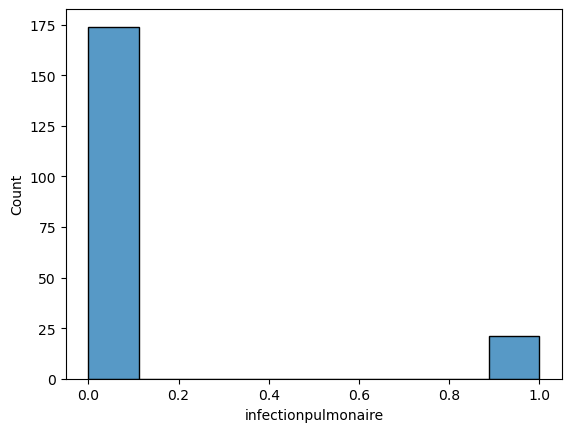

****************************************
décompensationdediabète :
[0 1]


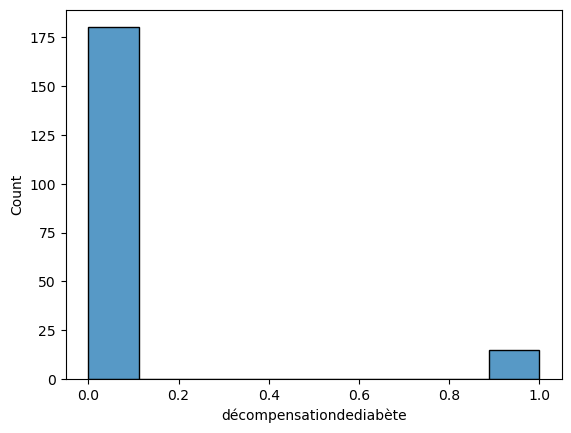

****************************************
hypernatrémie :
[0 1]


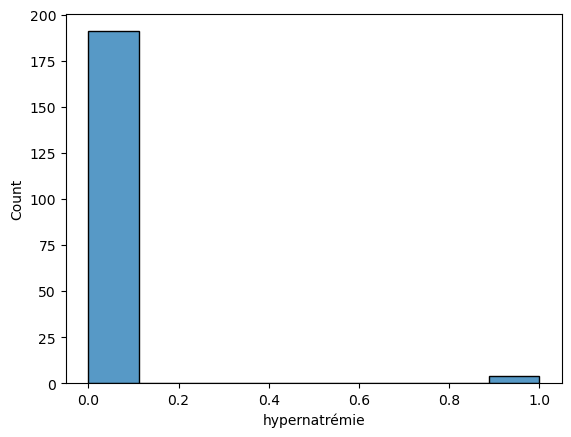

****************************************
tbhémostase :
[0 1]


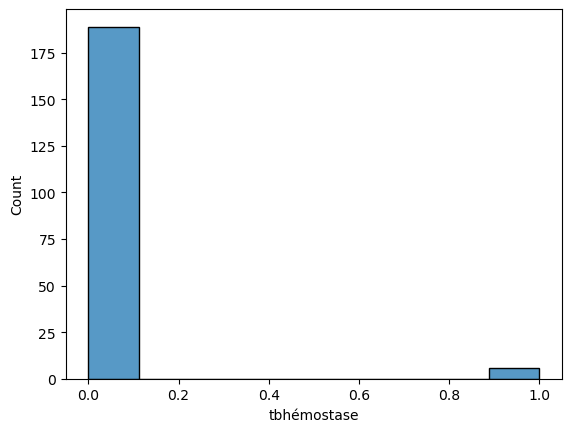

****************************************
escarre :
[0 1]


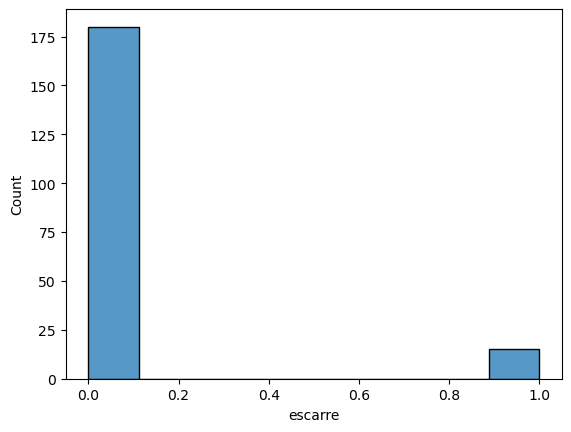

****************************************
phlébite :
[0 1]


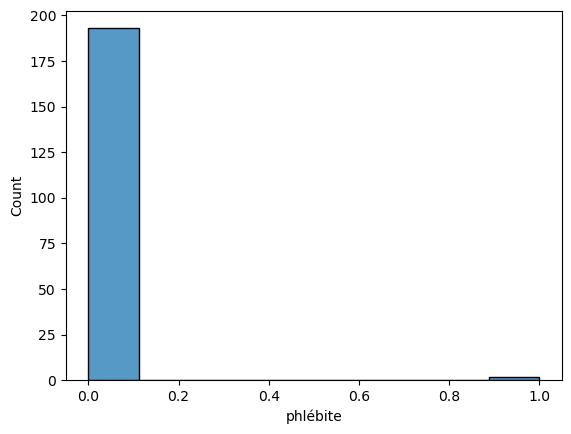

****************************************
EP :
[0 1]


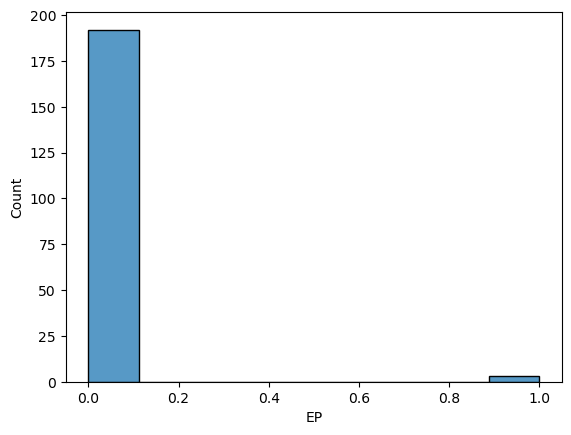

****************************************
Mortalité :
[0 1]


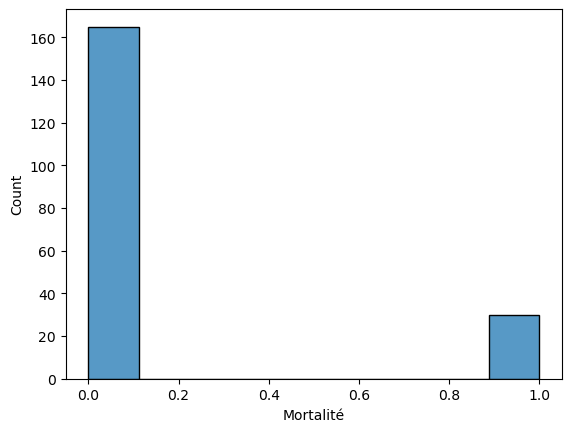

****************************************
mannitol :
[1 0]


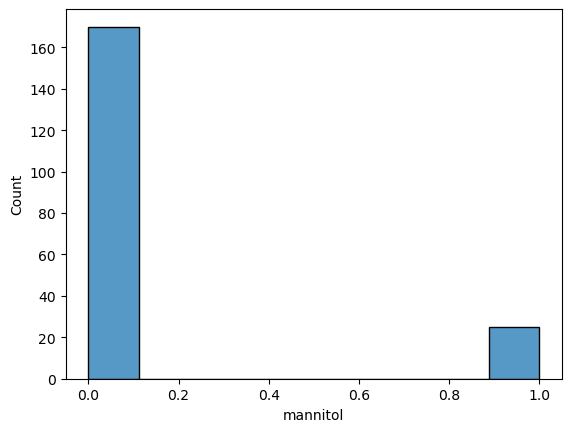

****************************************
RANKINmodifiéà3mois :
[5 3 1 2 6 4 0]


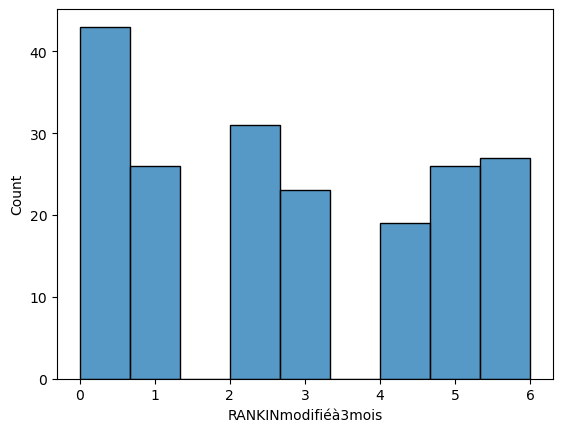

****************************************
thrombolyse :
[1 0]


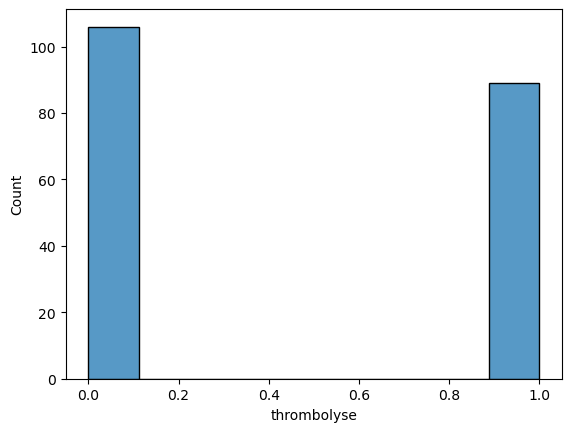

****************************************


In [13]:
for col in catCol:
    print(col+" :")
    print(dfTh_finale[col].unique())
    sns.histplot(dfTh_finale[col])
    plt.show()
    print("*"*40)

##### Il n'y a pas beaucoup de valeurs aberrantes, je vais pas les toucher avant d'essayer avec les modéles de prédictoin
##### Y'a des variables qui disposent d'une variance faible...


###### Matrice de correlation

<AxesSubplot:>

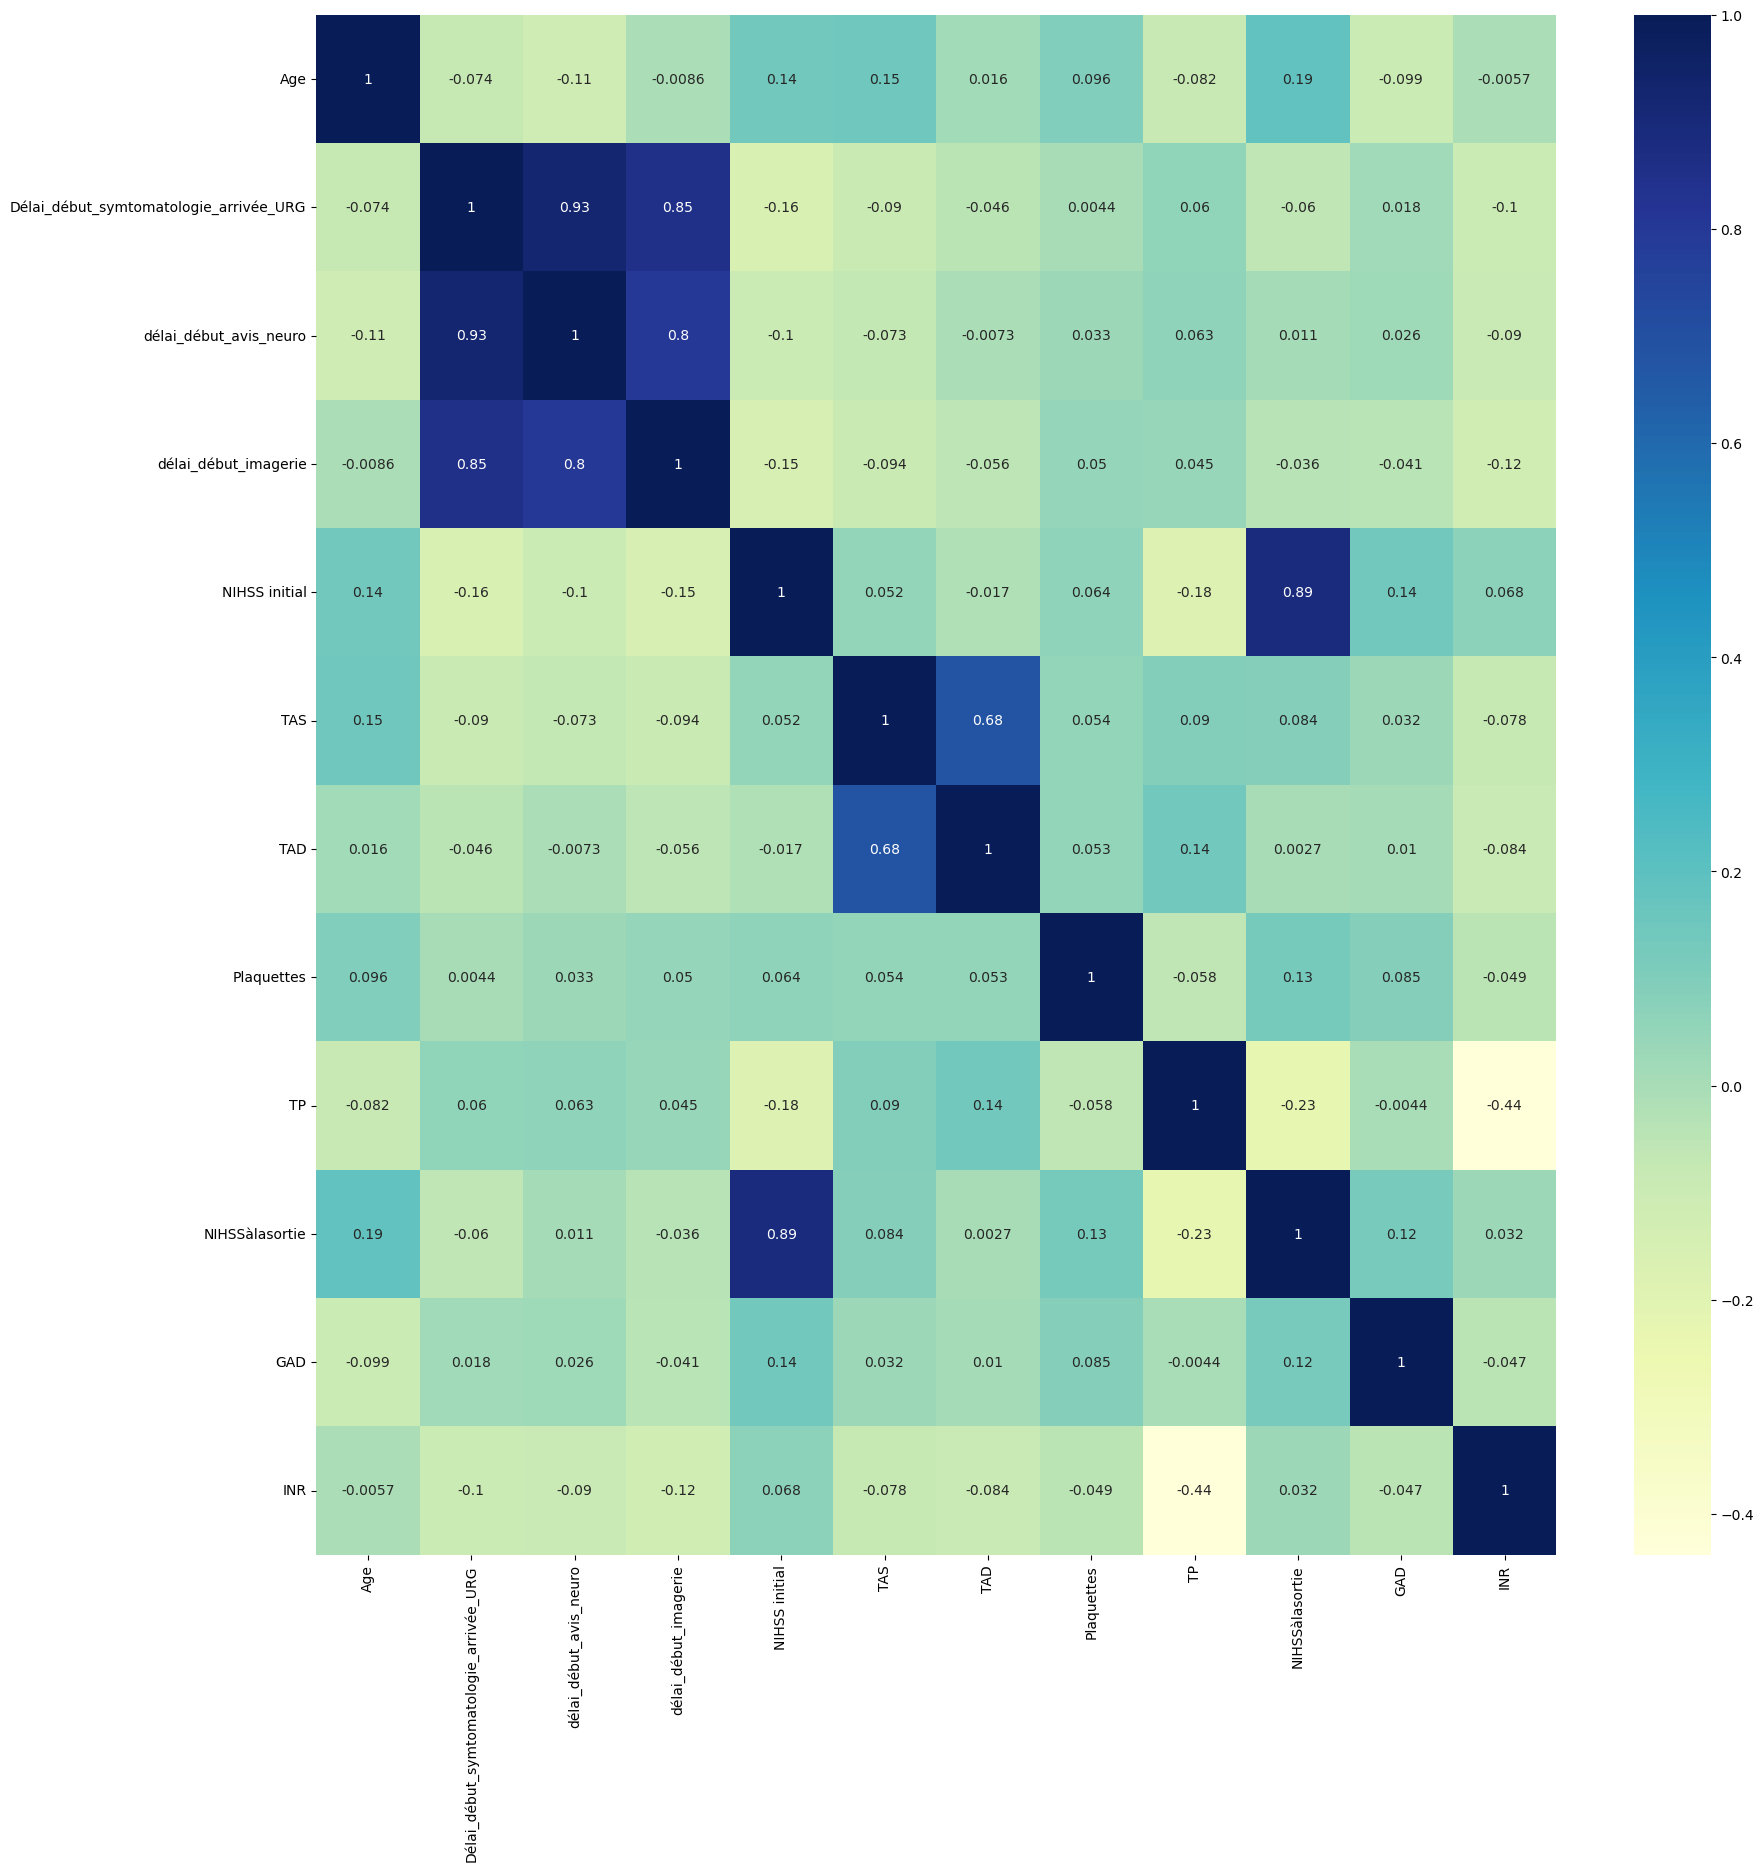

In [14]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(dfTh_finale[numCol].corr(),annot=True,cmap="YlGnBu",ax=ax)

##### Y'a une corrélation trés remarquable entre les variable, et c'est tout a fait normal dans le domaine médical vu qu'on a souvant les mesures des prélevements dans deux périoe ou des mesures de traitement et son prélevement
##### Vu qu'on vise a explorer l'importance des variables, on va pas prendre le risque d'effacer des variables

##### visualiser les variables en fonction de "thrombolyse" :

In [15]:
dfTh_finale["thrombolyse"].value_counts()/dfTh_finale.shape[0]

0    0.54359
1    0.45641
Name: thrombolyse, dtype: float64

sexe :
[1 2]


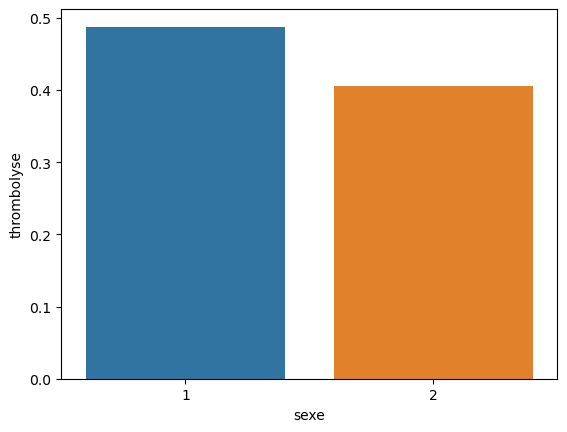

****************************************
latéralité :
[1 2]


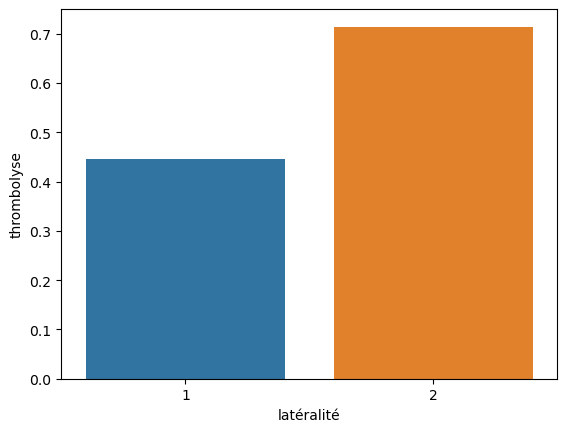

****************************************
Tabac :
[1 0]


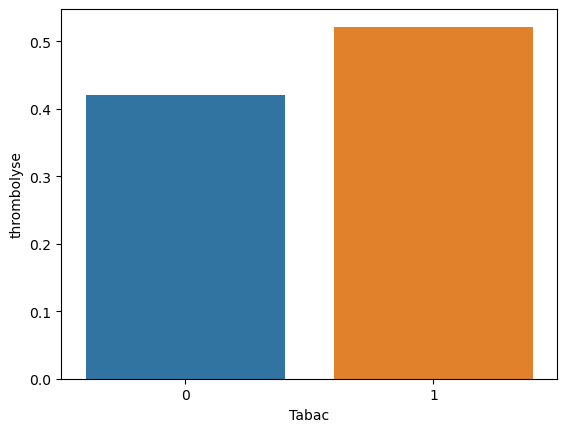

****************************************
alcool :
[0 1]


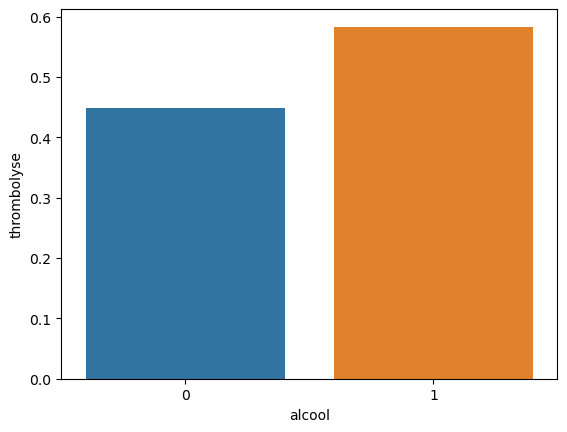

****************************************
Neffa :
[0 1]


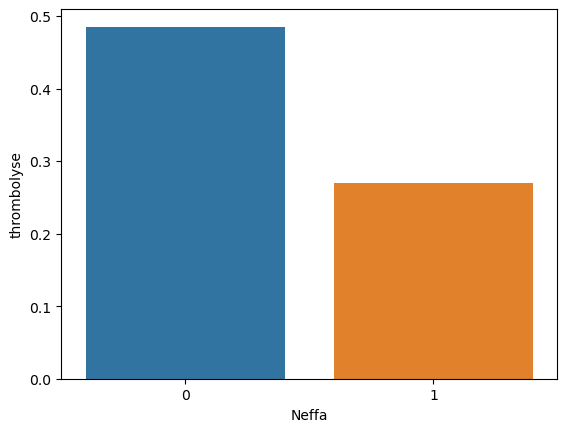

****************************************
sedentarité :
[0 1]


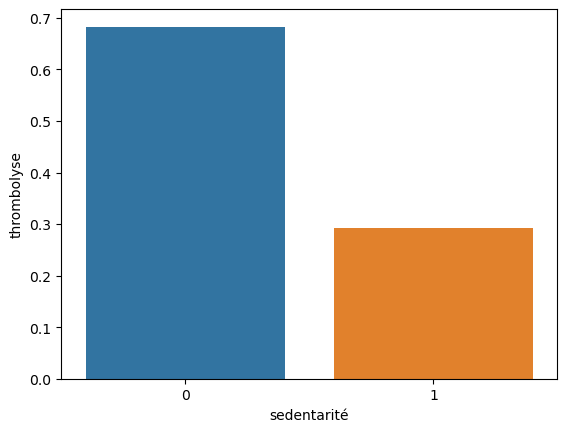

****************************************
HTA :
[0 1]


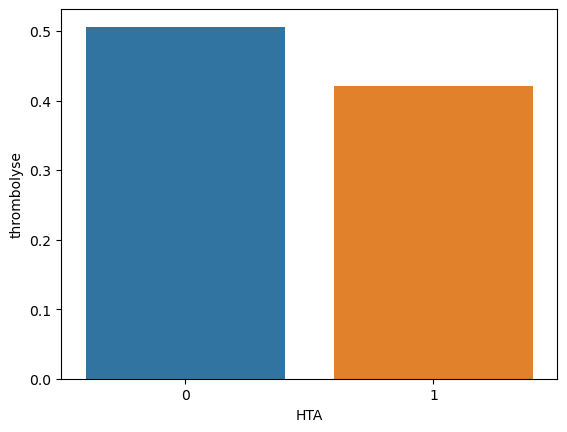

****************************************
Diabète :
[0 1]


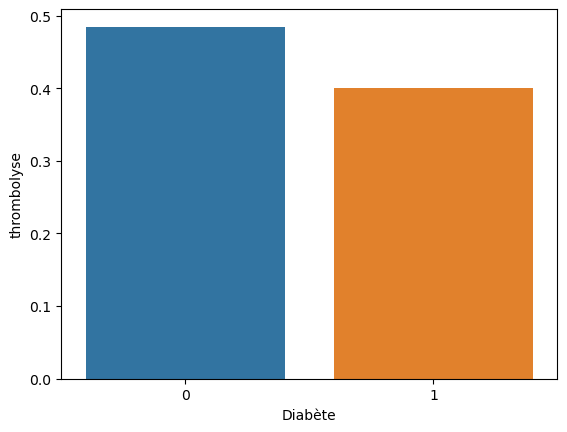

****************************************
Dyslipidémie :
[1 0]


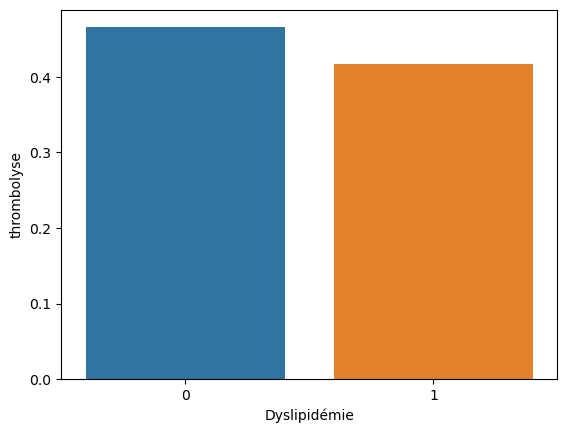

****************************************
ACFA :
[0 1]


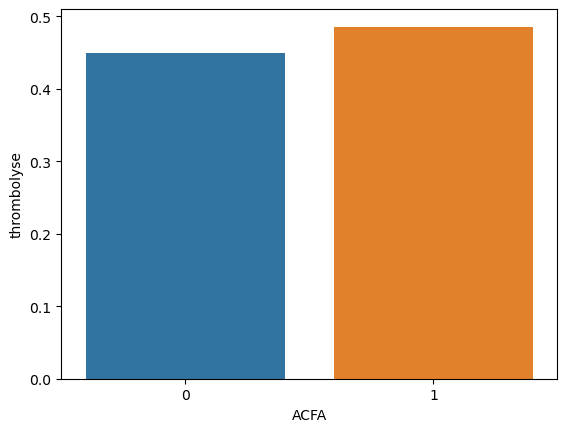

****************************************
insuffisancecoronaire :
[0 1]


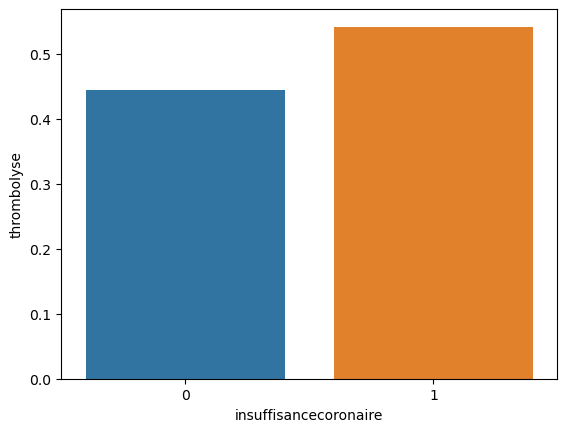

****************************************
valvulopathie :
[0 1]


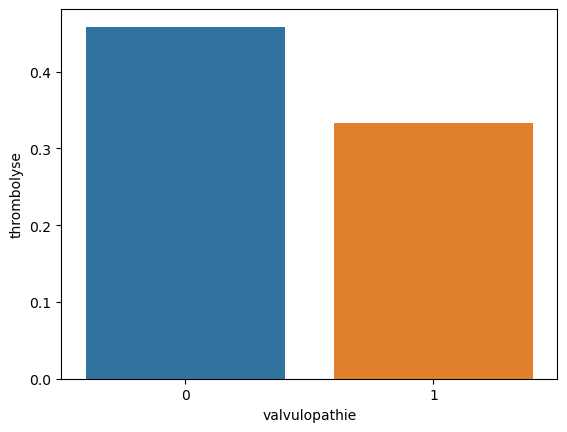

****************************************
AVC :
[0 1]


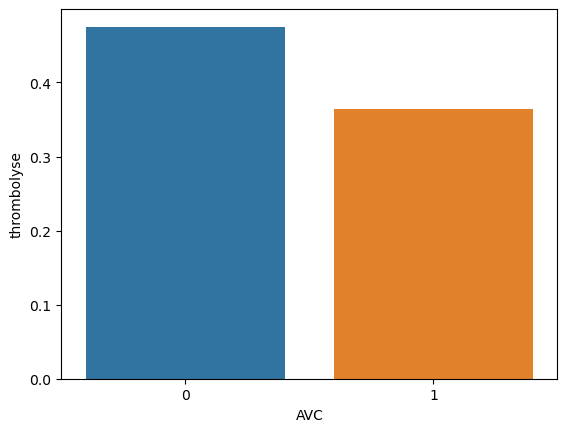

****************************************
AIT :
[0 1]


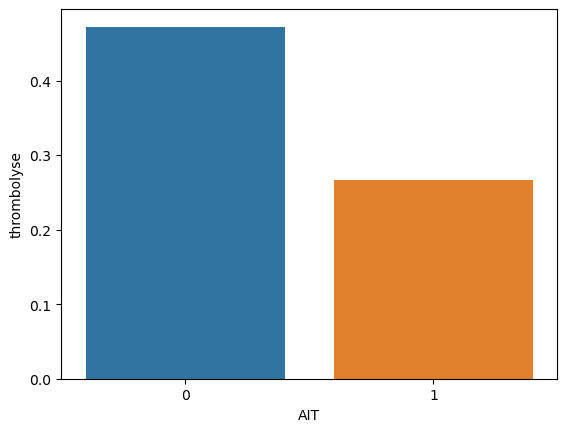

****************************************
AOMI :
[0 1]


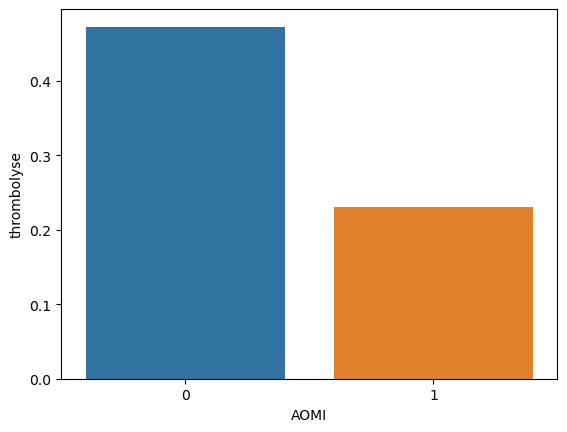

****************************************
démence :
[0 1]


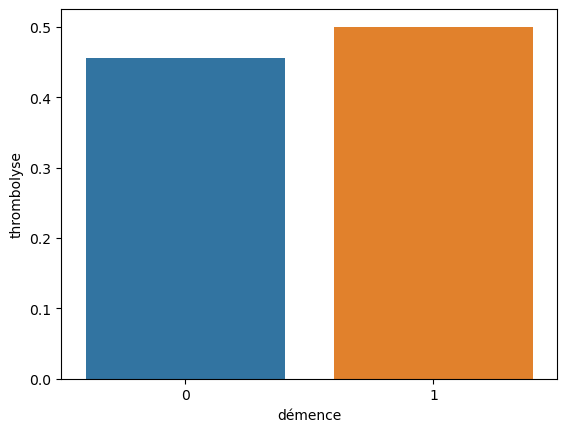

****************************************
scoredeglasgow :
[15 10 14  8 13 11  6  7  5]


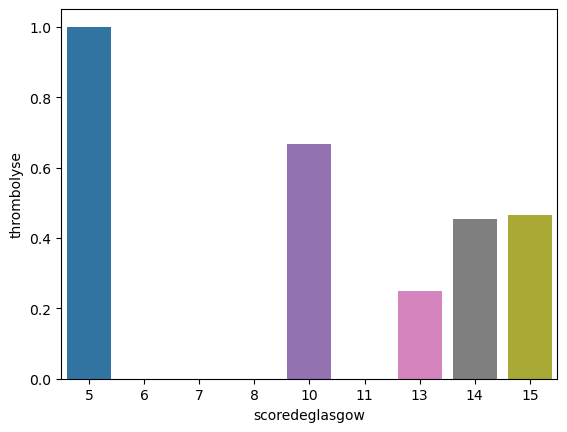

****************************************
tdmnormale :
[0 1]


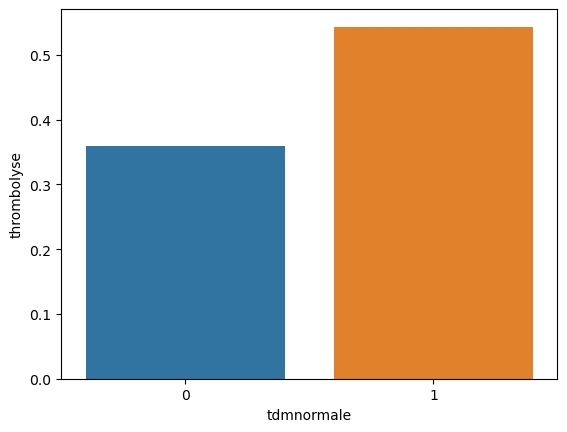

****************************************
signesprécocestdm :
[1 0]


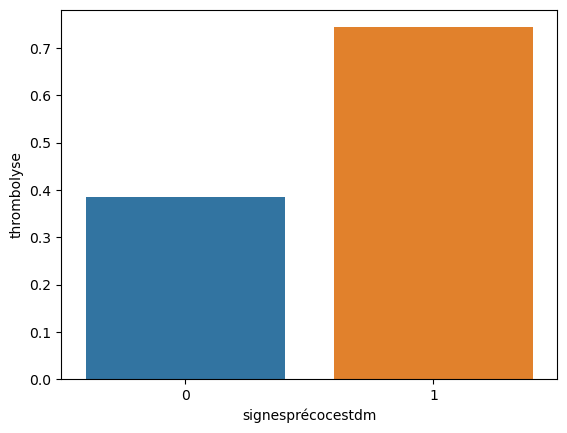

****************************************
hypodensité franche :
[0 1]


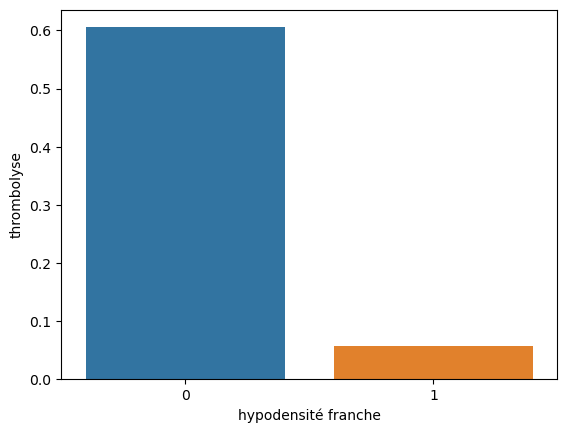

****************************************
TDMcàH24 :
[1 0]


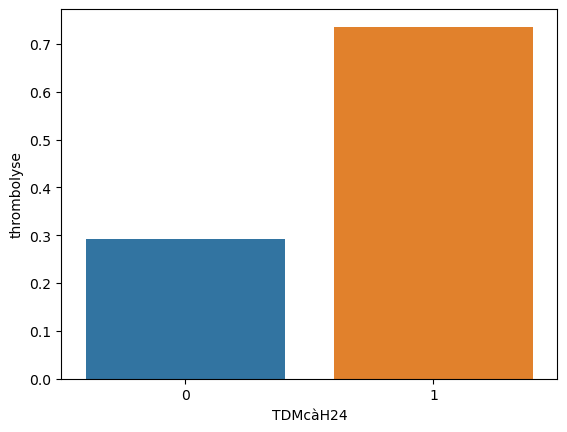

****************************************
sylviensuperf :
[0 1]


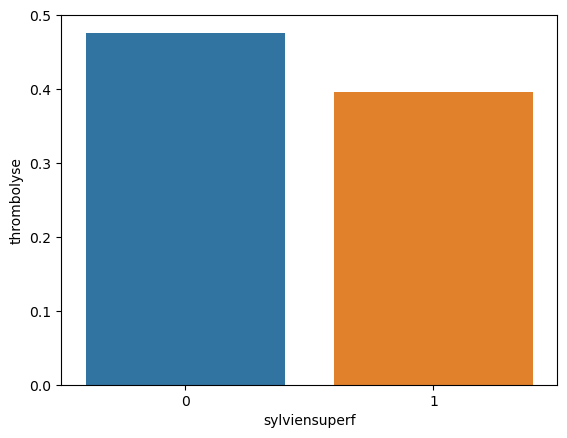

****************************************
sylvientotal :
[1 0]


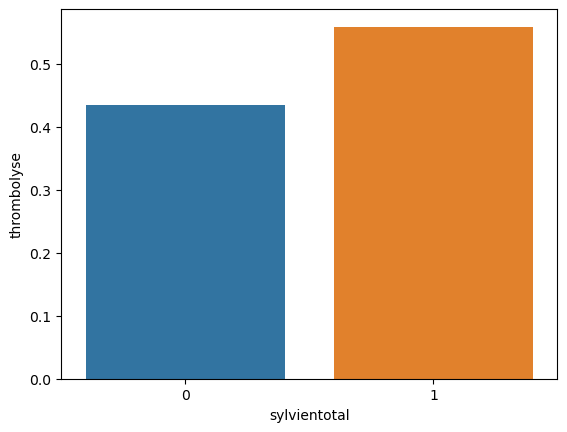

****************************************
sylvienprof :
[0 1]


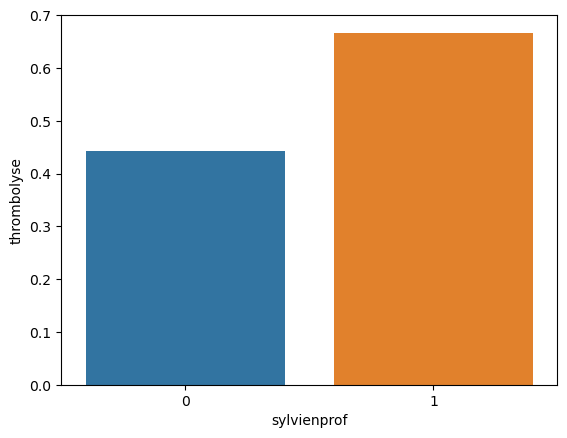

****************************************
cérébraleant :
[0 1]


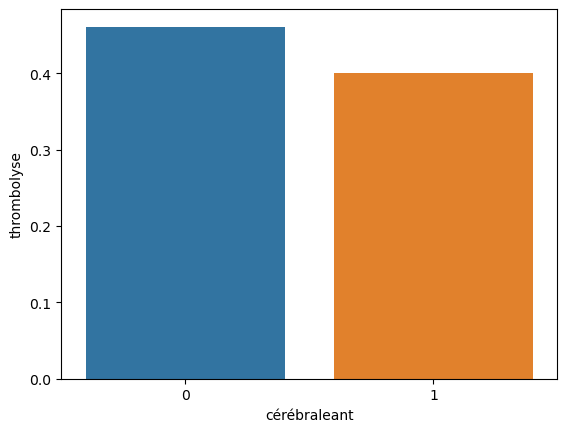

****************************************
cérebralpost :
[0 1]


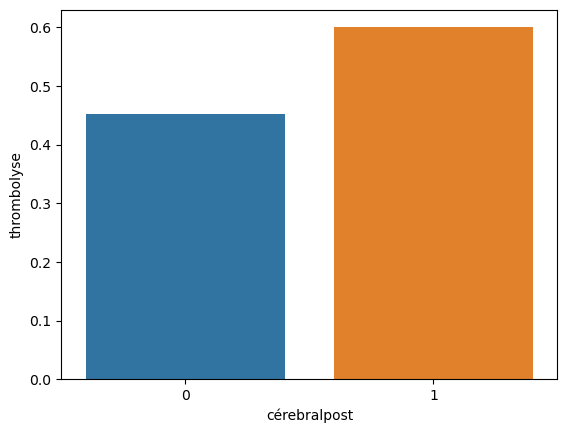

****************************************
jonctionnelant :
[0 1]


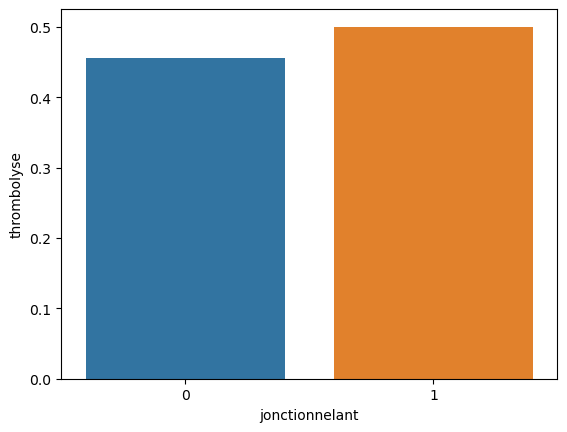

****************************************
tronccérebral :
[0 1]


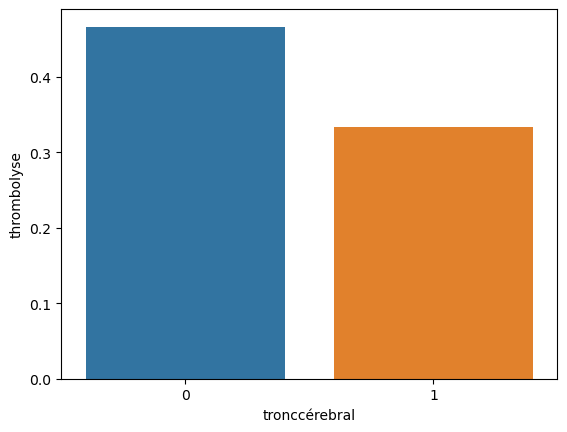

****************************************
cervelet :
[0 1]


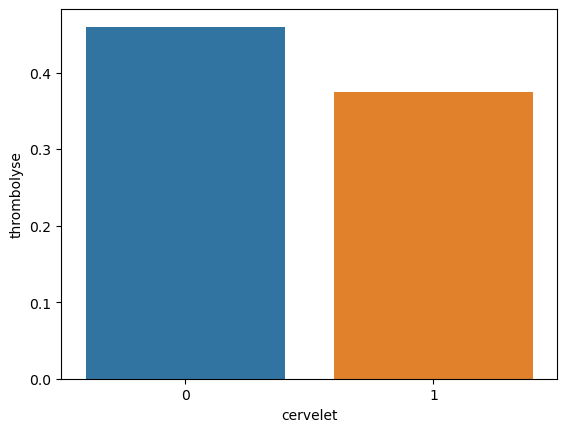

****************************************
lacunes :
[0 1]


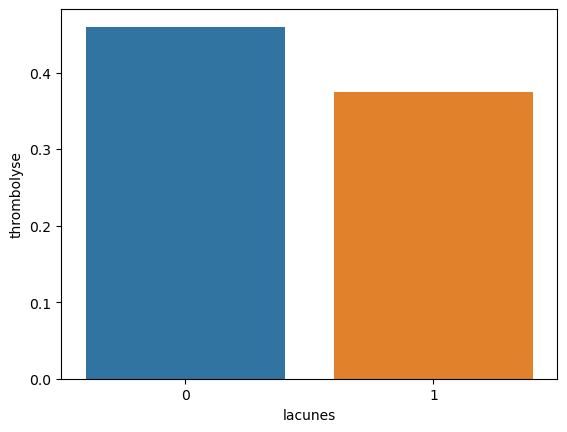

****************************************
CE :
[0 1]


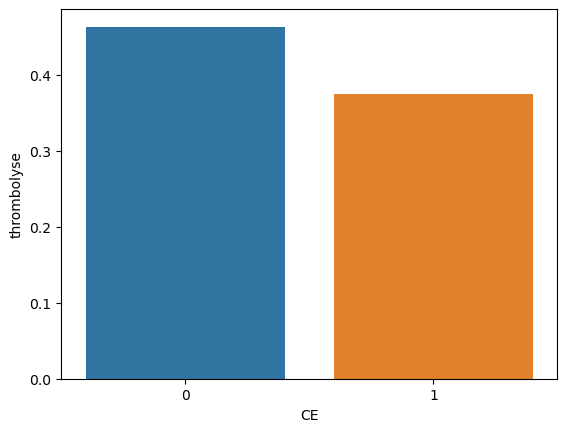

****************************************
oedeme :
[1 0]


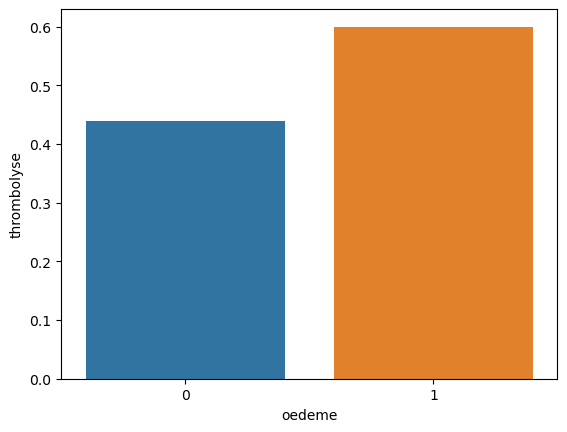

****************************************
effetdemasse :
[1 0]


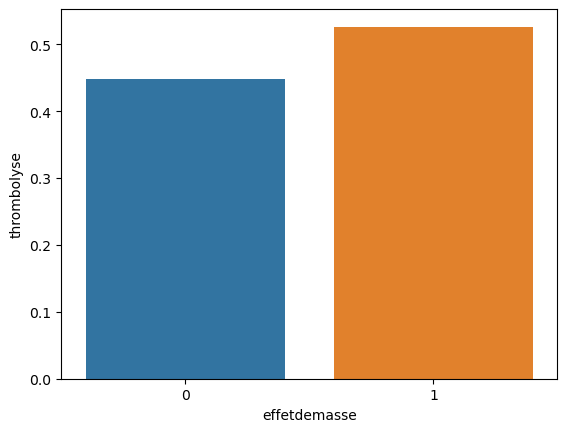

****************************************
engagement :
[0 1]


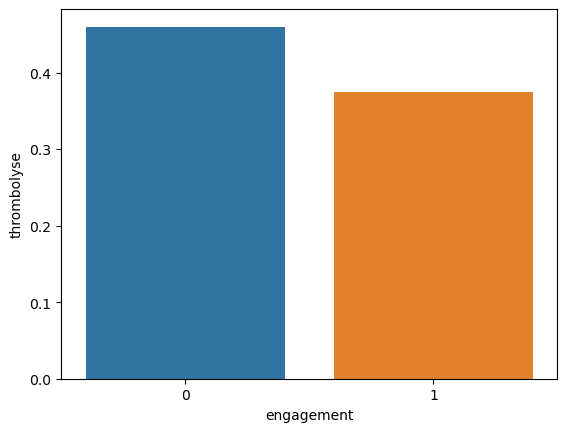

****************************************
transformation_hémorragique :
[1 0]


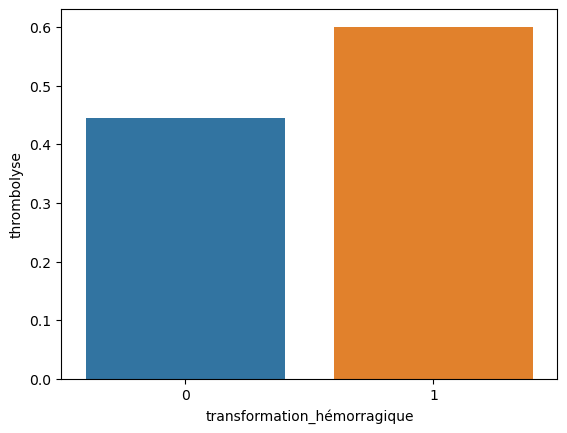

****************************************
infectionurinaire :
[0 1]


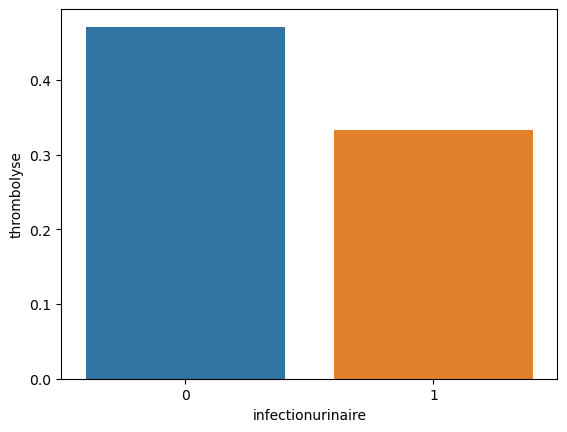

****************************************
infectionpulmonaire :
[0 1]


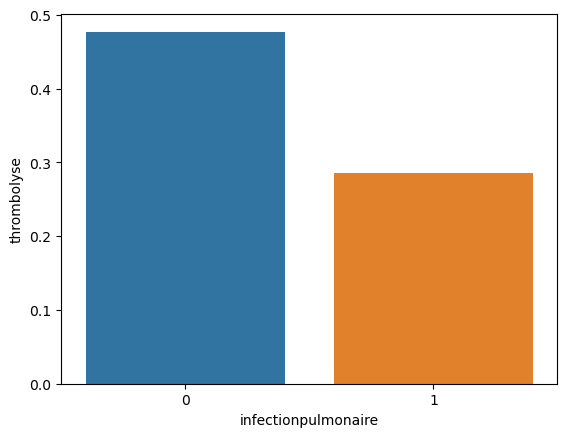

****************************************
décompensationdediabète :
[0 1]


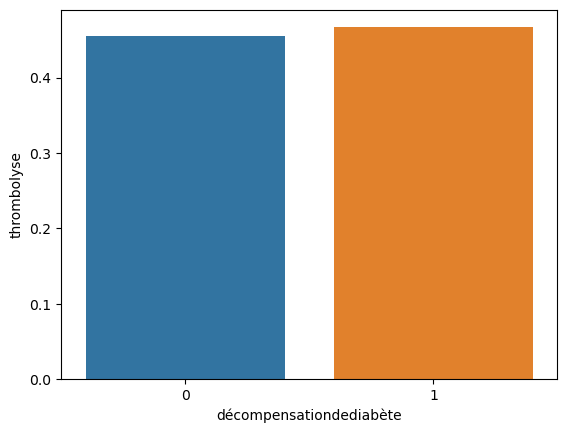

****************************************
hypernatrémie :
[0 1]


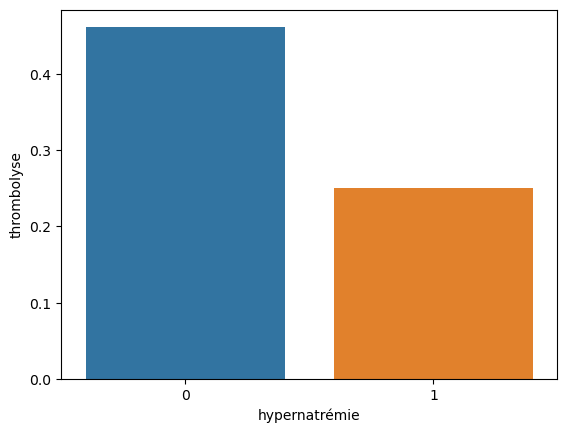

****************************************
tbhémostase :
[0 1]


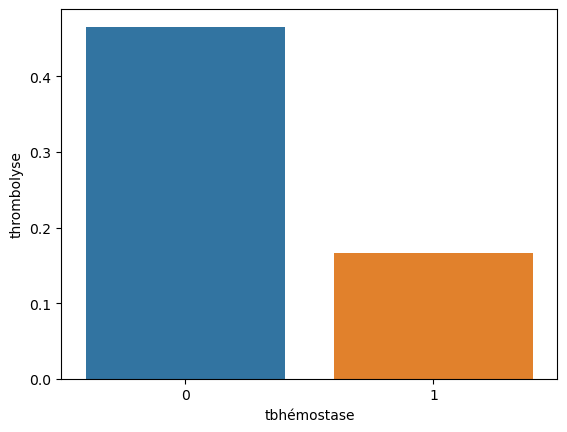

****************************************
escarre :
[0 1]


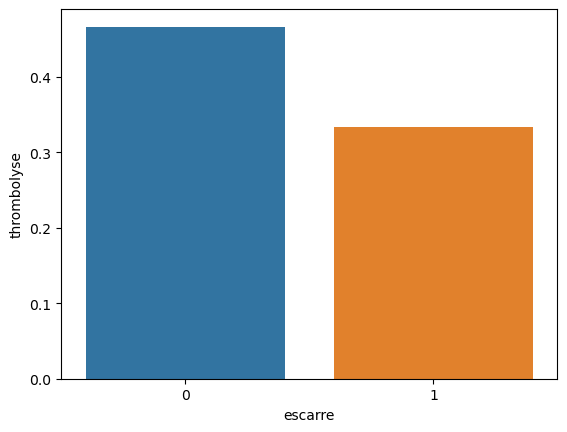

****************************************
phlébite :
[0 1]


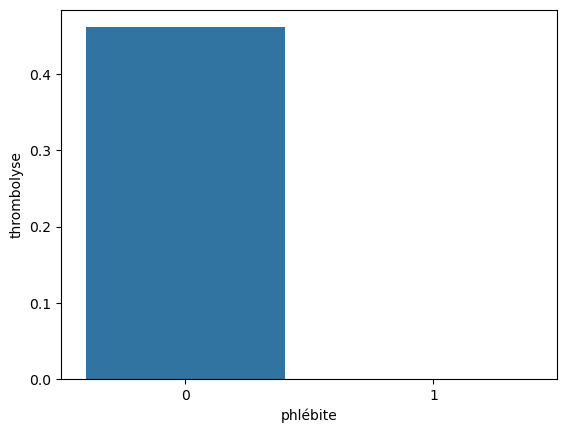

****************************************
EP :
[0 1]


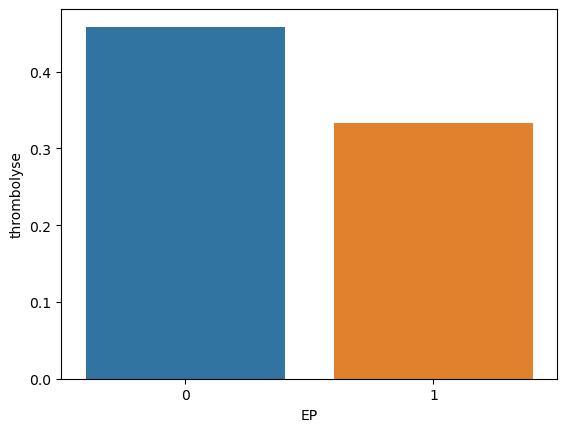

****************************************
Mortalité :
[0 1]


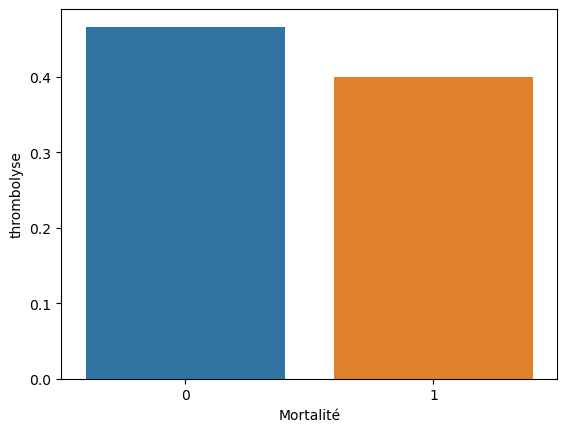

****************************************
mannitol :
[1 0]


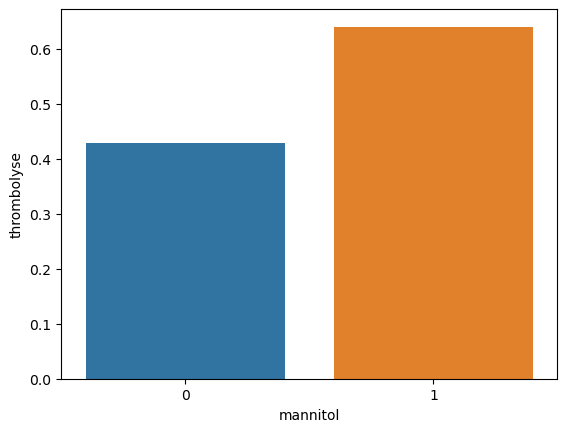

****************************************
RANKINmodifiéà3mois :
[5 3 1 2 6 4 0]


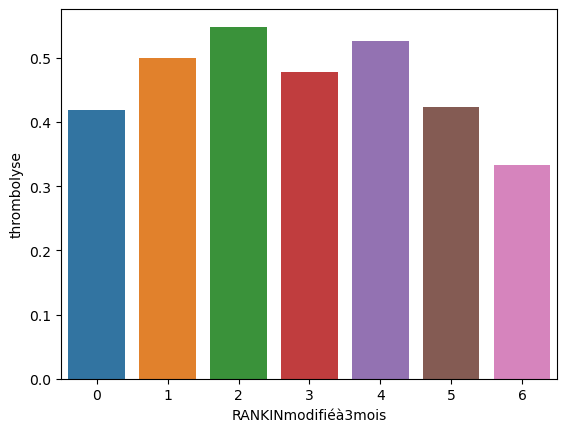

****************************************
thrombolyse :
[1 0]


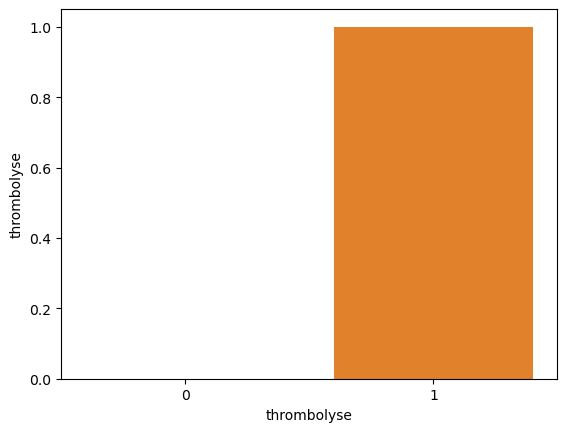

****************************************


In [16]:
for col in catCol:
    print(col+" :")
    print(dfTh_finale[col].unique())
    sns.barplot(data=dfTh_finale.groupby(col).mean().sort_values("thrombolyse").reset_index(),x=col,y="thrombolyse")
    plt.show()
    print("*"*40)

In [17]:
dfi=[dfTh_finale[dfTh_finale["thrombolyse"]==0],dfTh_finale[dfTh_finale["thrombolyse"]==1]]

<Figure size 640x480 with 0 Axes>

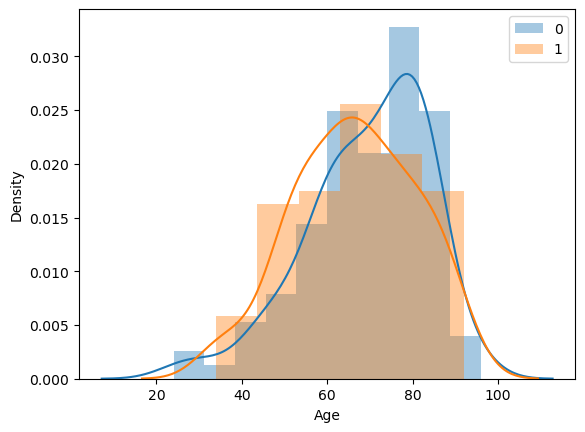

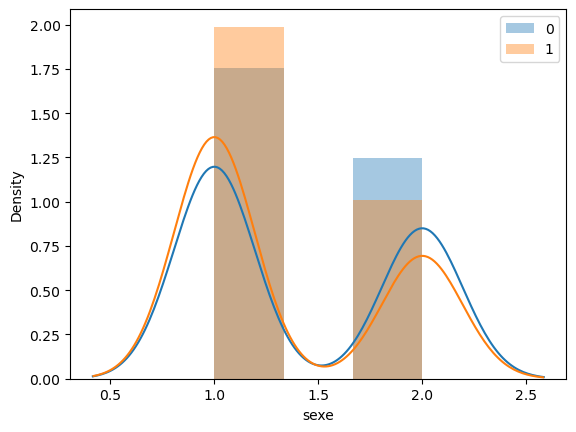

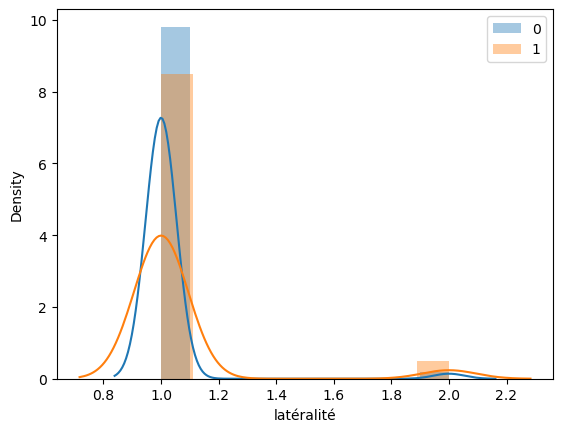

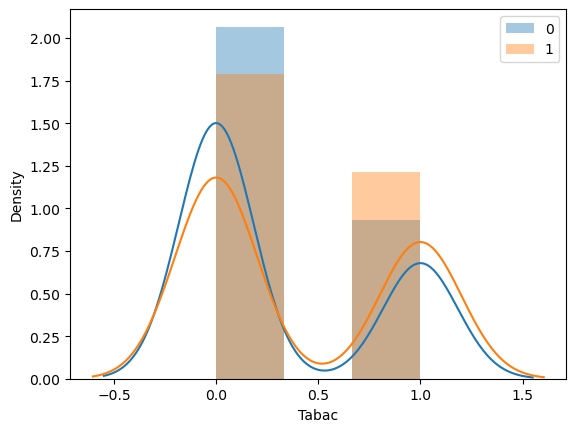

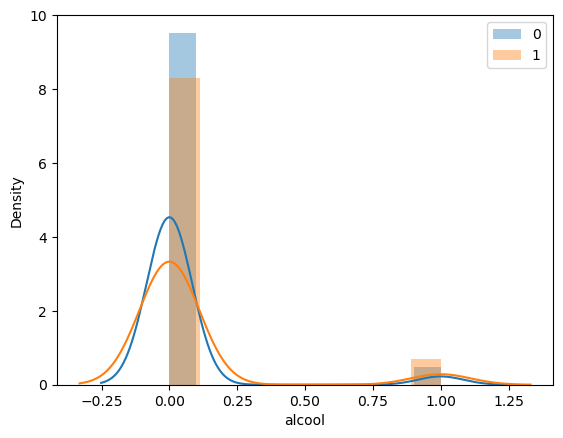

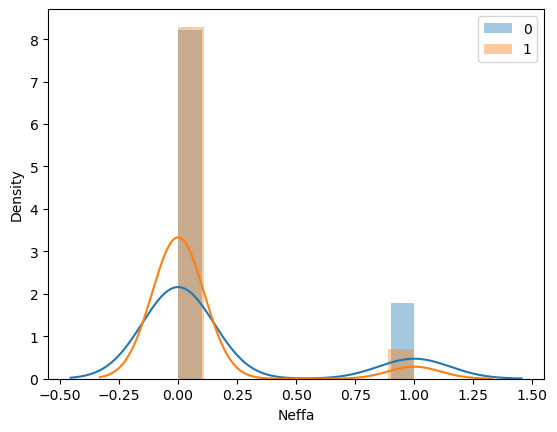

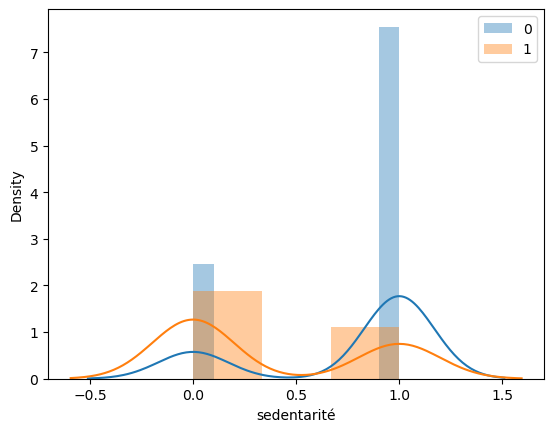

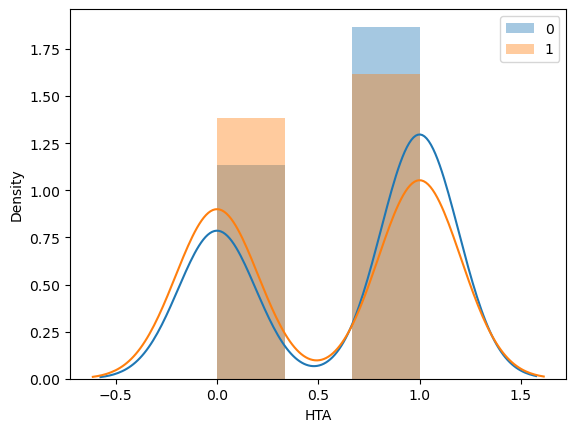

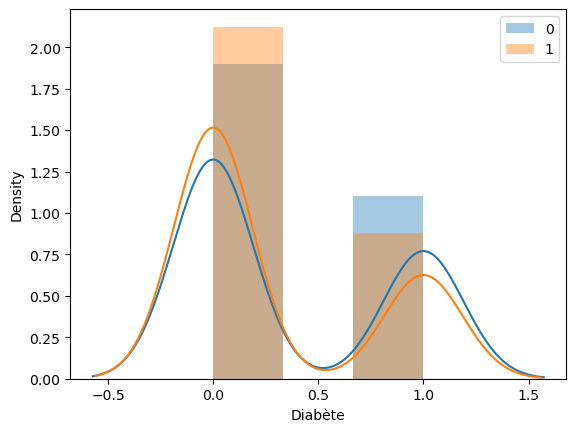

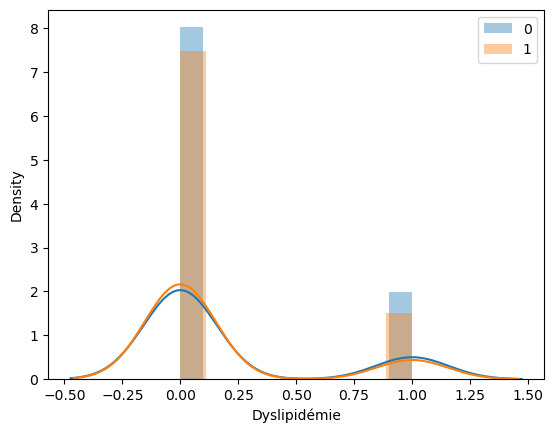

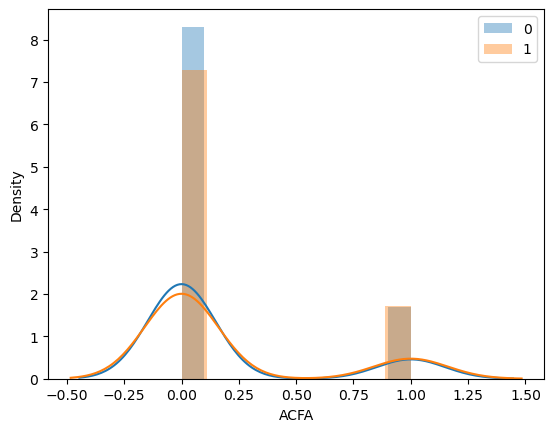

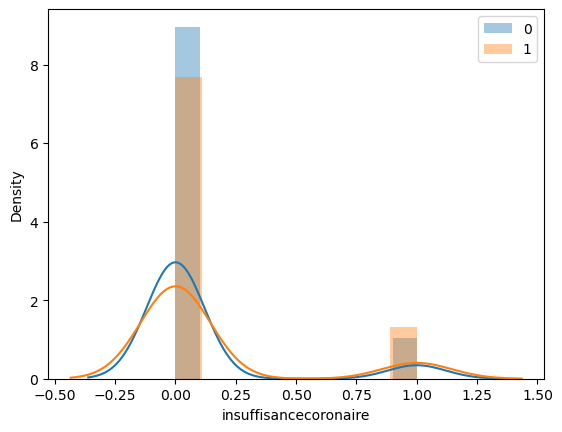

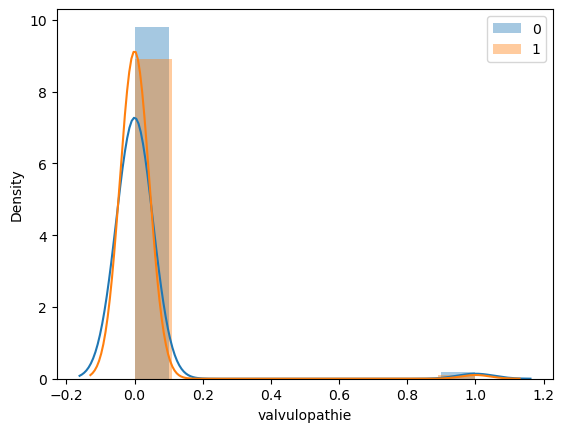

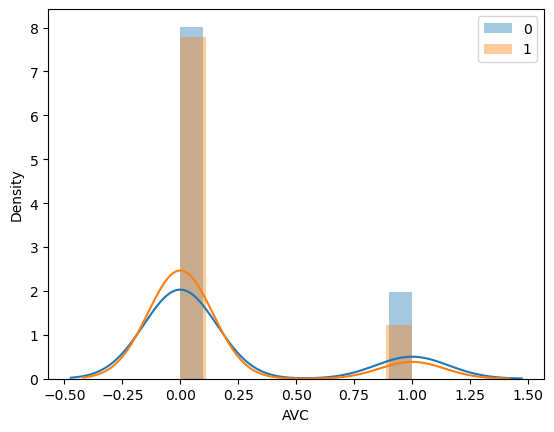

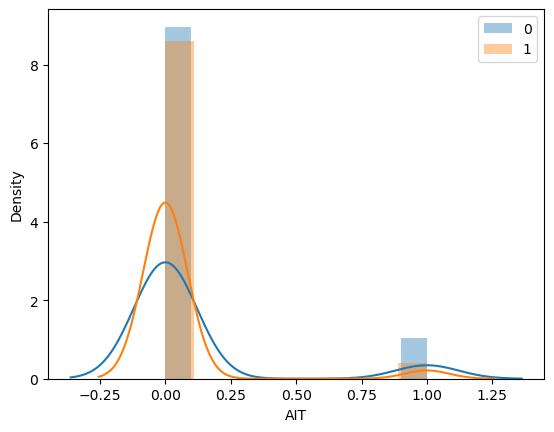

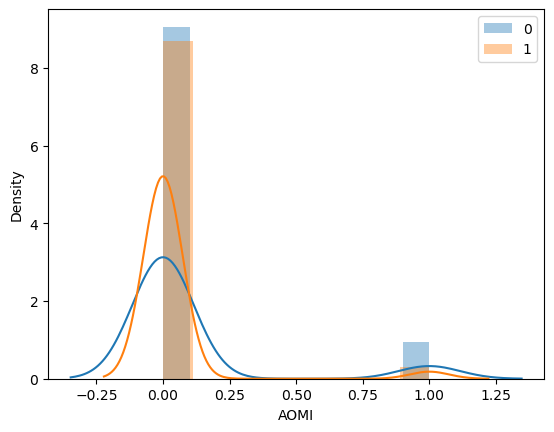

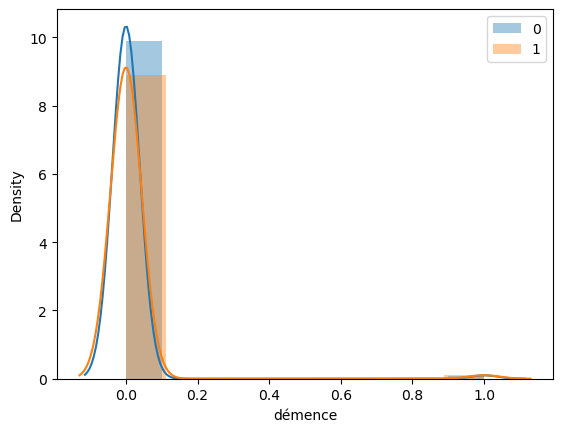

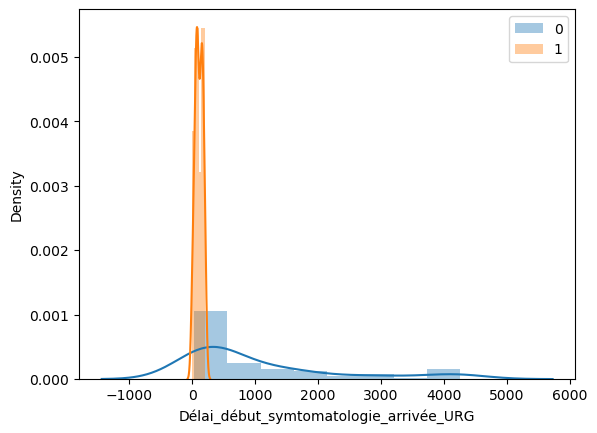

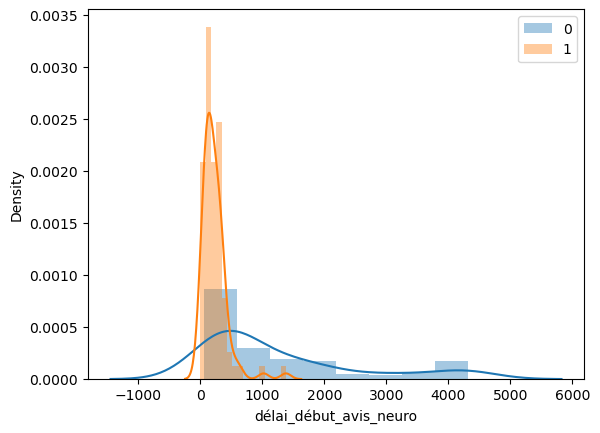

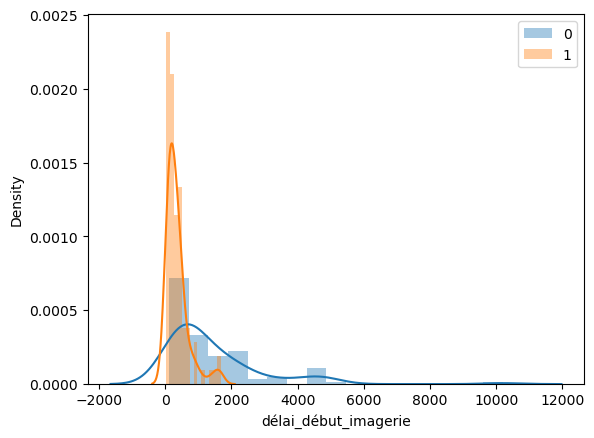

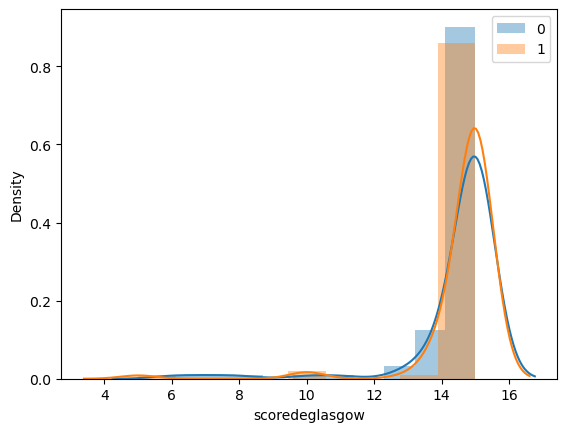

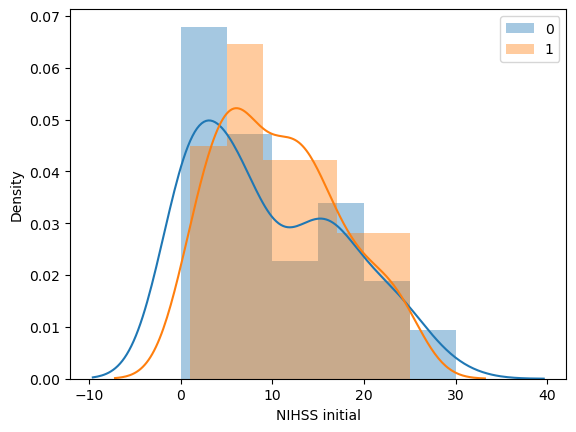

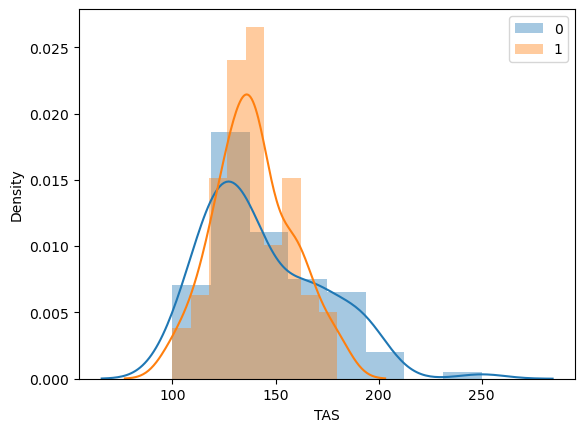

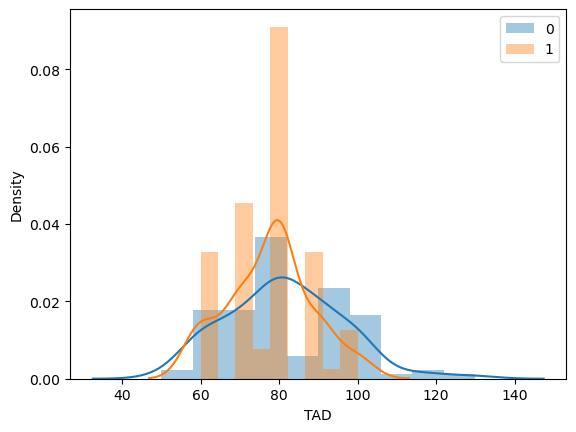

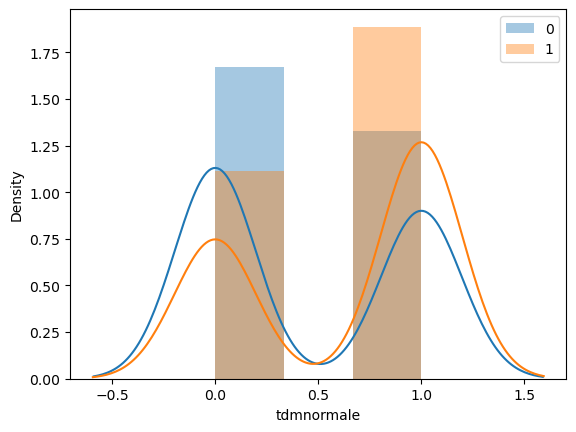

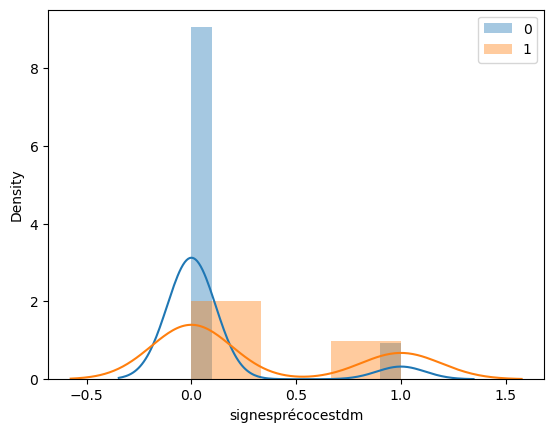

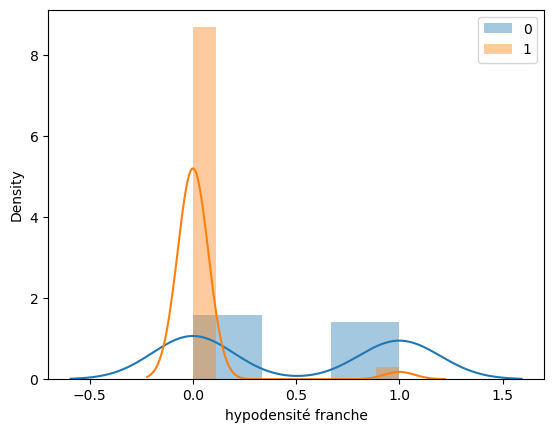

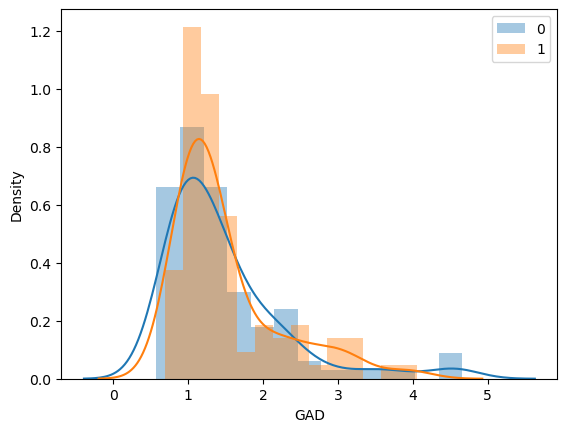

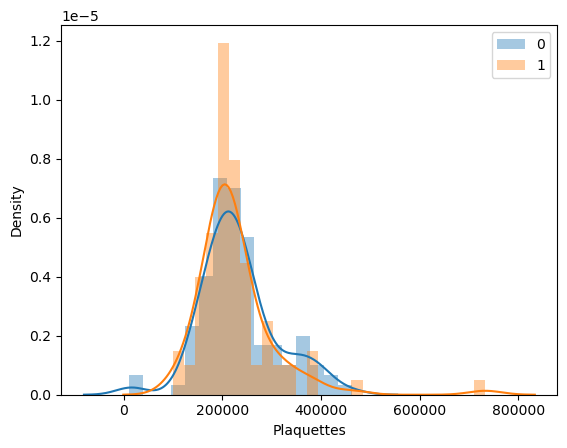

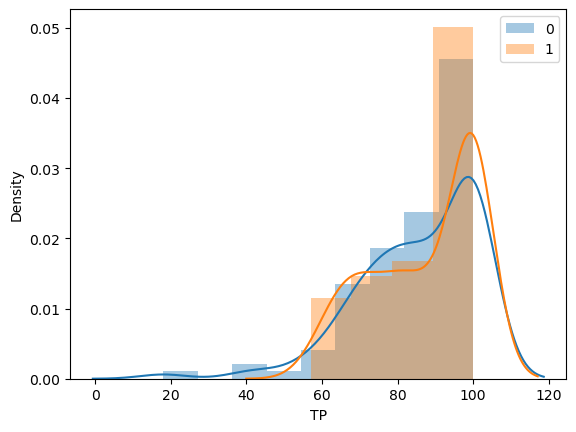

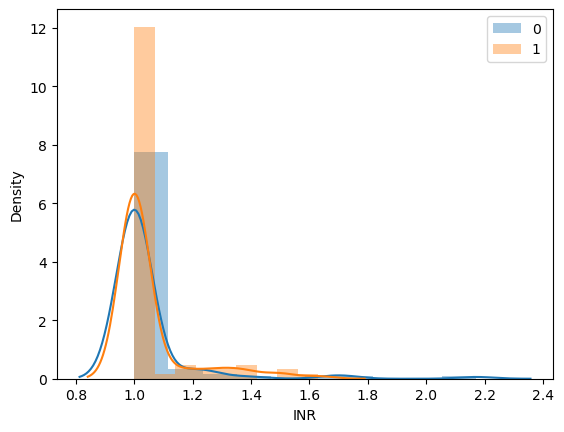

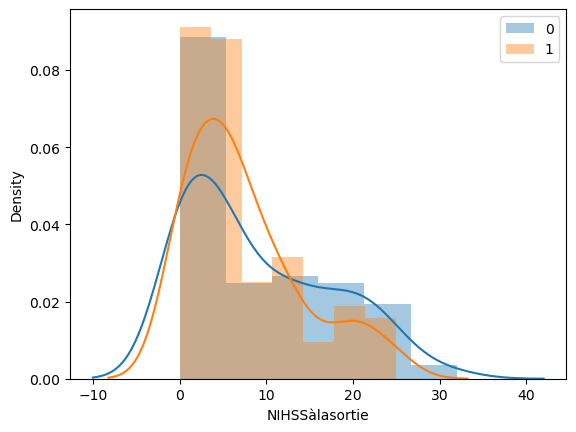

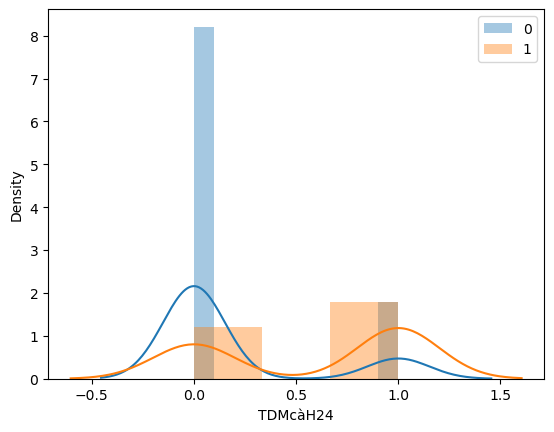

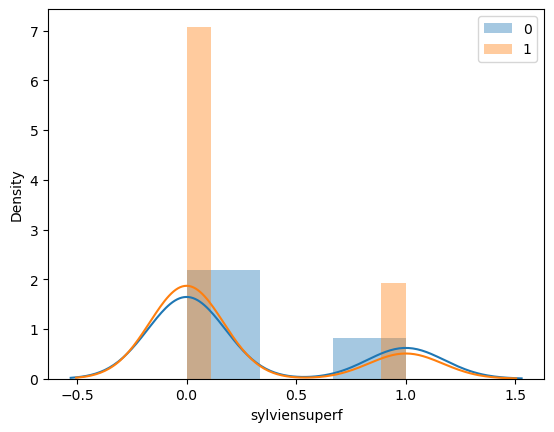

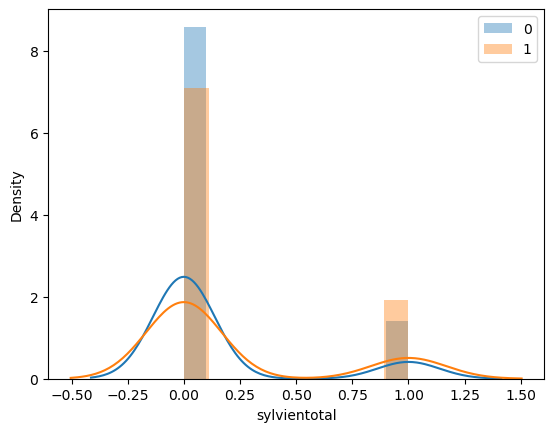

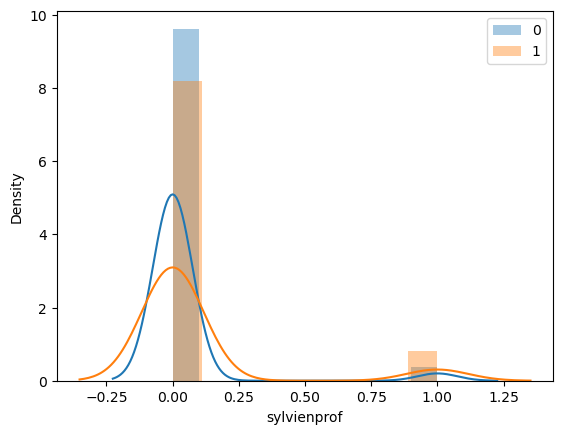

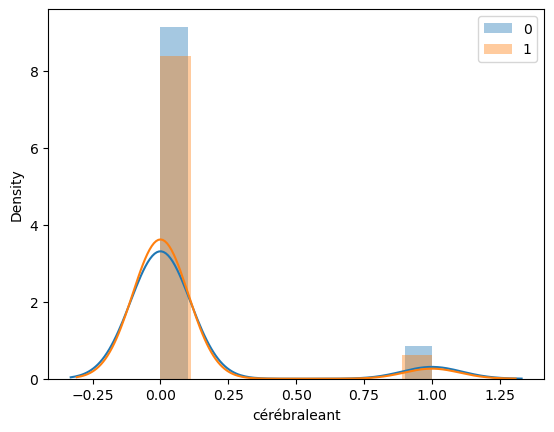

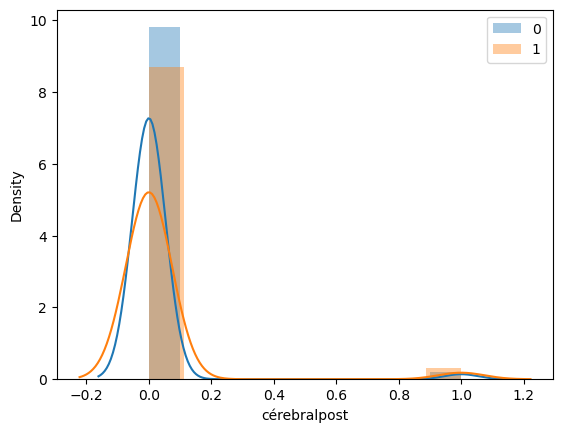

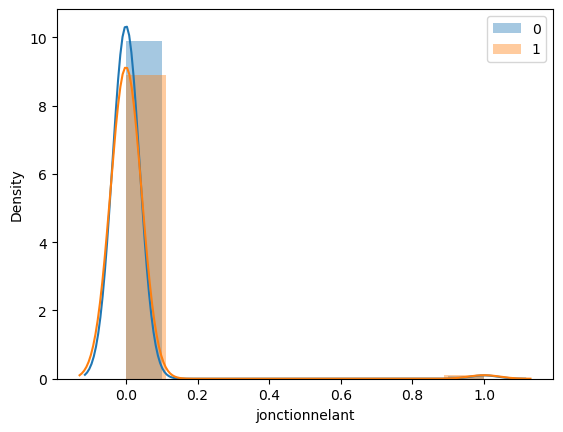

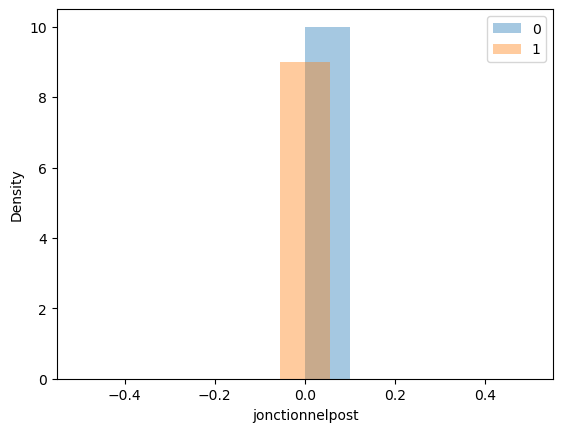

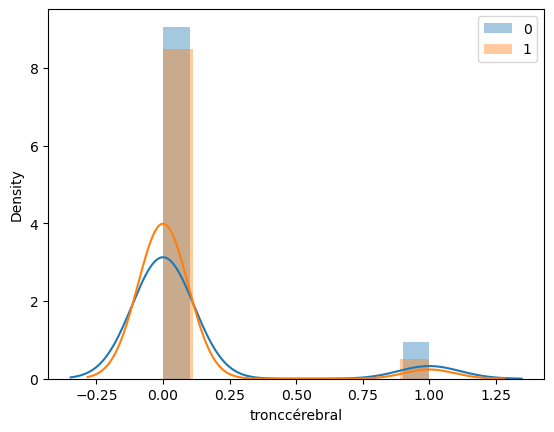

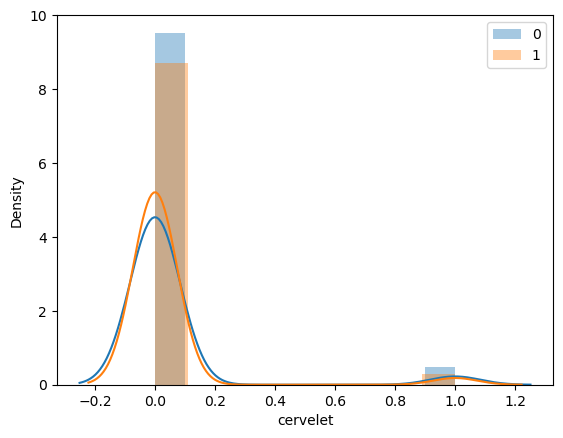

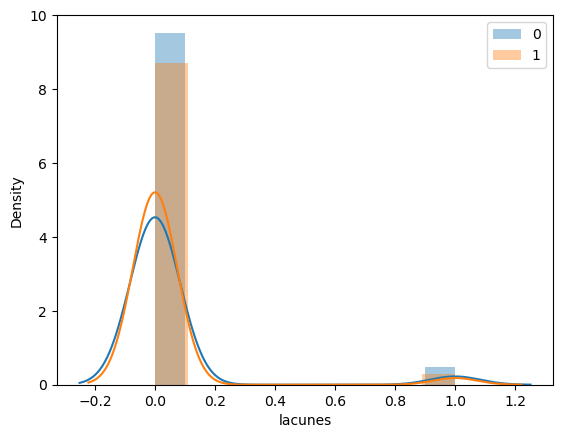

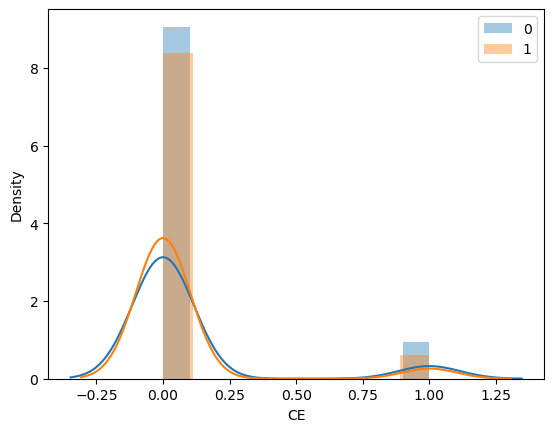

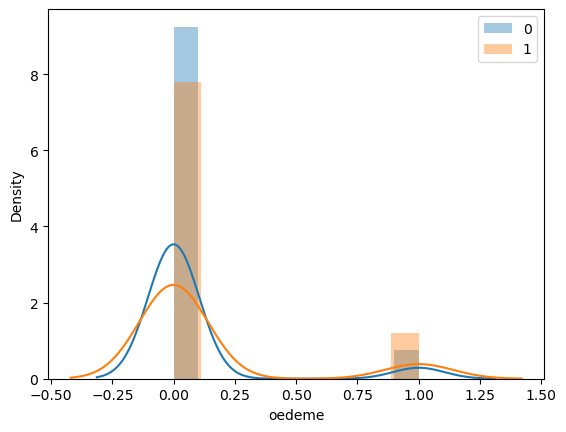

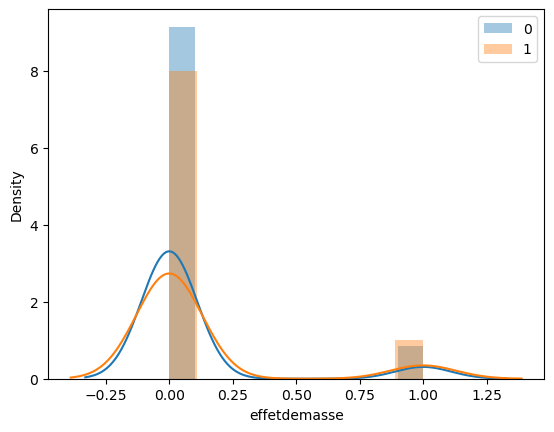

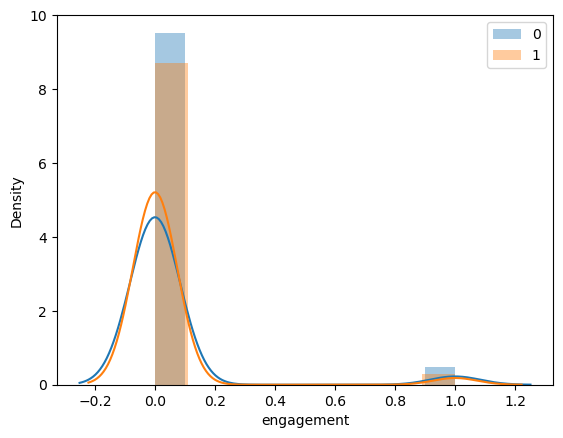

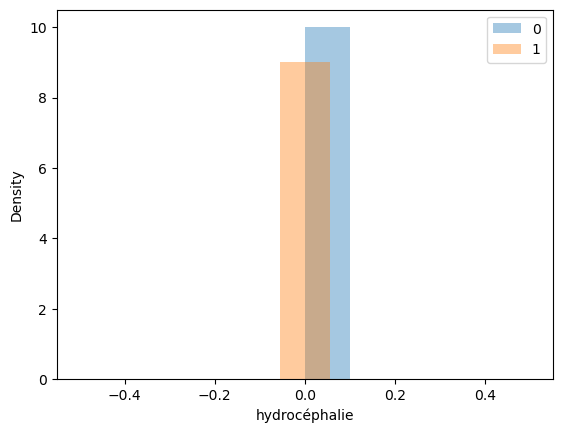

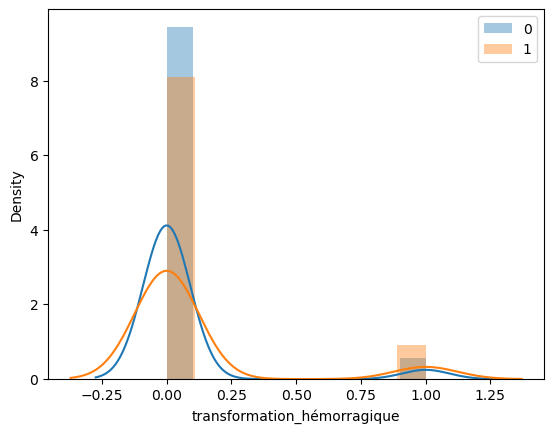

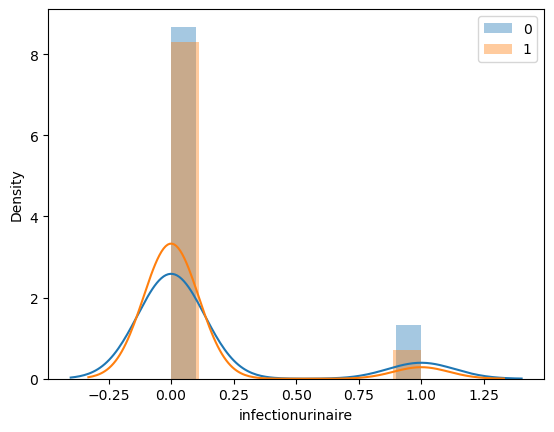

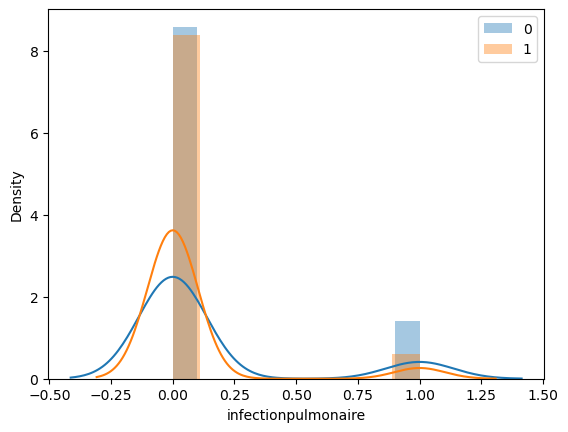

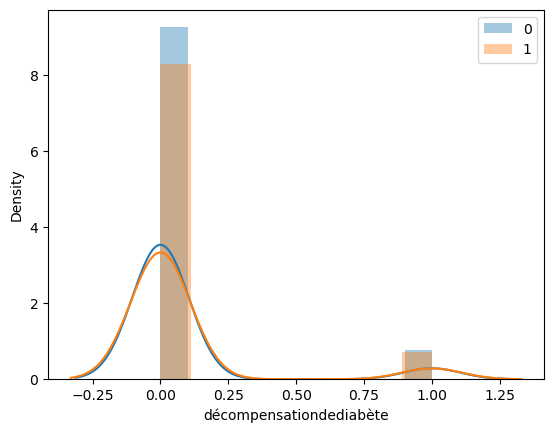

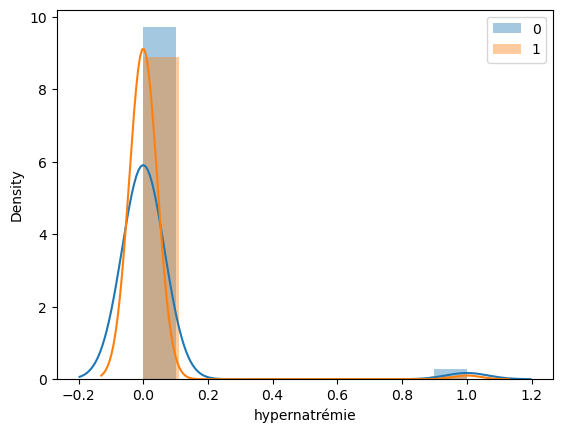

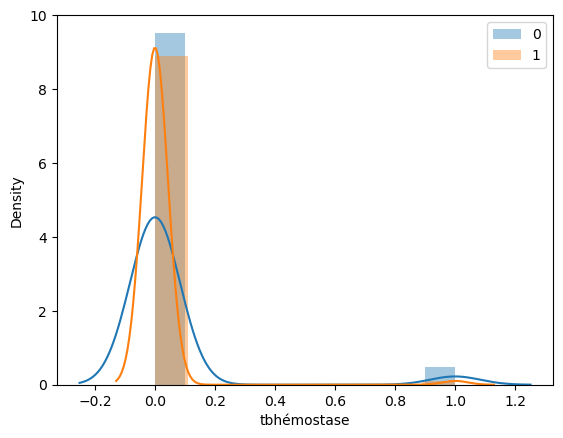

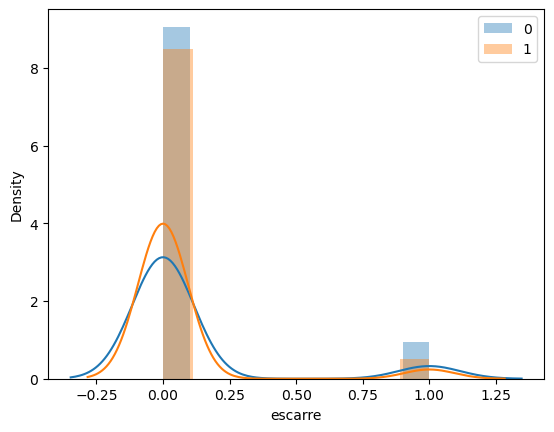

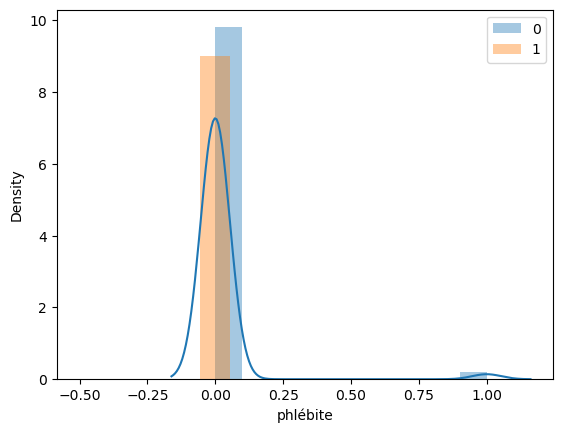

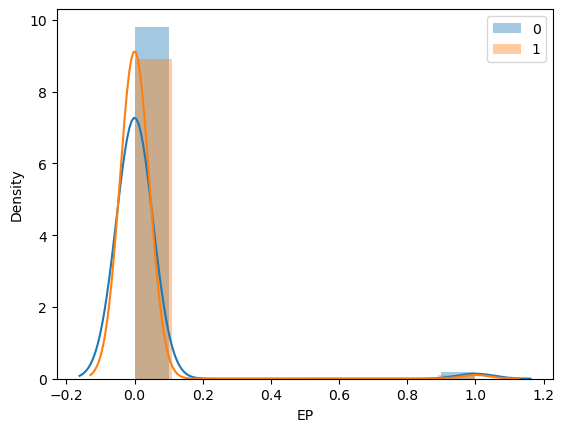

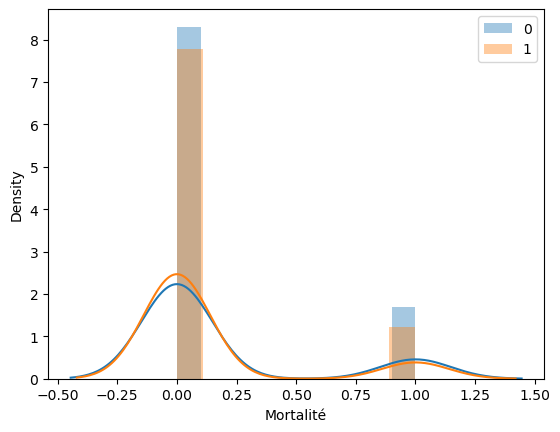

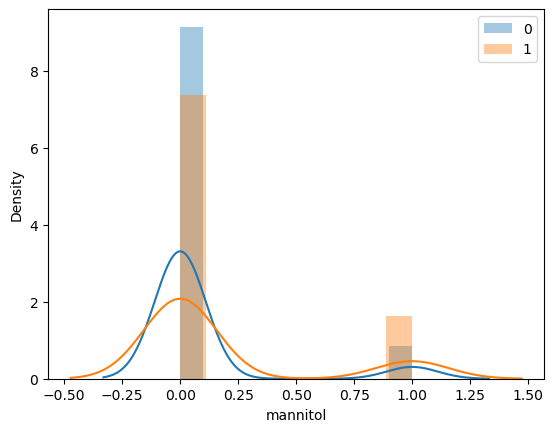

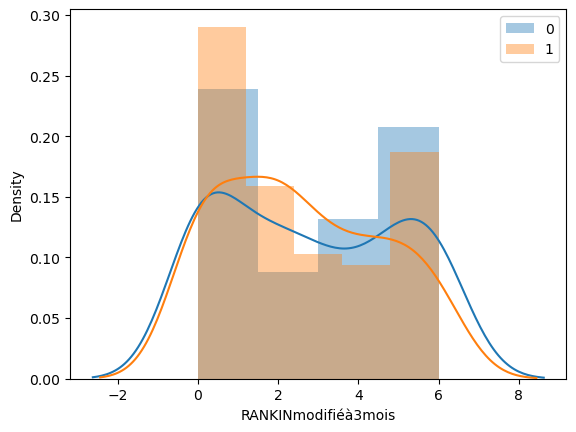

In [18]:
for col in dfTh_finale.columns[:-1]:
    plt.figure()
    if col == "ndossier":
        continue 
    for coltype in dfi:
        sns.distplot(coltype[col],label=coltype["thrombolyse"].iloc[0])
    plt.legend()

##### Y'a des variables beaucoup plus pertinentes que d'autres

# Les tests statistiques :

##### ANOVA

In [19]:
from scipy.stats import f_oneway

In [20]:
dfiNum=[dfTh_finale[dfTh_finale["thrombolyse"]==0][numCol],dfTh_finale[dfTh_finale["thrombolyse"]==1][numCol]]

In [21]:
def ANOVA_test(col):
    stat, p = f_oneway(dfiNum[0][col], dfiNum[1][col])
    return p

In [22]:
for col in dfTh_finale[numCol].iloc[:,:-1]:
    print(f'{col :-<50} {ANOVA_test(col)}')

Age----------------------------------------------- 0.12636131029718
Délai_début_symtomatologie_arrivée_URG------------ 1.7338914765550237e-11
délai_début_avis_neuro---------------------------- 1.3116074027369064e-12
délai_début_imagerie------------------------------ 5.551628104653998e-10
NIHSS initial------------------------------------- 0.2494164226624296
TAS----------------------------------------------- 0.18526475007918883
TAD----------------------------------------------- 0.04662918920204772
Plaquettes---------------------------------------- 0.5536254138563221
TP------------------------------------------------ 0.4300903956334865
NIHSSàlasortie------------------------------------ 0.14911313996407133
GAD----------------------------------------------- 0.7871913483357169


##### Chi-2

In [23]:
from scipy.stats import chi2_contingency

In [24]:
for col in dfTh_finale[catCol].iloc[:,:-1]:
    X = col
    Y = "thrombolyse"
    cont = dfTh_finale[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
    st_chi2, st_p, st_dof, st_exp = chi2_contingency(cont)
    print(f'{col :-<50} {st_p}')

sexe---------------------------------------------- 0.3319908356203348
latéralité---------------------------------------- 0.31315508873617715
Tabac--------------------------------------------- 0.22820170887611219
alcool-------------------------------------------- 0.5404960993785015
Neffa--------------------------------------------- 0.06477358571968606
sedentarité--------------------------------------- 1.40909304017709e-07
HTA----------------------------------------------- 0.30296418742010855
Diabète------------------------------------------- 0.3341545346746379
Dyslipidémie-------------------------------------- 0.7301677640863158
ACFA---------------------------------------------- 0.843886808849063
insuffisancecoronaire----------------------------- 0.4986389988735511
valvulopathie------------------------------------- 1.0
AVC----------------------------------------------- 0.32601196003852334
AIT----------------------------------------------- 0.20557061012895064
AOMI------------------------

### On peut facilement dégager les variables les plus pertinentes par ces deux tests au niveau dépendance entre chaque variable et la variable thrombolyse
### Mais on va essayer avec plus de méthodes

# modélisation

In [25]:
y=dfTh_finale["thrombolyse"]
X=dfTh_finale.drop(["thrombolyse","ndossier"],axis=1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
KNN=KNeighborsClassifier()
SVM=SVC()
LG=LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
GB=GradientBoostingClassifier()
XGB=XGBClassifier()

In [29]:
models={"SVM":SVM,
       "KNN":KNN,
       "LogisticRegression":LG,
       "DT":DT,
       "RF":RF,
       "GB":GB,
       "XGB":XGB}

In [30]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("Le score du modéle sur les données d'entrainement {}".format(model.score(X_train,y_train)))
    print("Le score du modéle sur les données de test {}".format(model.score(X_test,y_test)))

In [31]:
for name, model in models.items():
    print(name)
    evaluation(model)

SVM
[[19  0]
 [20  0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        19
           1       0.00      0.00      0.00        20

    accuracy                           0.49        39
   macro avg       0.24      0.50      0.33        39
weighted avg       0.24      0.49      0.32        39

Le score du modéle sur les données d'entrainement 0.5641025641025641
Le score du modéle sur les données de test 0.48717948717948717
KNN
[[16  3]
 [11  9]]
              precision    recall  f1-score   support

           0       0.59      0.84      0.70        19
           1       0.75      0.45      0.56        20

    accuracy                           0.64        39
   macro avg       0.67      0.65      0.63        39
weighted avg       0.67      0.64      0.63        39

Le score du modéle sur les données d'entrainement 0.7435897435897436
Le score du modéle sur les données de test 0.6410256410256411
LogisticRegression
[[19  0]
 [ 6 14]]

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
def evaluationKF(model):
    Lscore=cross_val_score(model,X,y,cv=5)
    print("Score {}".format(Lscore))
    print("mean {} ".format(Lscore.mean()))

In [34]:
for name, model in models.items():
    print(name)
    evaluationKF(model)

SVM
Score [0.53846154 0.53846154 0.53846154 0.53846154 0.56410256]
mean 0.5435897435897437 
KNN
Score [0.61538462 0.69230769 0.64102564 0.56410256 0.56410256]
mean 0.6153846153846153 
LogisticRegression
Score [0.84615385 0.8974359  0.82051282 0.64102564 0.74358974]
mean 0.7897435897435897 
DT
Score [0.97435897 0.97435897 0.97435897 1.         1.        ]
mean 0.9846153846153847 
RF
Score [0.94871795 0.94871795 0.92307692 0.87179487 0.87179487]
mean 0.9128205128205128 
GB
Score [0.97435897 0.97435897 0.97435897 1.         1.        ]
mean 0.9846153846153847 
XGB
Score [0.92307692 0.97435897 0.94871795 0.8974359  0.94871795]
mean 0.9384615384615383 


#### C'est comme prévu, les méthodes ensemblistes donnent les meilleurs prédiction, on va choisir l'un d'eux pour prendre encore une idée sur la pertinence des variables

In [35]:
from sklearn.feature_selection import SelectFromModel

In [36]:
selector=SelectFromModel(DecisionTreeClassifier())

In [37]:
selector.fit(X,y)

SelectFromModel(estimator=DecisionTreeClassifier())

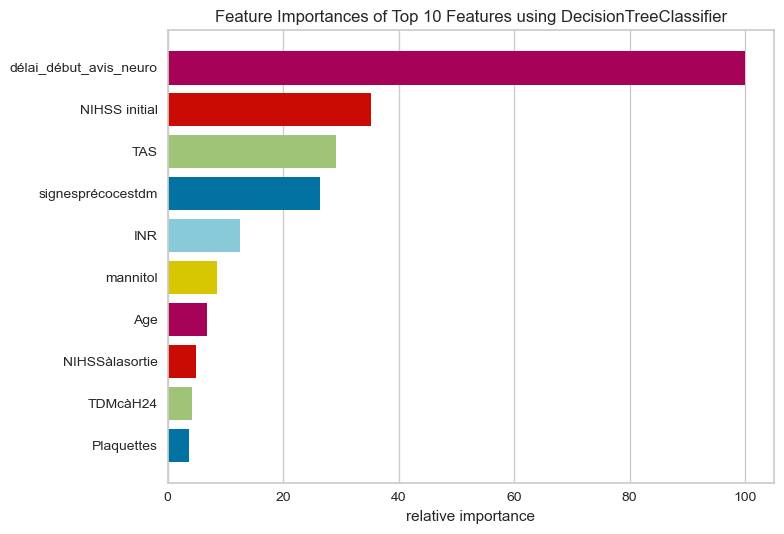

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [38]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(DecisionTreeClassifier(),topn=10)
viz.fit(dfTh_finale.drop(["thrombolyse","ndossier","Délai_début_symtomatologie_arrivée_URG"],axis=1), y)
viz.show()

### Conclusion :
##### On a eu de trés bons résultats de prédiction par les méthodes ensemblistes
##### Pour la recherche des variables les plus pertinentes, on a essayé par 3 méthodes de dégager le maximum d'informations, la visualiste,les tests et par FeatureImportances suite au modélisation
##### Pour la iualisation il suffit de voir la variance pour dégager la pertinence,Pour le tests les p-valeurs sont trés claires par lequels on peut tirer la conclusion et bien sur la FeatureImportances est visualiser par une figure
##### Remarque : Y'a des variables mentionnées dans dfTh_finale et non mentionnées dans dfMo et vice versa, j'ai pensé a une jointure par num de dossier, mais c'est a vous de décider si besoin je m'occuperai de ça bien sur
##### Pour les variables de Délai, il sont corrélées et une seule peut faire l'affaire
##### L'étude de l'autre dataset est disponible dans l'autre fichier ipynb ci -joint
##### Bien a vous!